<a href="https://colab.research.google.com/github/VivekSM1992/BrainMRIGen/blob/main/signal_processing_har.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sensormotion

  Created wheel for sensormotion: filename=sensormotion-1.1.4-py3-none-any.whl size=19672 sha256=c46d3c4ca42380d9dad63ee2b29ca1e577dc89220b4cfdb49214e69e8c96dd74
  Stored in directory: /root/.cache/pip/wheels/75/d2/43/d129af476d6d0717bcdfc3b7d6ff9b15d65cccdfa21518adac
Successfully built sensormotion


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sensormotion as sm
import os
from glob import glob
import math
import random

In [ ]:
# list of address of the folders 
Folders = glob('/content/drive/MyDrive/A_DeviceMotion_data/*_*')
print(Folders)

['/content/drive/MyDrive/A_DeviceMotion_data/ups_12', '/content/drive/MyDrive/A_DeviceMotion_data/std_14', '/content/drive/MyDrive/A_DeviceMotion_data/wlk_15', '/content/drive/MyDrive/A_DeviceMotion_data/sit_13', '/content/drive/MyDrive/A_DeviceMotion_data/wlk_8', '/content/drive/MyDrive/A_DeviceMotion_data/wlk_7', '/content/drive/MyDrive/A_DeviceMotion_data/sit_5', '/content/drive/MyDrive/A_DeviceMotion_data/ups_3', '/content/drive/MyDrive/A_DeviceMotion_data/ups_4', '/content/drive/MyDrive/A_DeviceMotion_data/std_6', '/content/drive/MyDrive/A_DeviceMotion_data/dws_1', '/content/drive/MyDrive/A_DeviceMotion_data/jog_9', '/content/drive/MyDrive/A_DeviceMotion_data/dws_11', '/content/drive/MyDrive/A_DeviceMotion_data/jog_16', '/content/drive/MyDrive/A_DeviceMotion_data/dws_2']


In [ ]:
def process_data(csv_files):
    X_list=[]
    Y_list=[]
    Total_num_windows=0
    daddy_frame = pd.DataFrame()
    array_data=[]
    #print(X_list)
    #
    for csvs in csv_files:
        #create temp dataframe
        temp_df=pd.read_csv(csvs)
        temp_df=temp_df.drop(labels='Unnamed: 0', axis=1)
        #resultant of linear accelration
        temp_df['linear_res']=temp_df['userAcceleration.x'] ** 2+ temp_df['userAcceleration.y'] ** 2+ temp_df['userAcceleration.z'] ** 2
        temp_df['linear_res']=temp_df['linear_res'].apply(np.sqrt)
        # we consider only 4 features
        temp_df_scale=temp_df.loc[:,['rotationRate.x','rotationRate.y','rotationRate.z','linear_res']]

        #find out ground truth and subject!!(there may be better way to do this!!)
        for items in gt_list:
            if (str(csvs).find(items) != -1):
                break
        for subjects in sub_list:
            if (str(csvs).find(subjects) != -1):
                break

        #ground truth to number mapping
        for key, value in gt_list_dict.items():
            if key == items:
                items=value
        #create ground truth and subject column
        temp_df_scale['groundtruth']=items
        temp_df_scale['subjects']=subjects
        
        #convert dataframe into numpy array
        temp_to_array=temp_df_scale.to_numpy()
        array_data.append(temp_to_array)

        daddy_frame=daddy_frame.append(temp_df)
    
    #return array data
    return array_data

In [ ]:
csv_files_train=[]
csv_files_test=[]
test_files_index=[]
all_csv_files_train=[]
all_csv_files_test=[]

#loop through all the folders
for item in Folders:
    #get the list of all files in the folder
    files_list=os.listdir(item)
    total_file_size=len(files_list)
    #75%-25% train test split
    train_file_size=math.floor(total_file_size*0.75)
    random.seed(0)
    #list of training csv indecis
    train_files_index=random.sample(range(total_file_size), train_file_size)

    #list of testing csv indecis 
    for j in range(0,total_file_size):
        if j not in train_files_index:
            test_files_index.append(j)
    
    #add the address of all the test csv files
    for index in test_files_index:
        file=files_list[index]
        test_file=glob(item+'/'+str(file))
        csv_files_test.append(test_file)
    
    #add the address of all the train csv files
    for index in train_files_index:
        file=files_list[index]
        train_file=glob(item+'/'+str(file))
        csv_files_train.append(train_file)
    
    #clear intermediate indecis
    test_files_index.clear()
    train_files_index.clear()

#convert 2d-list into 1d-list     
for i in csv_files_train:
        all_csv_files_train=all_csv_files_train+i


for i in csv_files_test:
        all_csv_files_test=all_csv_files_test+i


In [ ]:
#list of all subjects
sub_list=[]
for i in range(1,25):
    string='sub_'+str(i)+'.csv'
    sub_list.append(string)
#list of labels    
gt_list=['dws','jog','sit','ups','wlk','std']
#labels to number encoding
gt_list_dict={'dws':0,'jog':1,'sit':2,'ups':3,'wlk':4,'std':5}
#preprocess train and test
array_data_train=process_data(all_csv_files_train)
array_data_test=process_data(all_csv_files_test)

In [ ]:
array_data_tr=[]
array_data_clone_tr=[]
#print(array_data_train)

for items in array_data_train:
  items=items.transpose()
  array_data_tr.append(items)
  array_data_clone_tr.append(items)

for items in array_data_test:
  items=items.transpose()
  array_data_tr.append(items)
  array_data_clone_tr.append(items)




#_ = sm.signal.fft(y, sampling_rate, plot=True)


Yes
Yes
Yes
Yes
Yes
Yes


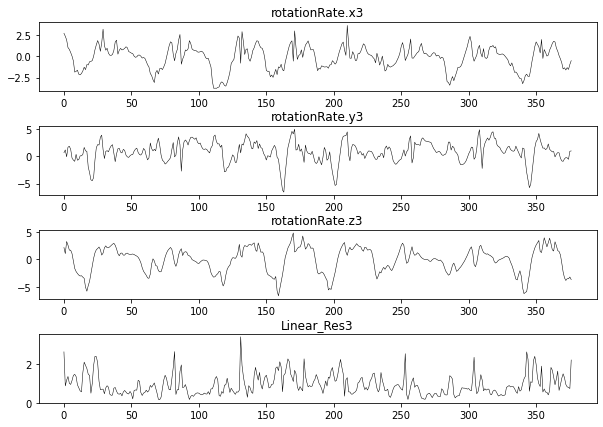

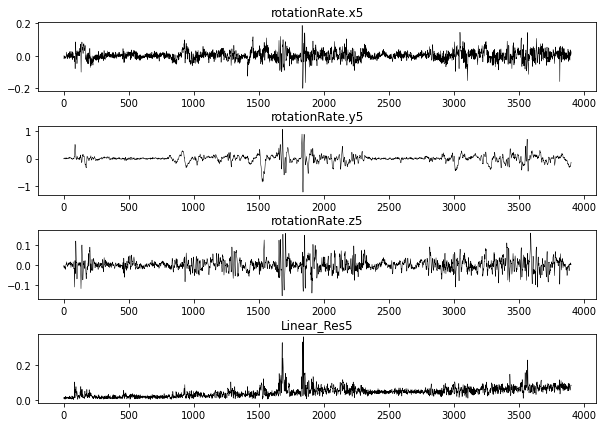

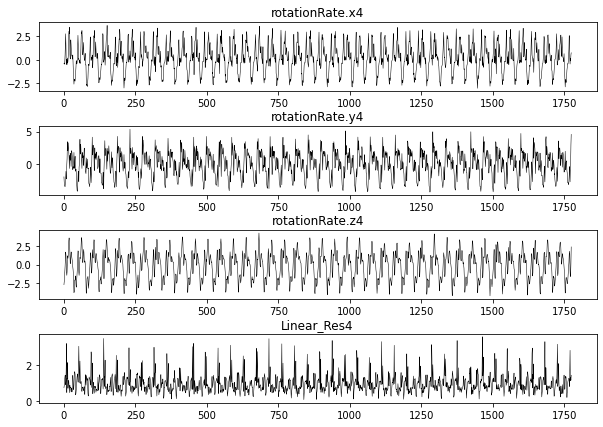

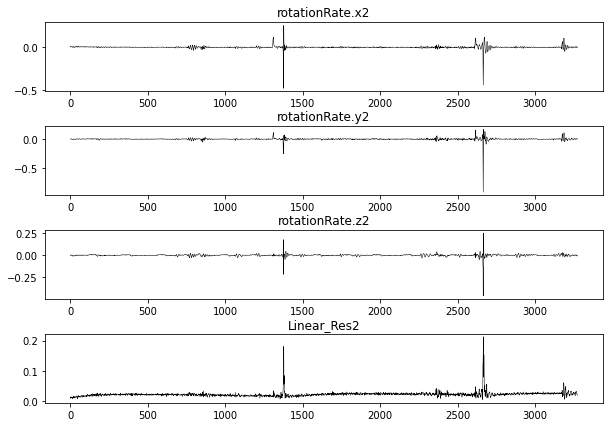

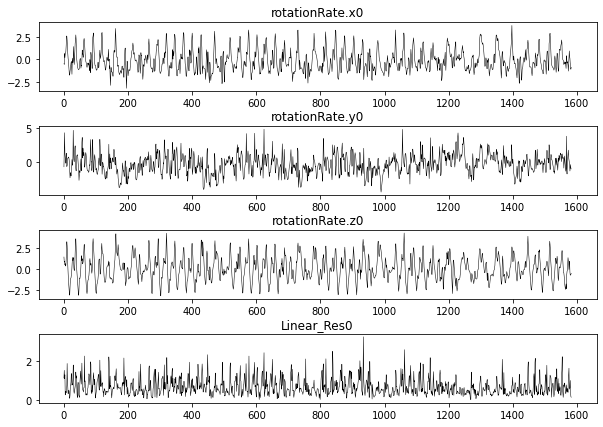

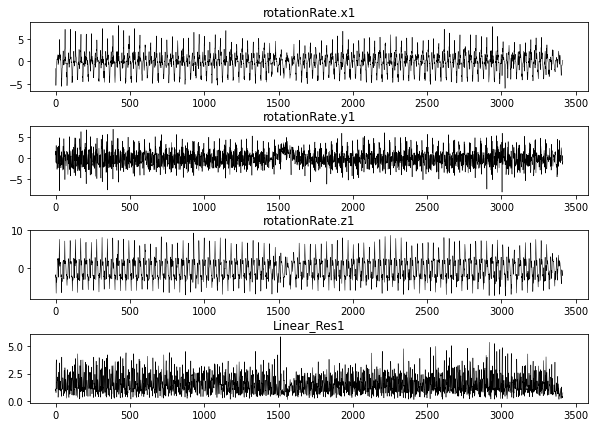

In [ ]:
#array_data_tr
plotted=[]
for items in array_data_tr:
  res=items[4][0] not in plotted
  #print(res)
  #print(items[5][0])
  if items[5][0]=='sub_13.csv' and res:
    print('Yes')
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,7))

    ax[0].set_title('rotationRate.x'+str(items[4][0]))
    ax[0].plot(items[0], linewidth=0.5, color='k')

    ax[1].set_title('rotationRate.y'+str(items[4][0]))
    ax[1].plot(items[1], linewidth=0.5, color='k')

    ax[2].set_title('rotationRate.z'+str(items[4][0]))
    ax[2].plot(items[2], linewidth=0.5, color='k')

    ax[3].set_title('Linear_Res'+str(items[4][0]))
    ax[3].plot(items[3], linewidth=0.5, color='k')

    plotted.append(items[4][0])


    fig.subplots_adjust(hspace=.5)

In [ ]:
sampling_rate=50
for items in range(0,len(array_data_clone_tr)):
  for i in range(0,4):
    y=array_data_clone_tr[items][i] 
    y_array=np.zeros([1,y.size], dtype=complex)
    y_fft= sm.signal.fft(y, sampling_rate, plot=False)
    y_fft=y_fft.transpose()
    array_data_clone_tr[items]=np.vstack([array_data_clone_tr[items],y_fft])
print(array_data_clone_tr)

[array([[2.660821, 2.312847, 1.885488, ..., -1.553501, -0.974323,
        -0.5291399999999999],
       [0.6268060000000001, 1.136383, -0.115252, ...,
        -0.5745060000000001, 0.899727, 0.954456],
       [2.182812, 1.060232, 3.276479, ..., -3.5568730000000004,
        -3.233182, -3.71832],
       ...,
       [(0.758299777188329+0j),
        (0.014439694404085168-0.004854506109705961j),
        (-0.30666912425470905+0.08397820599863055j), ...,
        (0.006677969343575759-0.03644008683491345j),
        (-0.30666912425470905-0.08397820599863054j),
        (0.014439694404085171+0.004854506109705973j)],
       [(-0.12146108222811672+0j),
        (-0.05036560674791713+0.018762189065412632j),
        (0.0783667472418163-0.1029407185013474j), ...,
        (-0.033371487156347586+0.05478351770224722j),
        (0.07836674724181629+0.10294071850134738j),
        (-0.050365606747917124-0.018762189065412667j)],
       [(0.932651904016092+0j),
        (-0.02234145136205412-0.024047236256507447j

377
1093
1268
1183
1204
1405
743
1326
1371
1026
1144
1227
1617
1212
903
1149
1008
1496
3900
2730
2425
2161
3146
4211
3969
3267


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

4014
5583
2115
2546
3836
4062
3209
2972
5779
2150
1775
2241
6305
2334
2216
2744


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

2060
2257
3227
2459
2861
3768
3192
3594
2436
1630
2373
3306
3274
2928


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

3712
5081
3106
4225
3386
5864
4962
4090
2522
3069
4137
1894
4296
7650
3557


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

3031
3782
4695
5614
4754
4665
5446
4076
6111
5295
5176
5014
5336
6304
5194


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

3841
4889
4948
5441
5464
6767
7681
7104
6996
7366
5021
6402
6678
7088
7026


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

6471
7360
6410
4735
6626
6442
6505


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

9901
12757
9220
11125
11221
11001
10688
9397
11690
7760
7937
9099
10326
12303
9609
7926


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

8466
6106
902
1606
2635
2422
2508
2799
1397
2505
2938
1957
2562
2468
3349
2395


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

1981
2368
2397
3229
1512
2466
3332
2887
2909
3898
1512
2994
3529
2403
3013
2762


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

3702
2951
2692
2783
2710
4086
11868
9834
7851
7668
7050
9282
10973
7147
16424
8767


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

9679
8019
10429
10245
9209
11294
7627
7024
1583
1719
2144
2078
2085
2367
1647


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

2678
2048
2146
2236
1917
2905
2270
2187
2025
1824
2332
3414
3896
4966
3847
3377


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

4814
2843
4397
5214
4343
4143
5294
5535
4753
3558
3284
4813
4815


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

557
544
1095
913
1180
1207
439
1111
861
1117
900
925
1168
1143
699
969


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

696
1056
1029
1237
1452
1072
960
1699
790
1453
1207
929
1385
921
1636


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

1216
765
985
1468
1147
1809
1974
2639
2507
2916
2953
1461
2887
2491
2484
2616
2244


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

3436
2911
2163
2742
1920
2832
1066
1361
1262
1442
876
1250
2553
2655
3106
2229
5184


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

3809
1333
2957
2620
2614
2582
2388
10292
4918
4720
2934
5979
4494
4340


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

4883
4828
4860
4906
5973
5439
6864
6122
6742
6934
8402
10292
11383
9657
8050


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

9820
8923
2195
2787
2877
2249
2494
3184
3075
3304
2991
2849
3229
3483
10194
9230


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

10561
9307
7601
7533
1751
1885
2179
1522
1772
2946
4861
4549
4247
4534
3974
4856


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

896
927
1157
814
979
1149
1567
1350
1952
1244
1178
1262
2458
2223
2448
1903
1935
3156


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

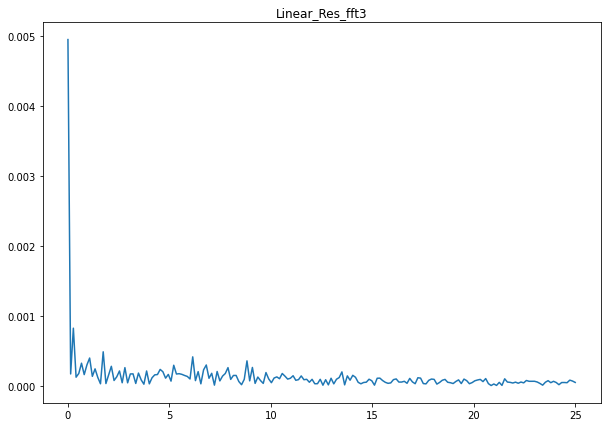

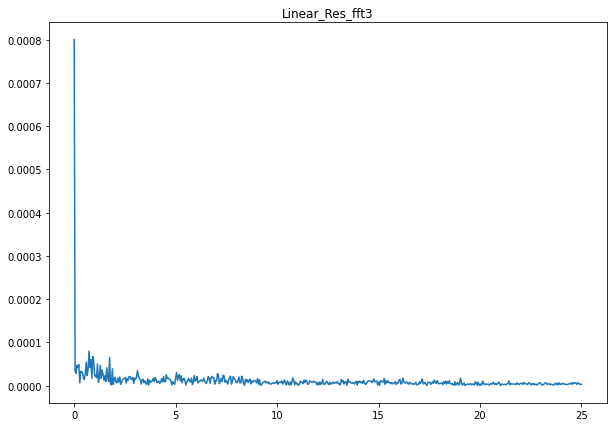

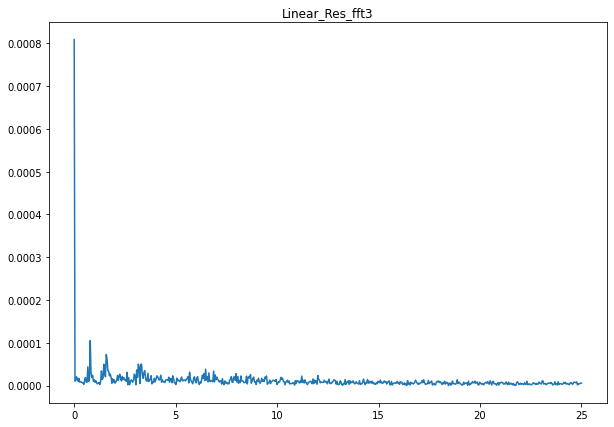

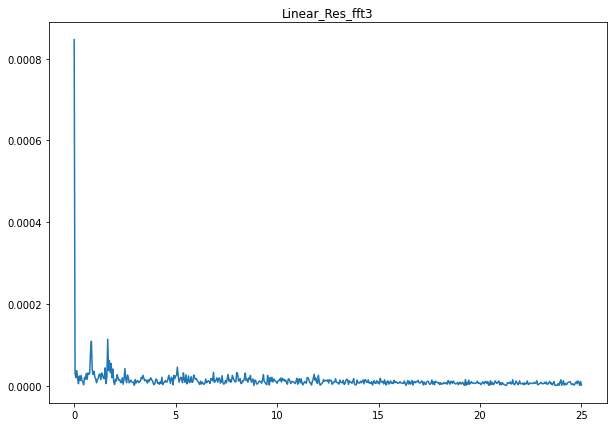

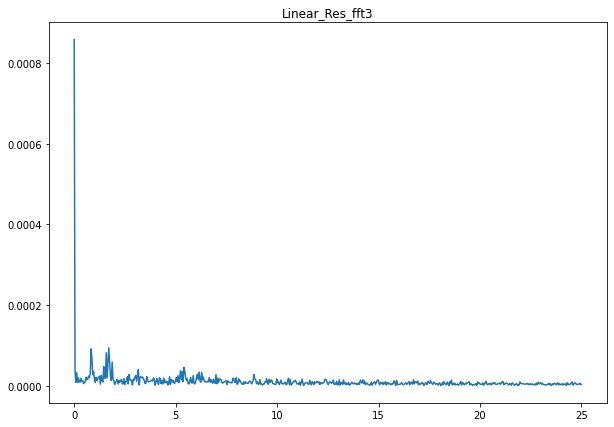

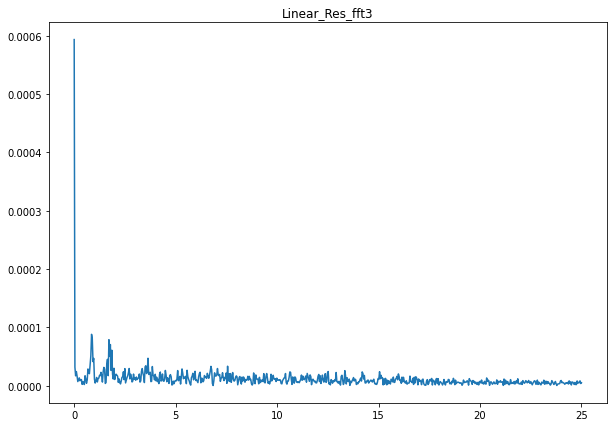

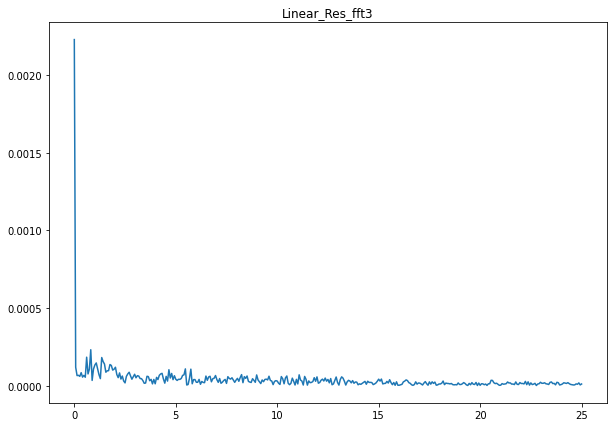

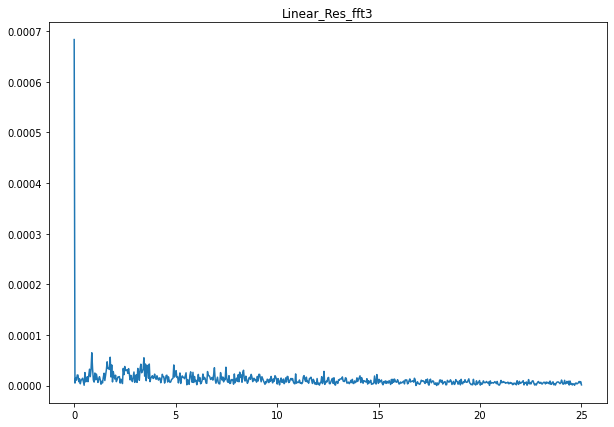

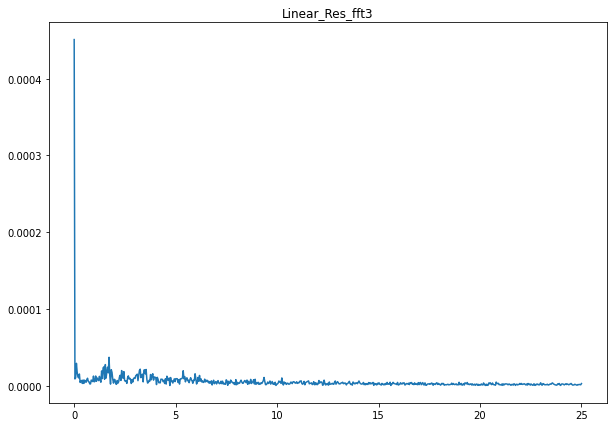

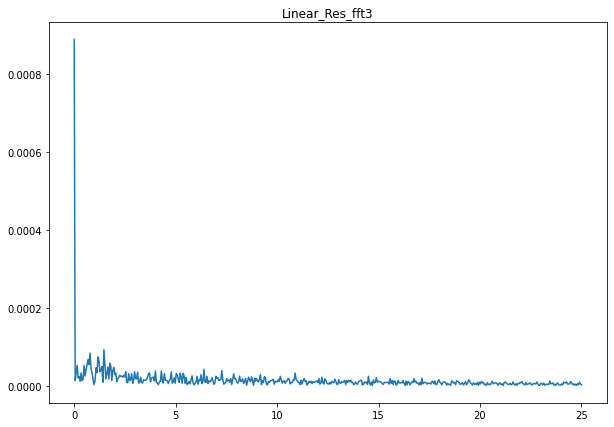

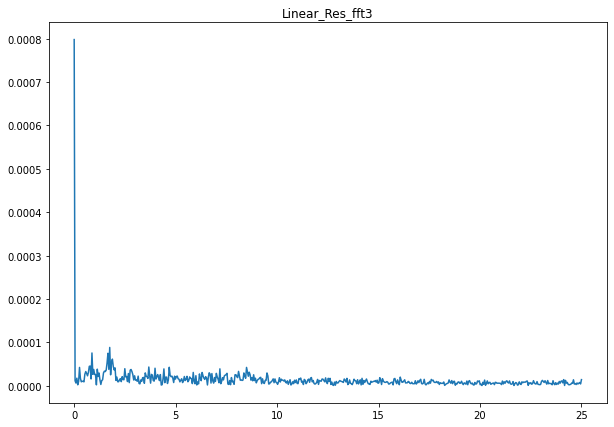

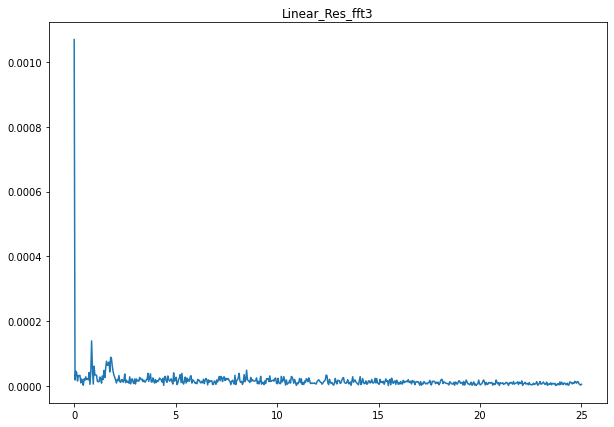

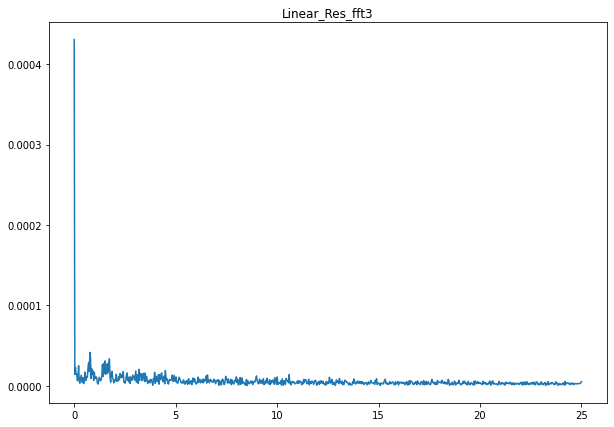

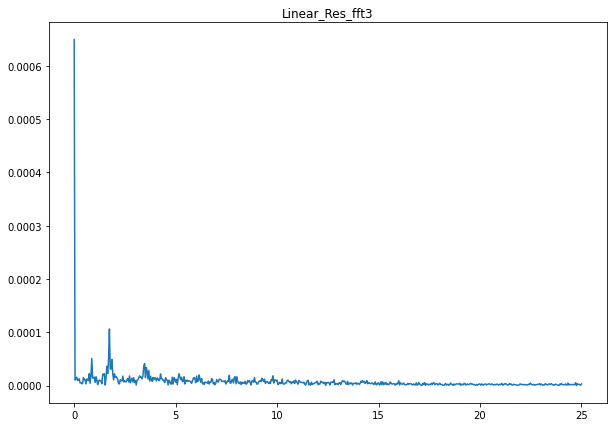

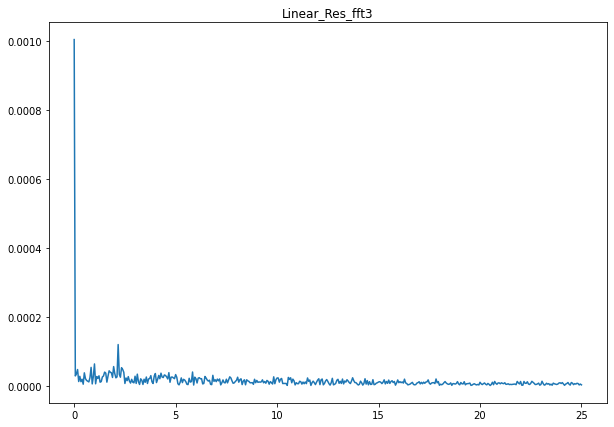

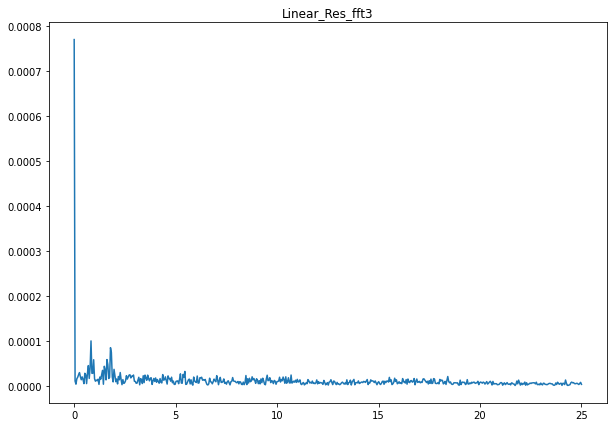

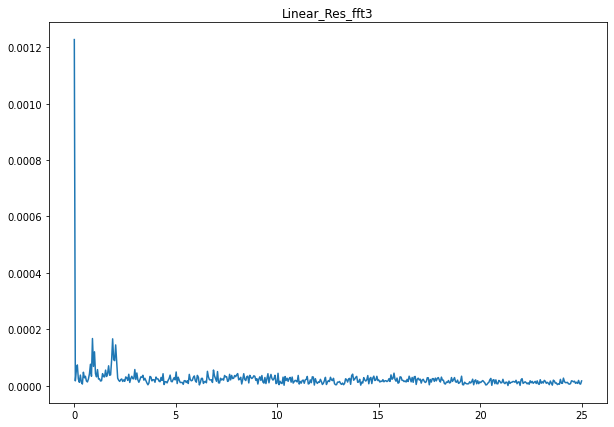

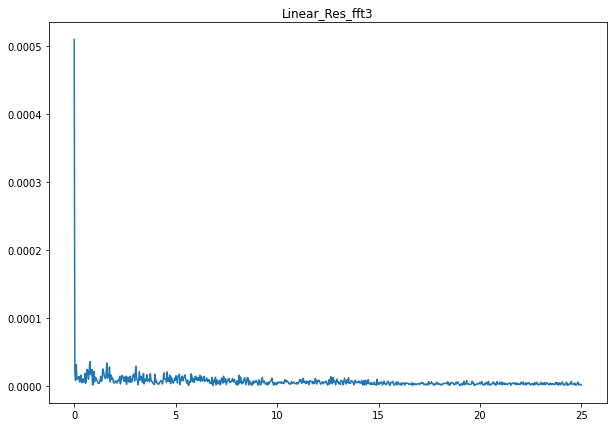

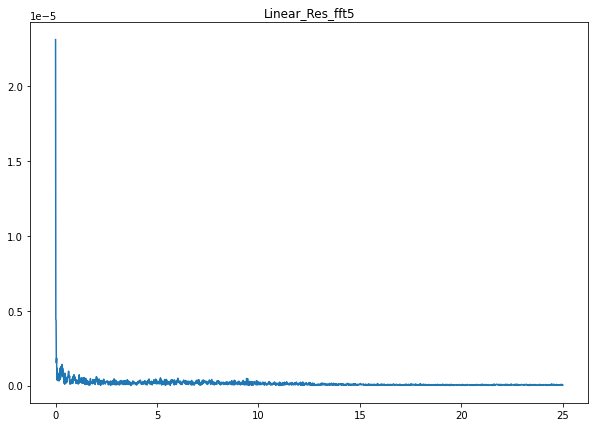

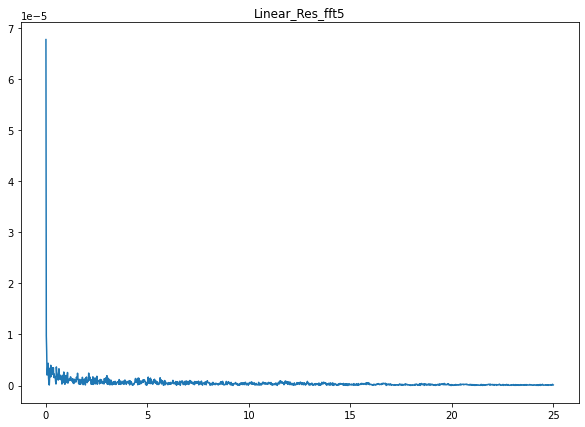

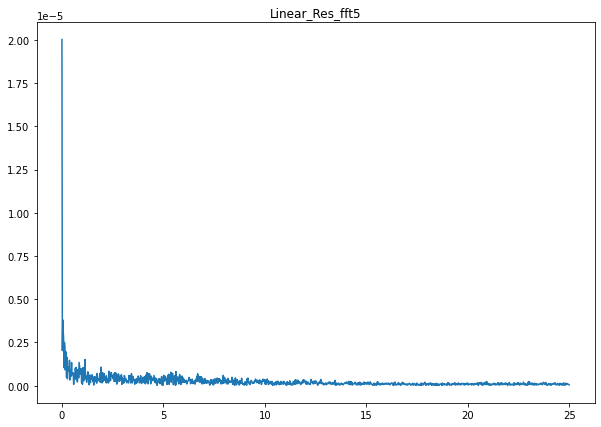

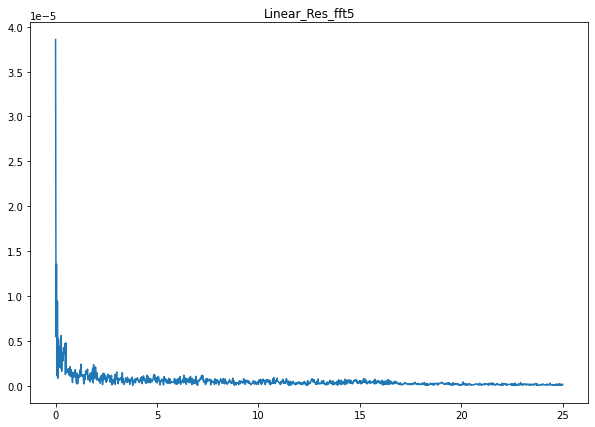

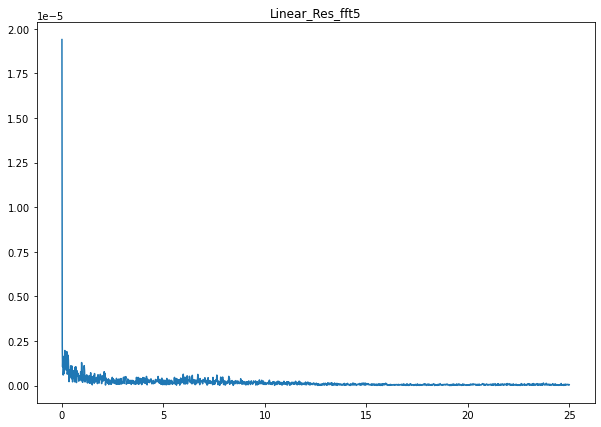

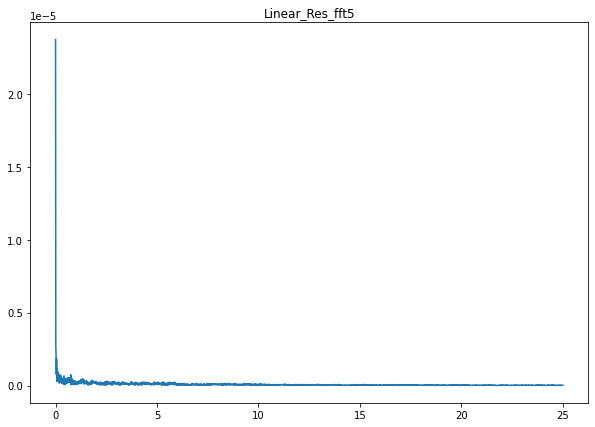

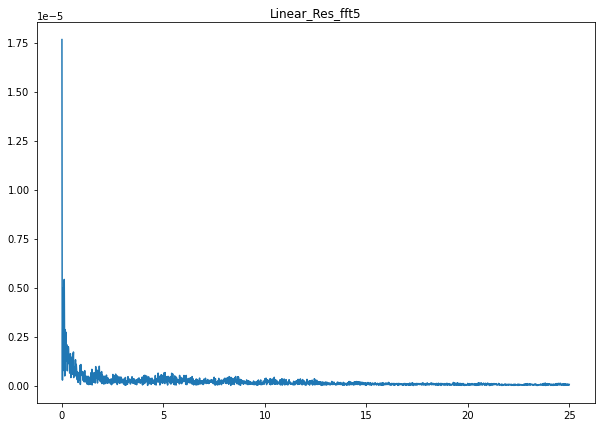

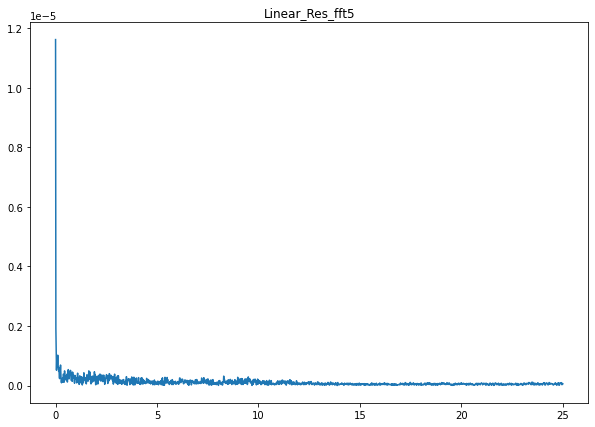

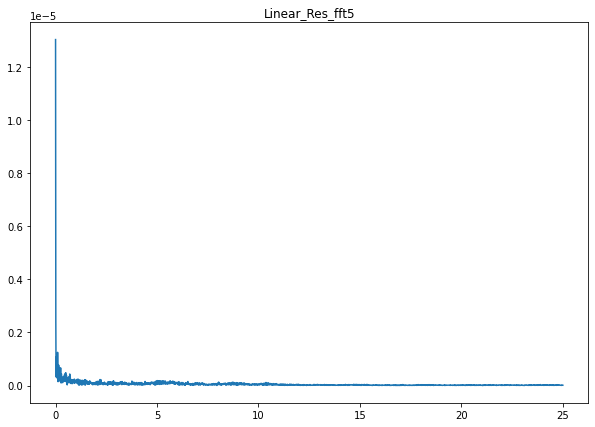

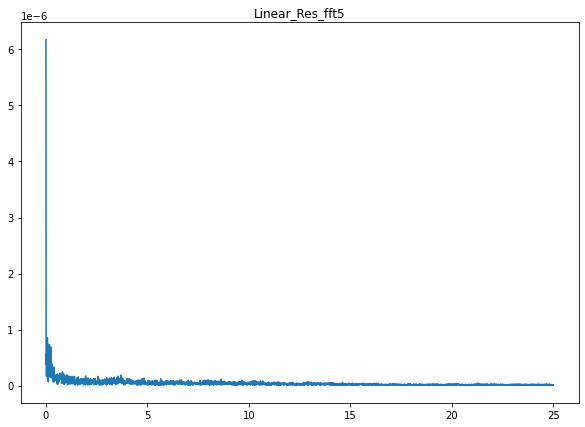

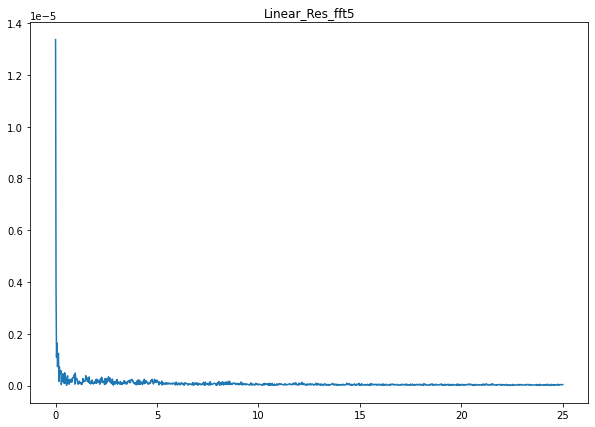

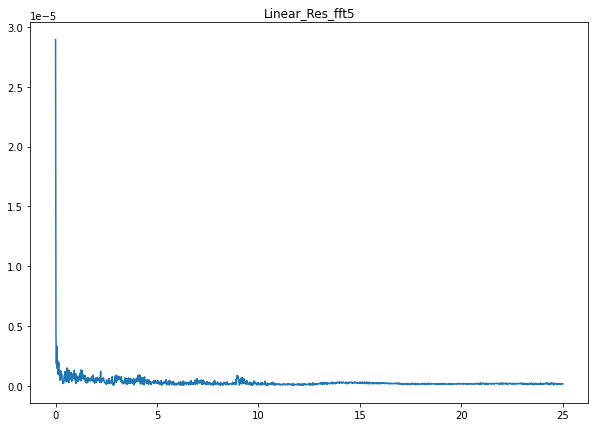

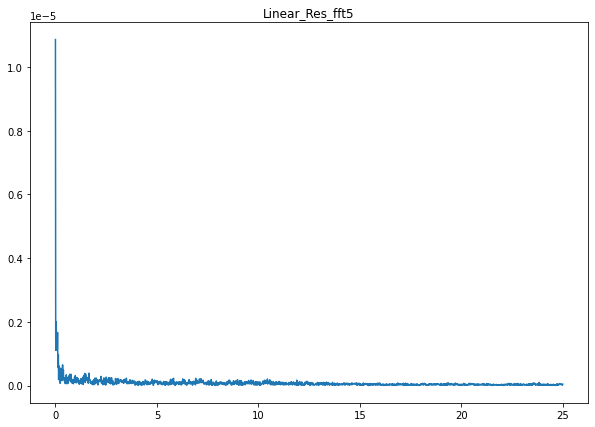

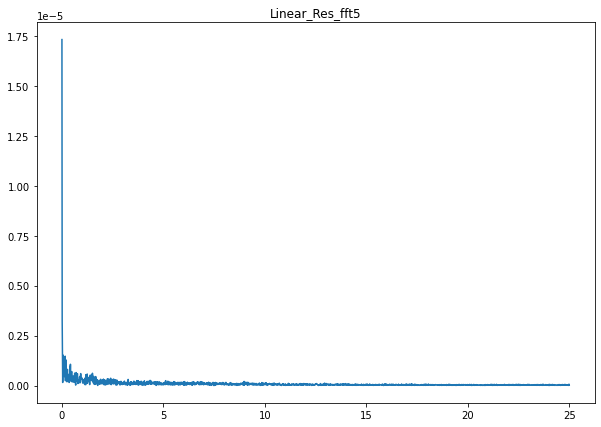

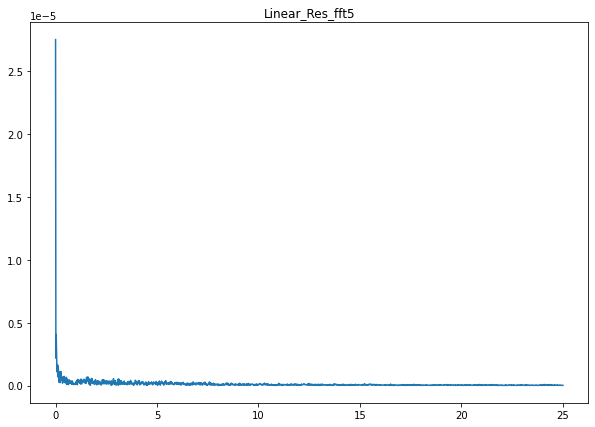

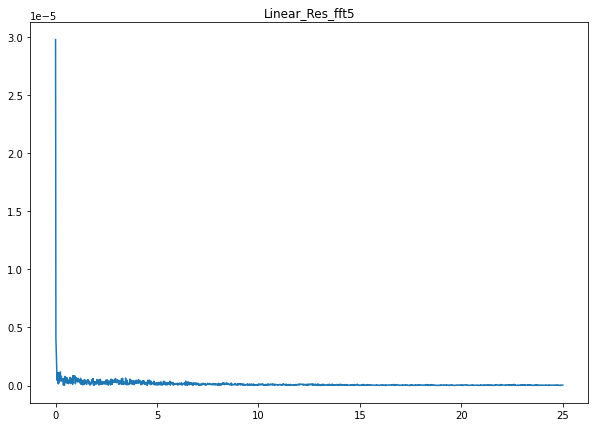

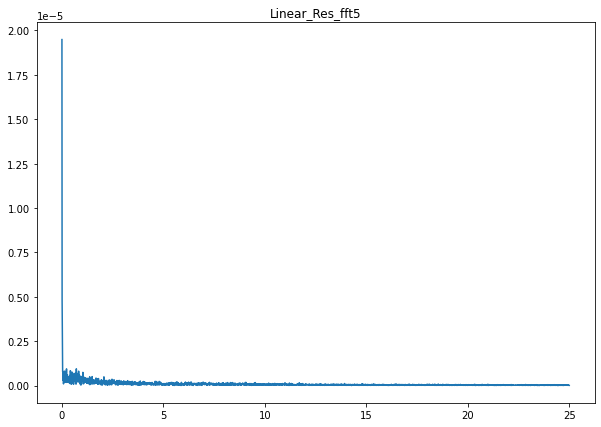

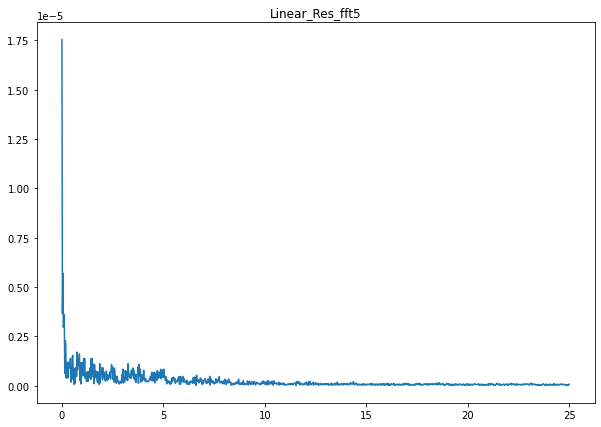

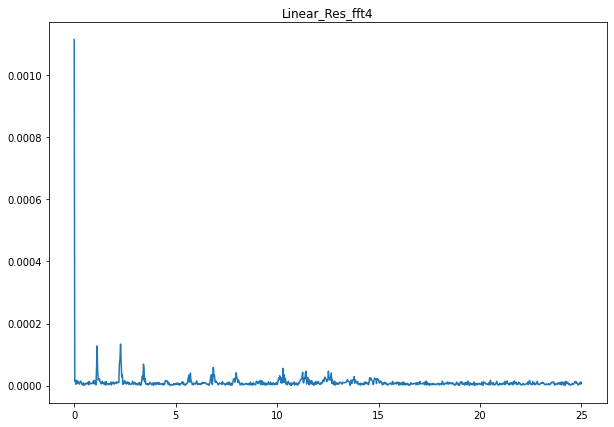

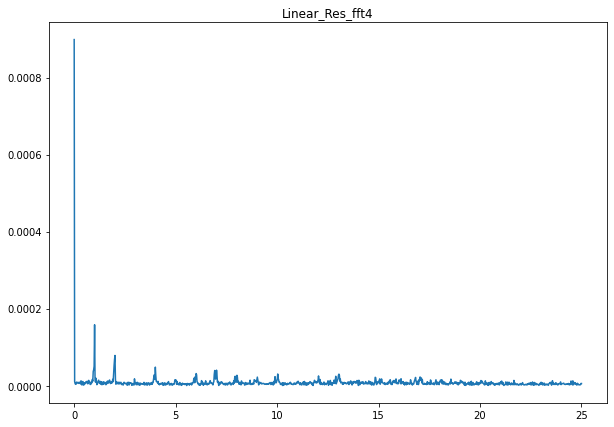

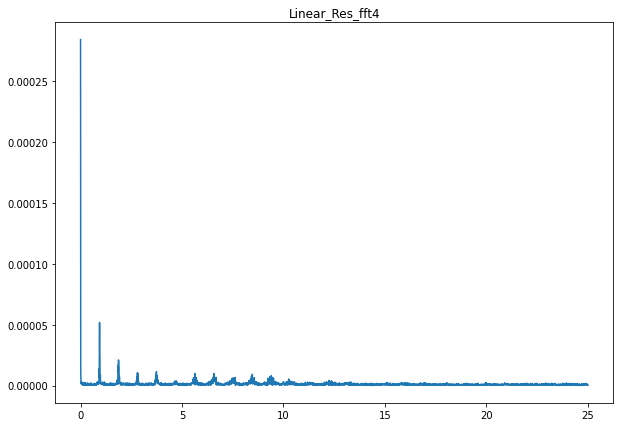

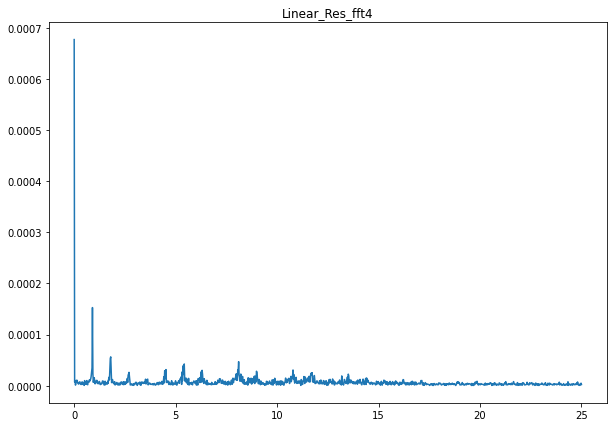

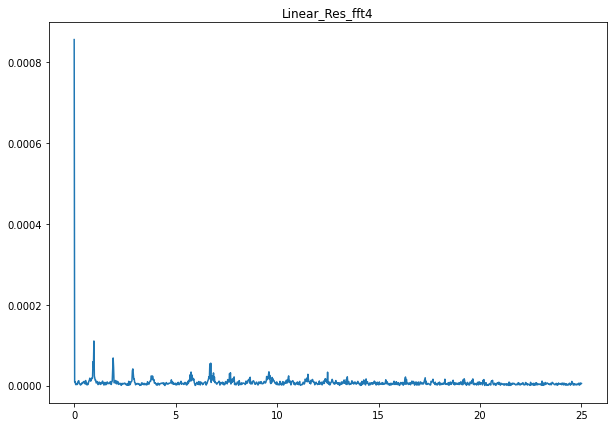

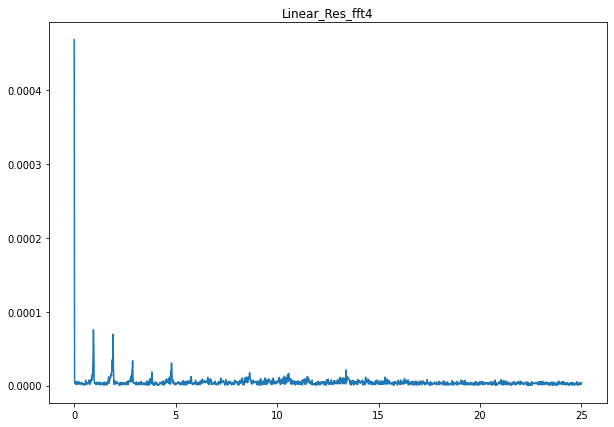

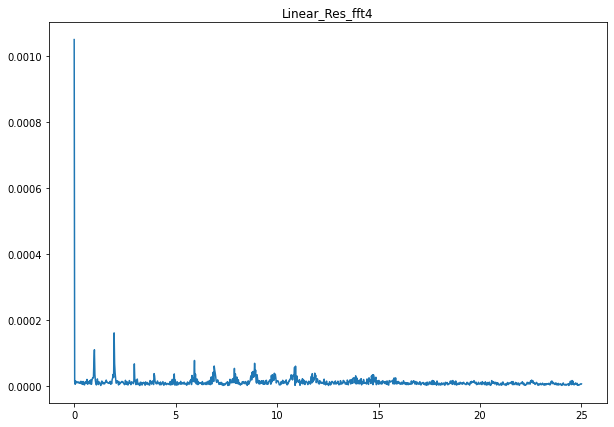

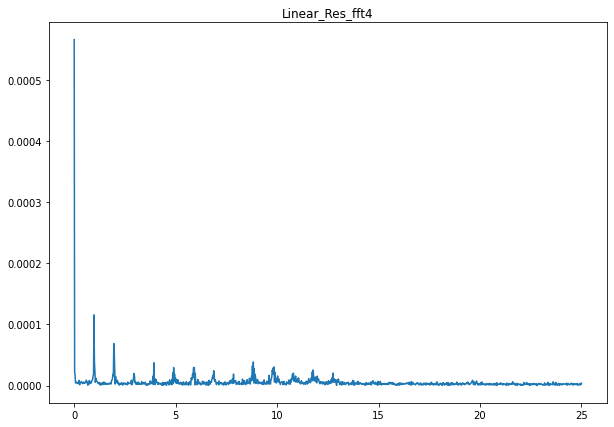

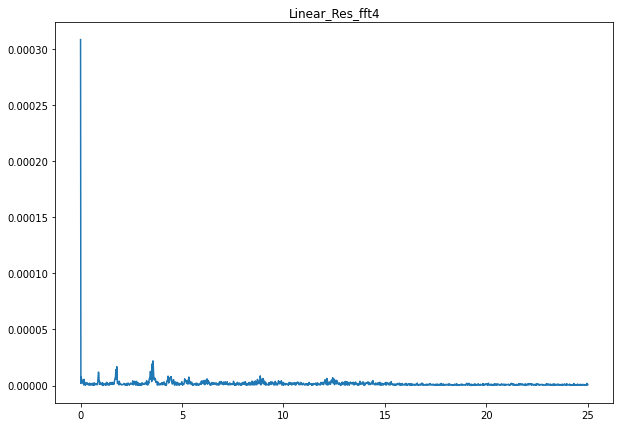

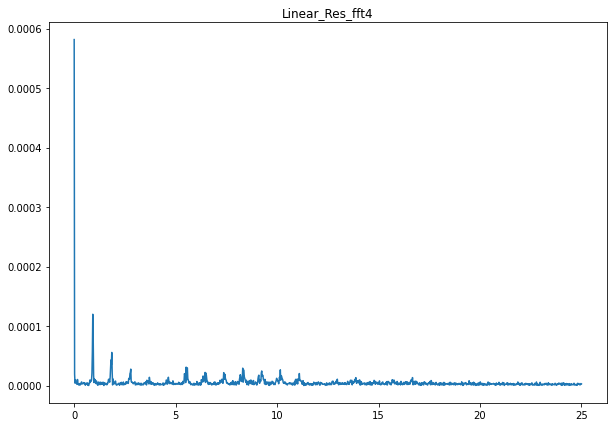

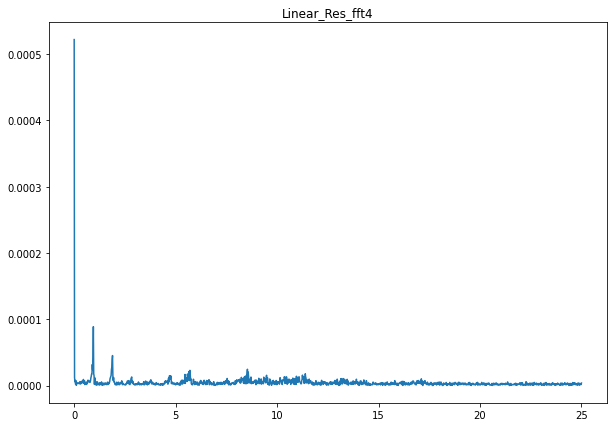

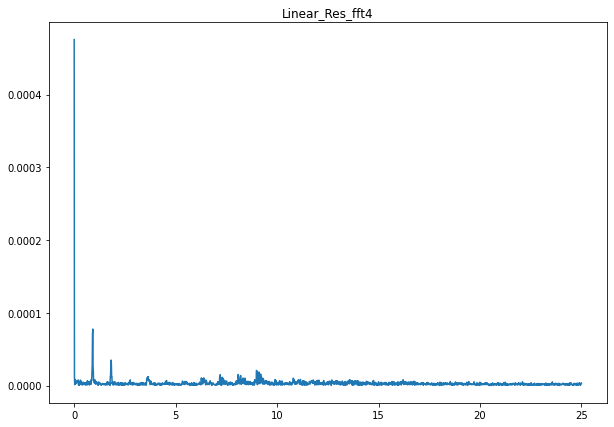

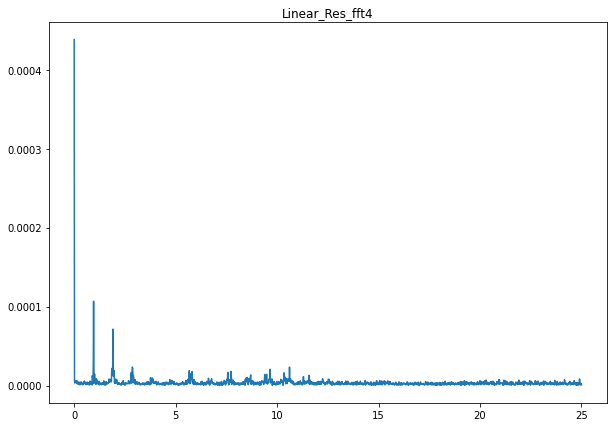

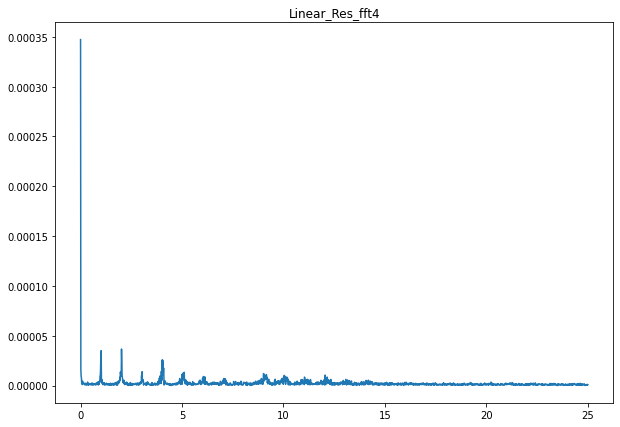

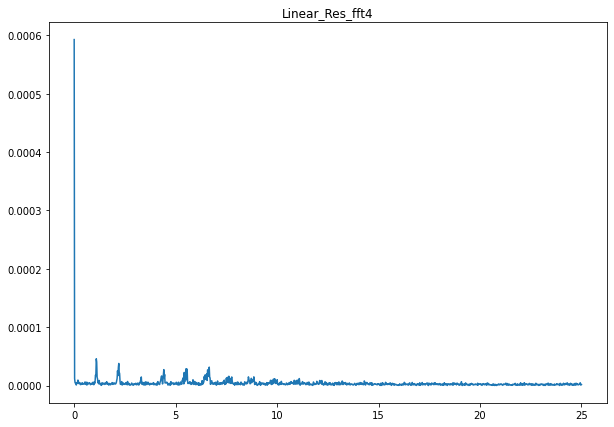

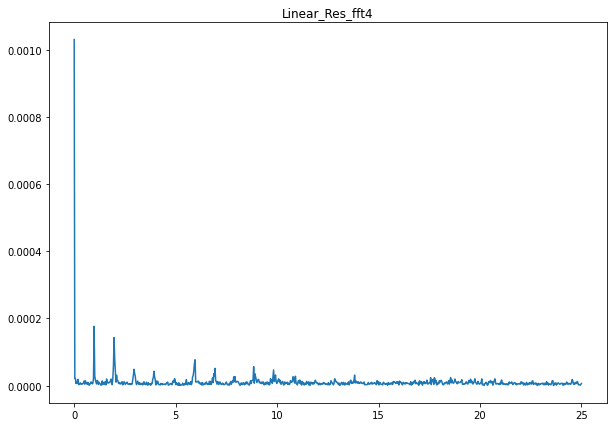

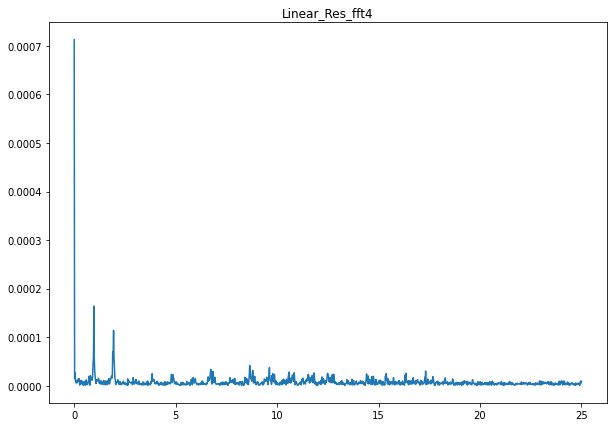

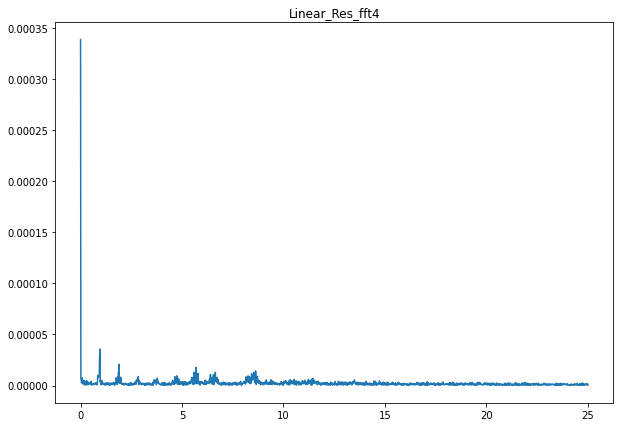

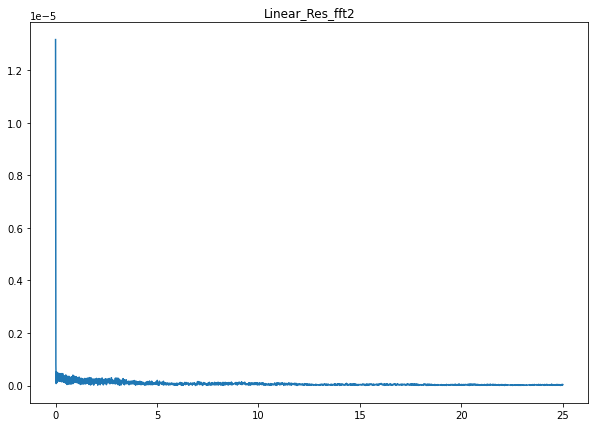

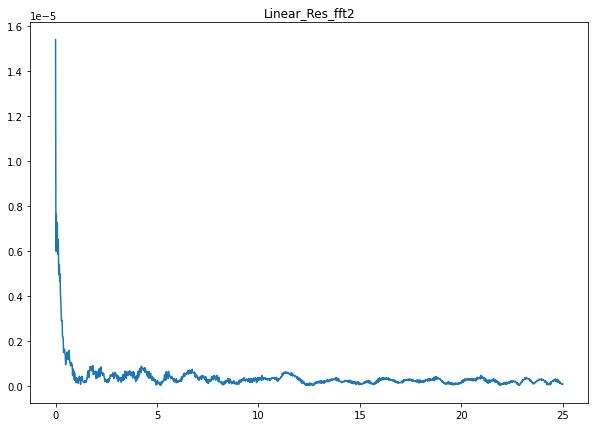

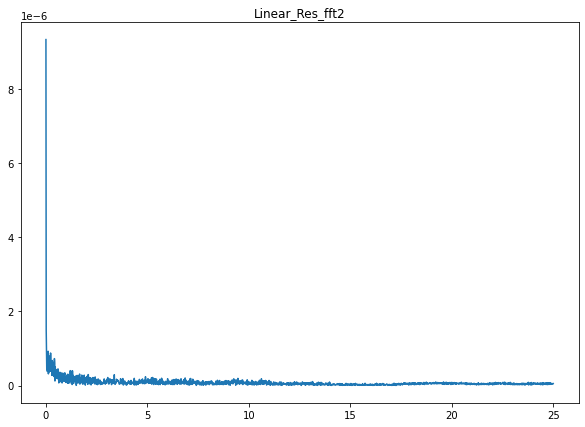

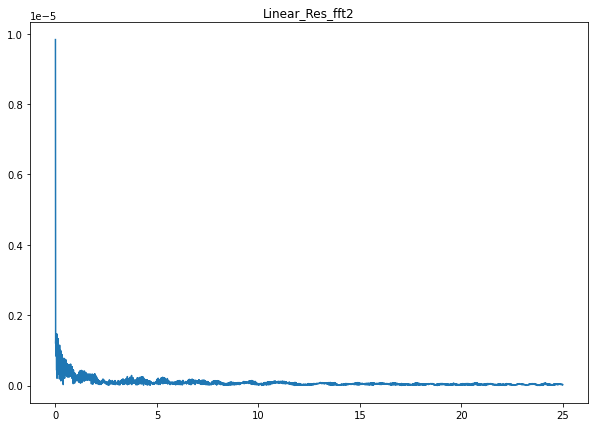

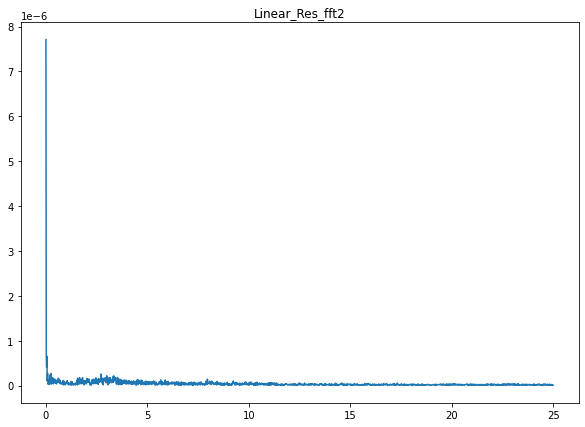

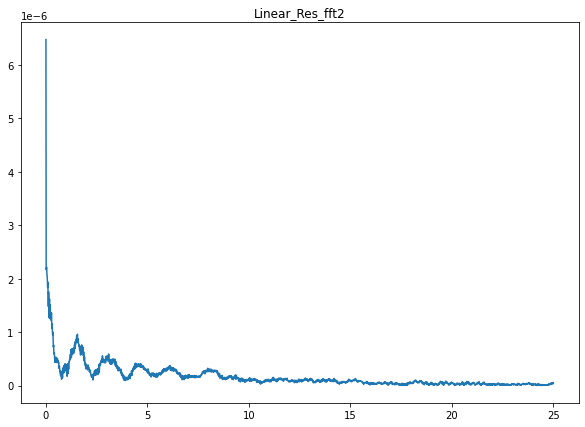

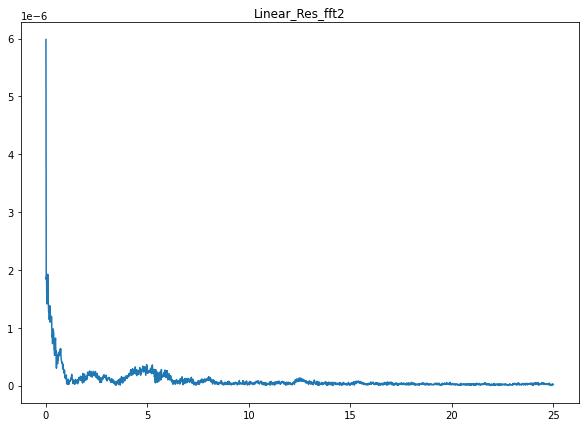

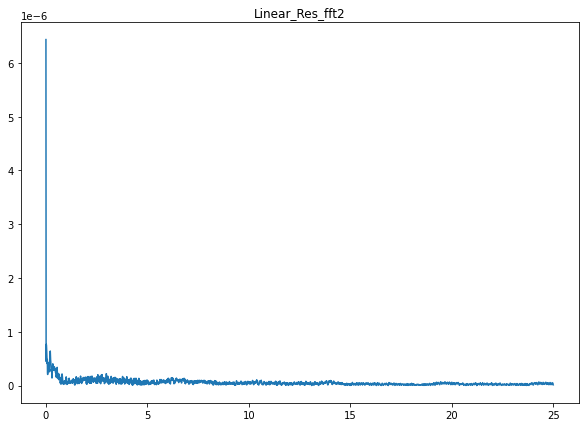

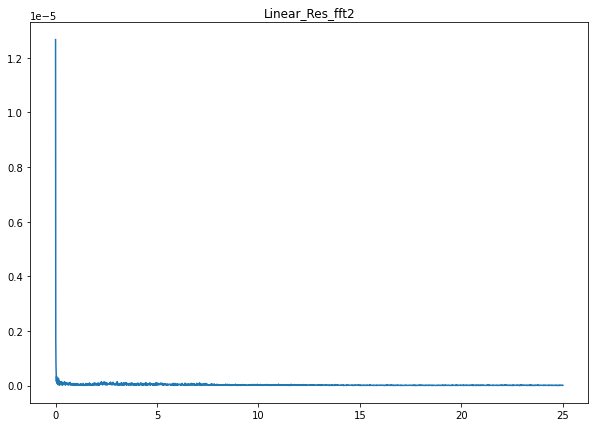

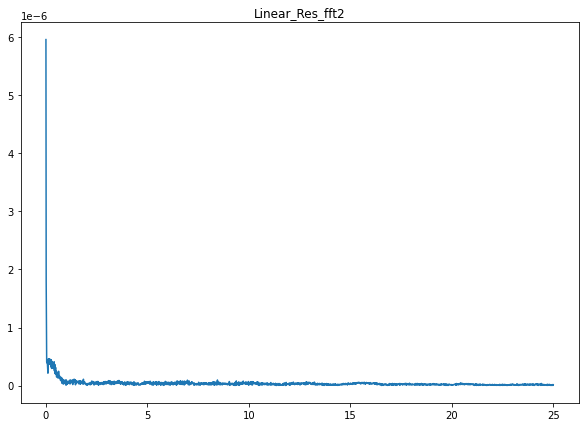

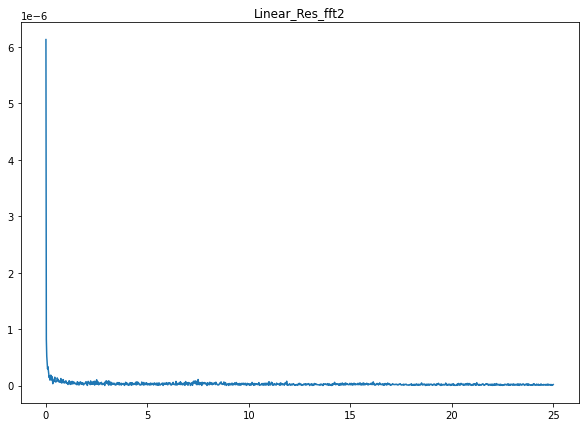

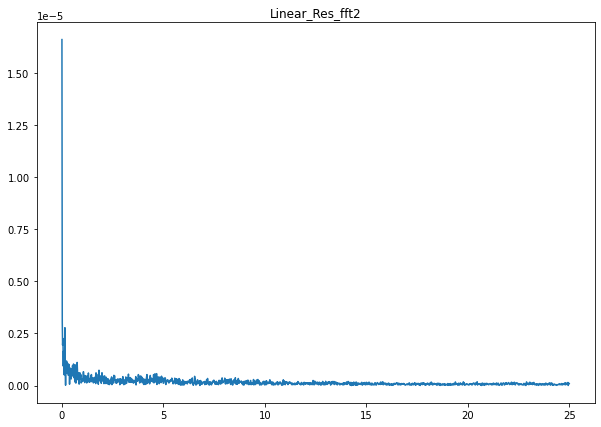

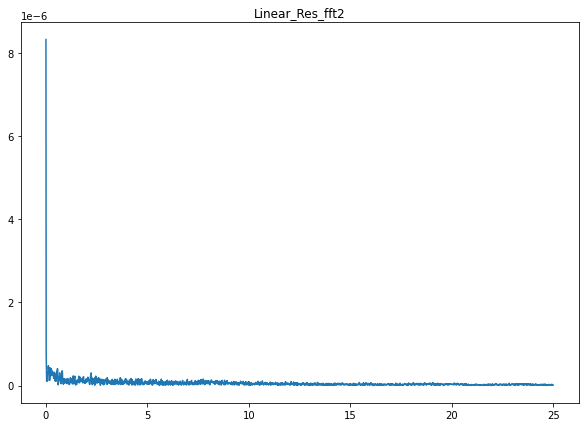

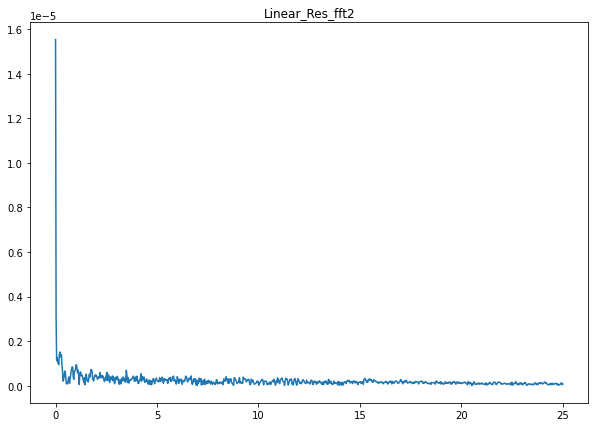

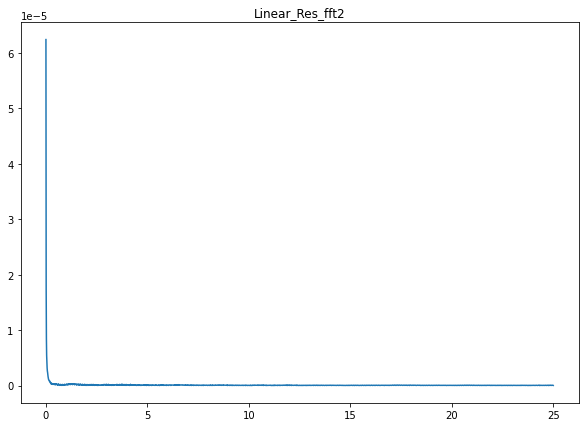

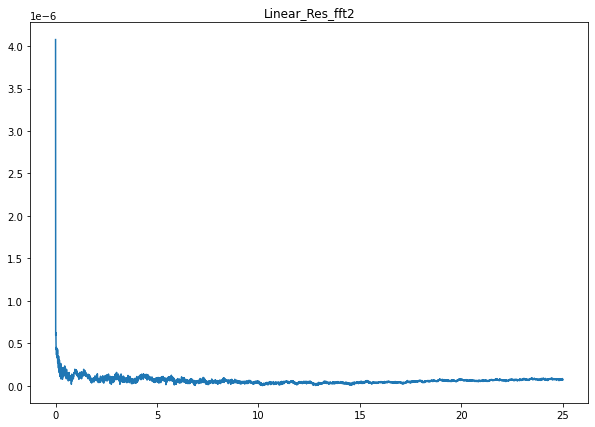

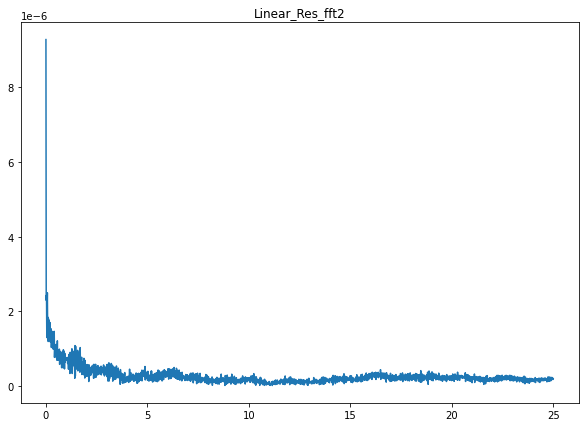

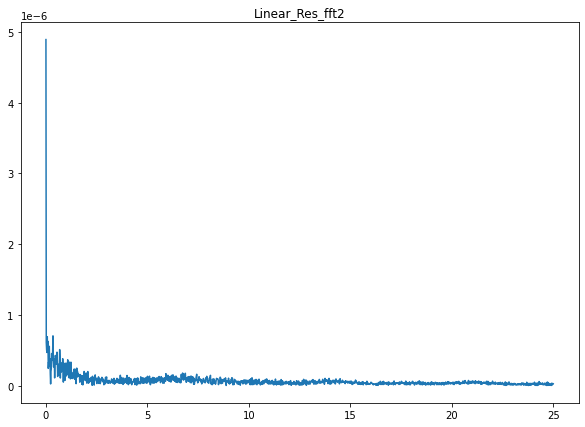

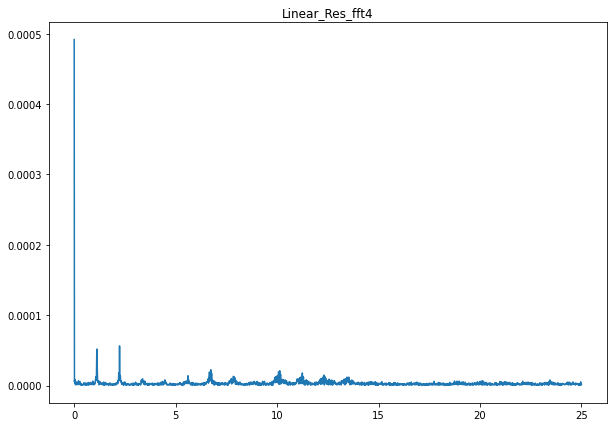

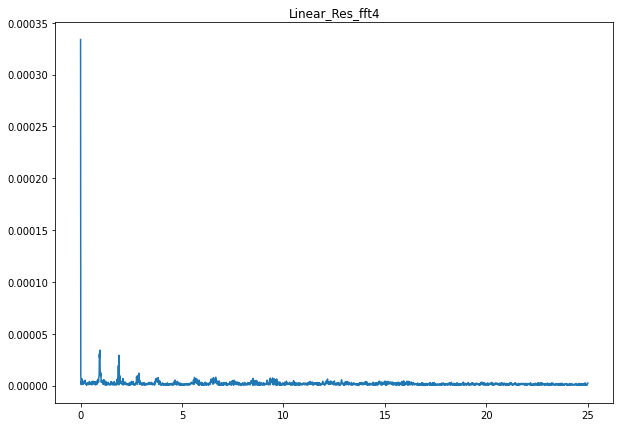

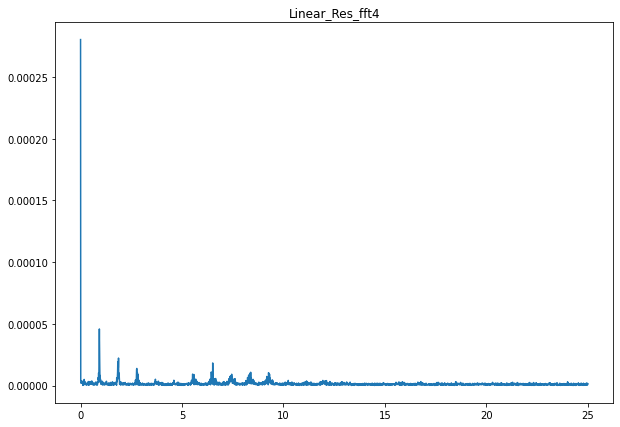

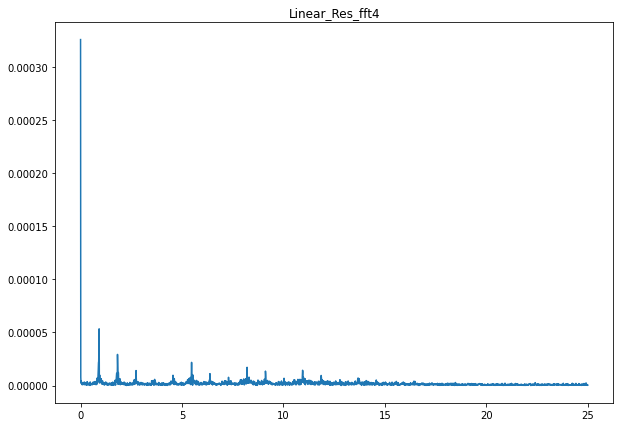

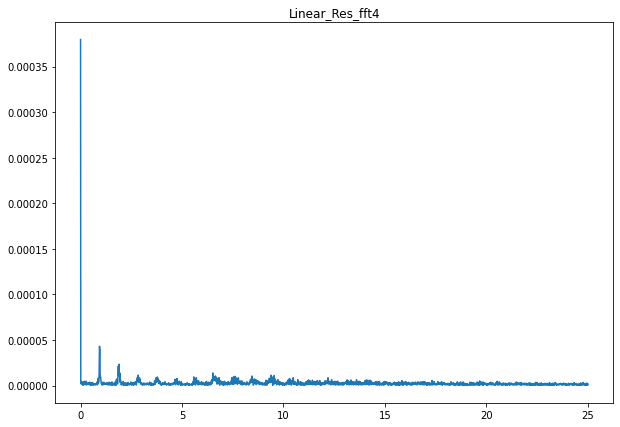

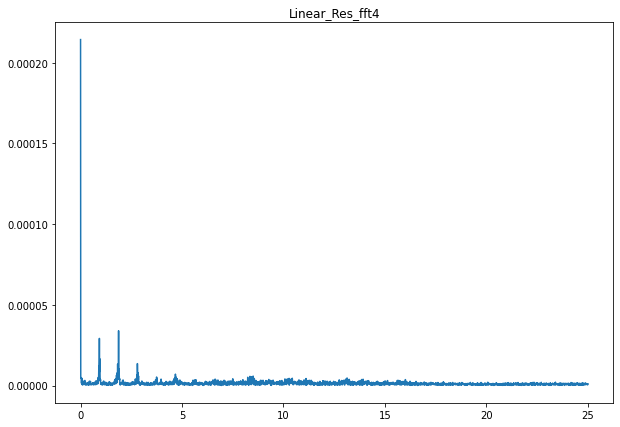

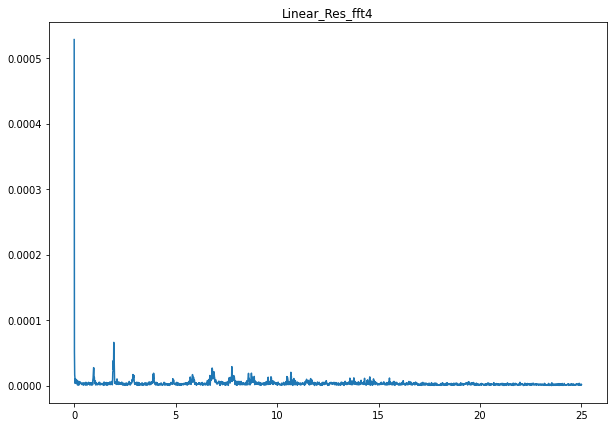

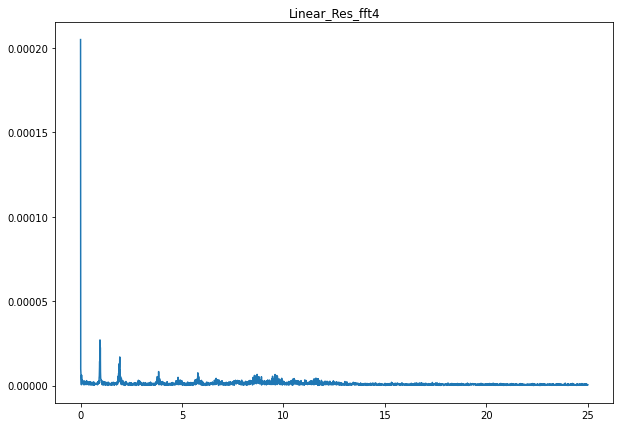

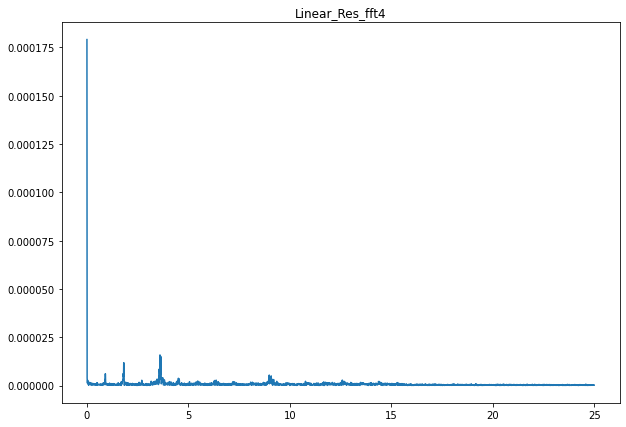

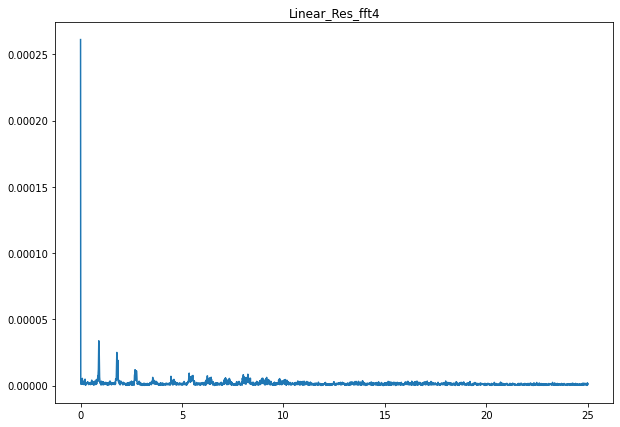

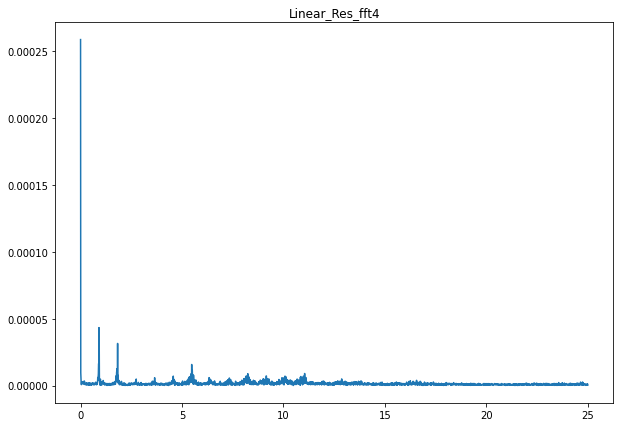

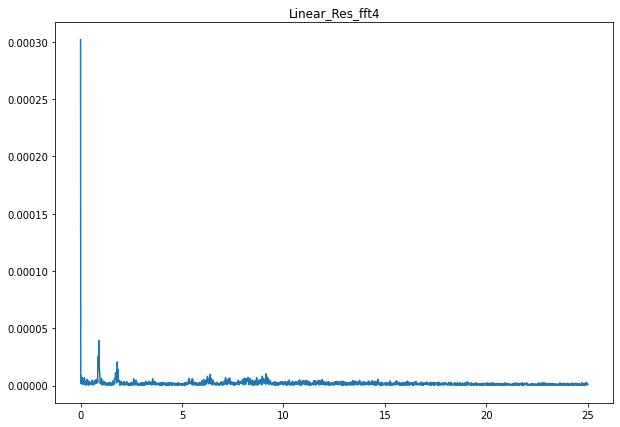

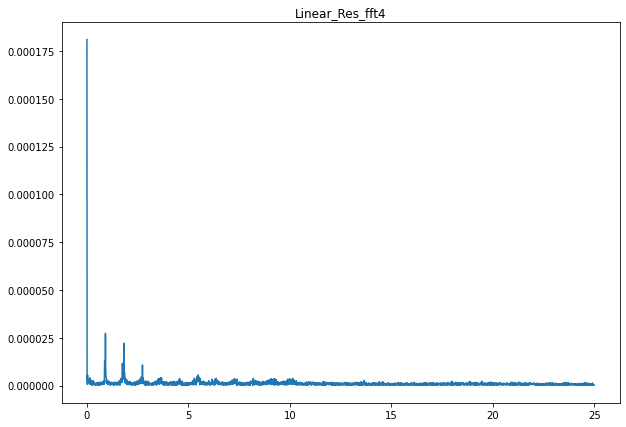

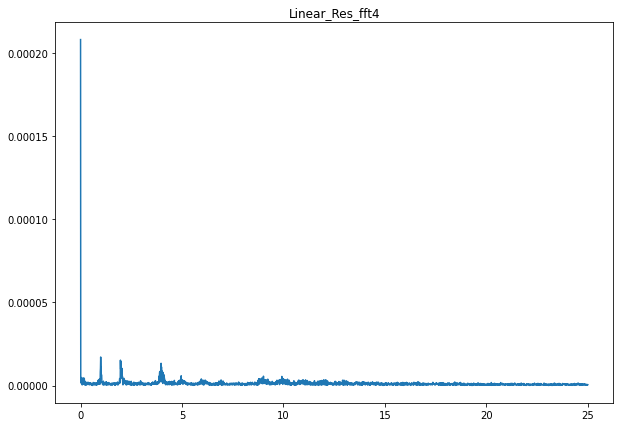

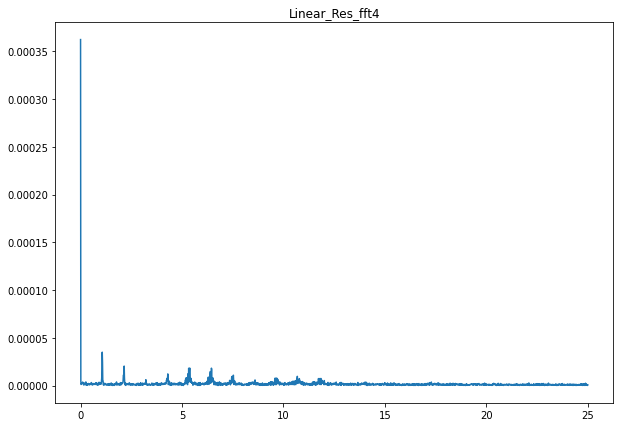

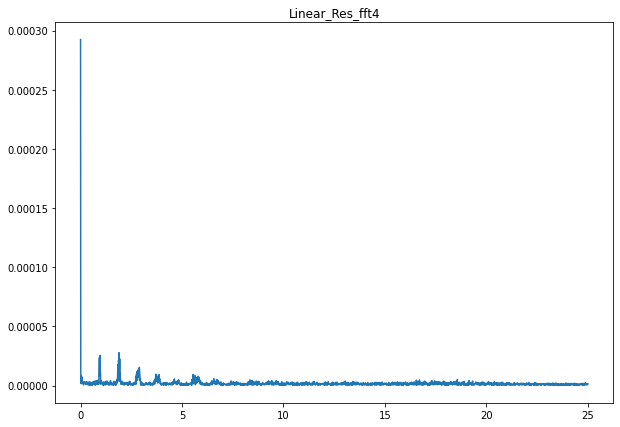

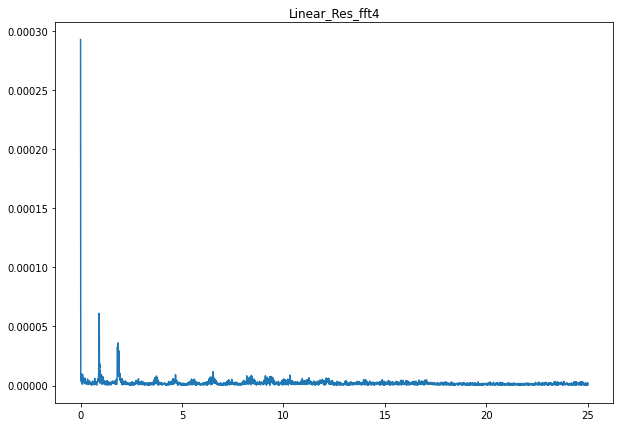

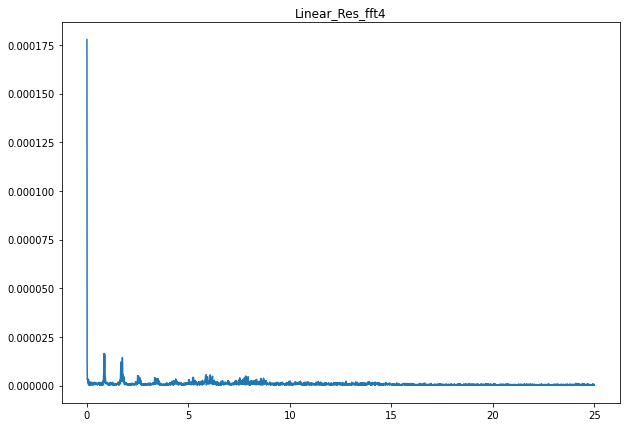

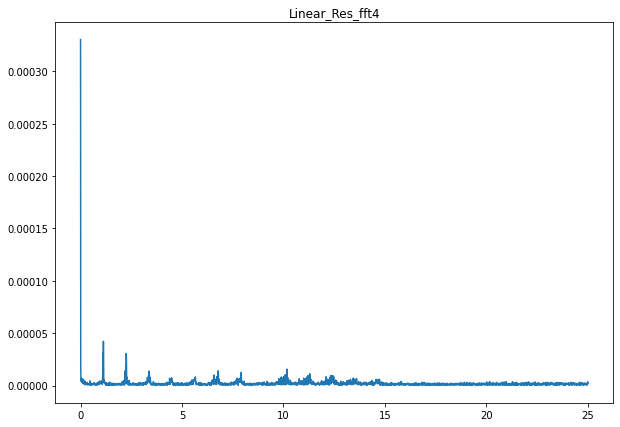

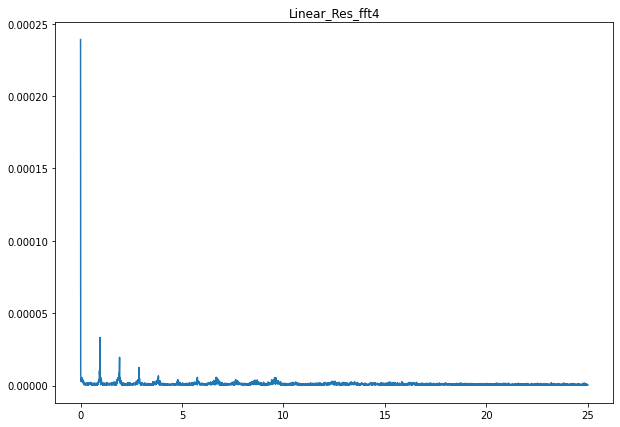

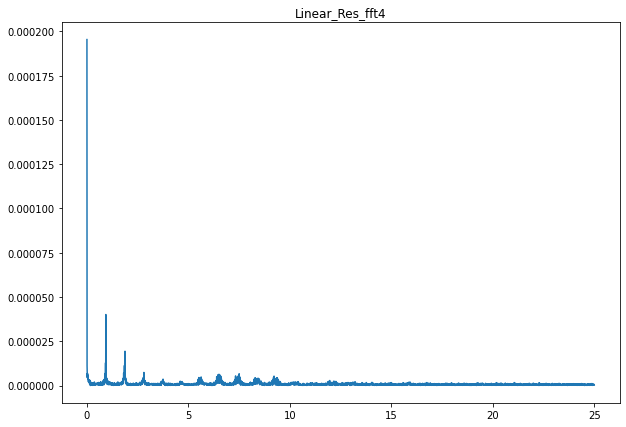

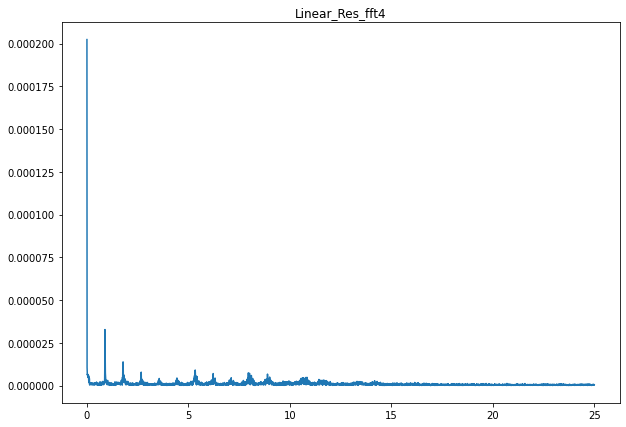

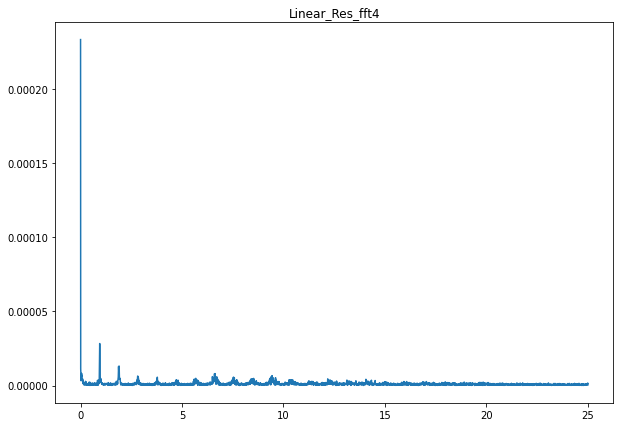

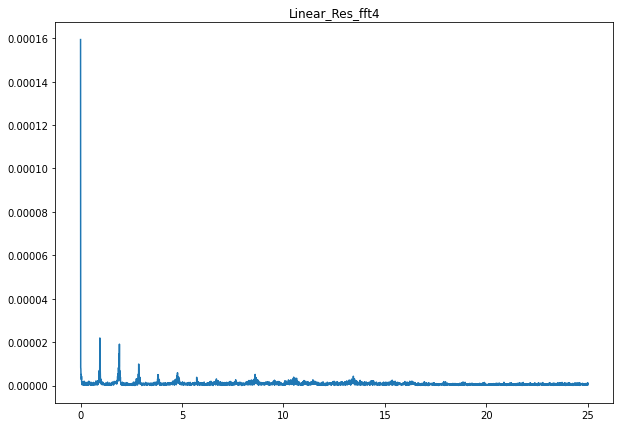

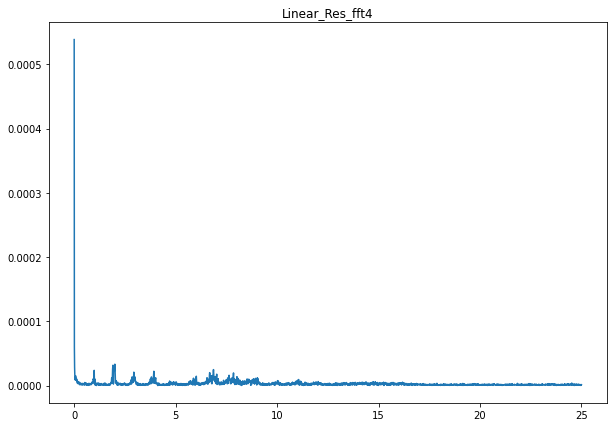

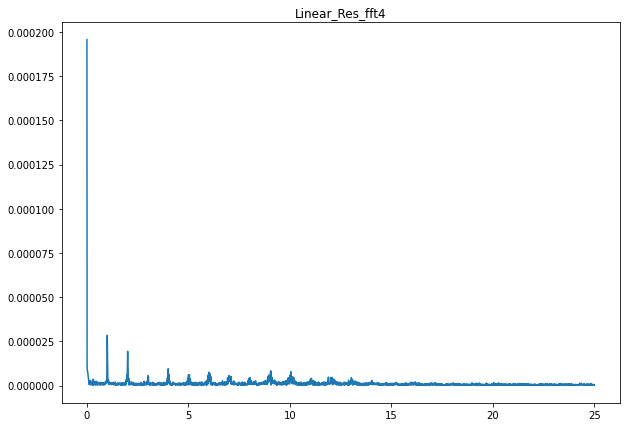

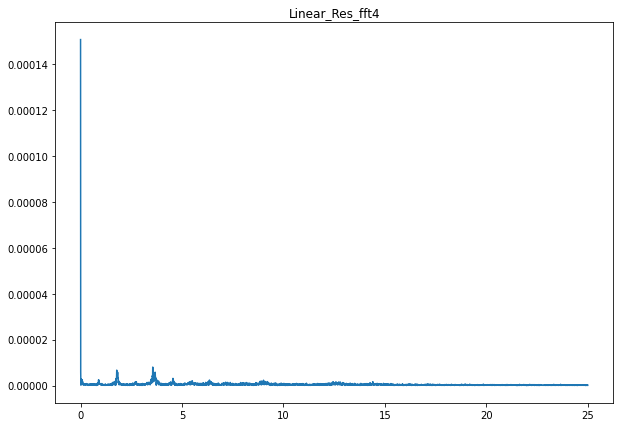

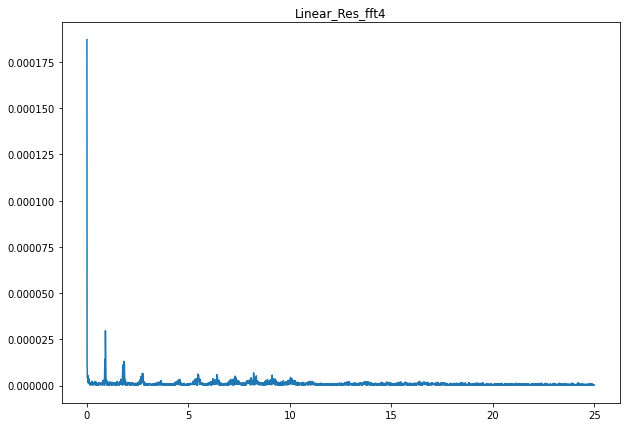

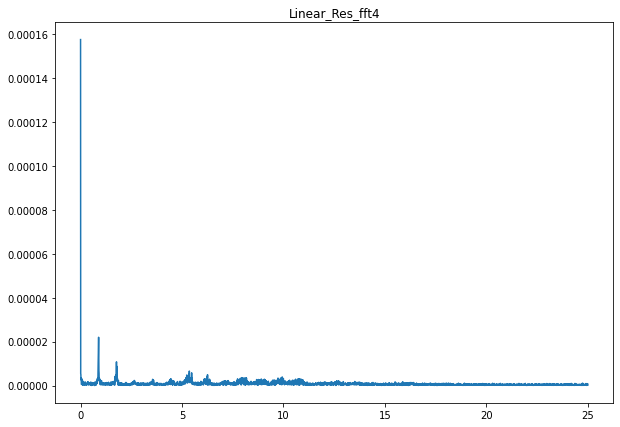

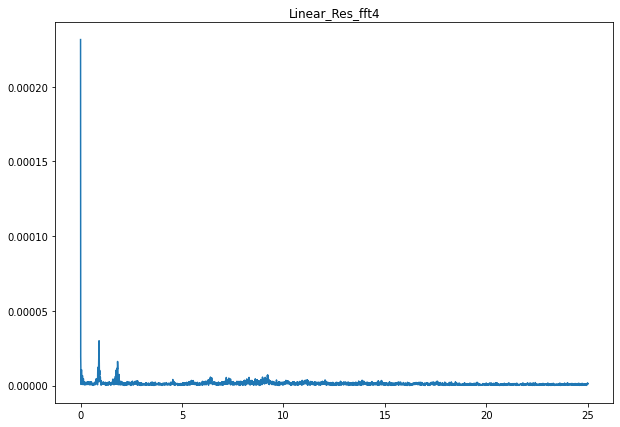

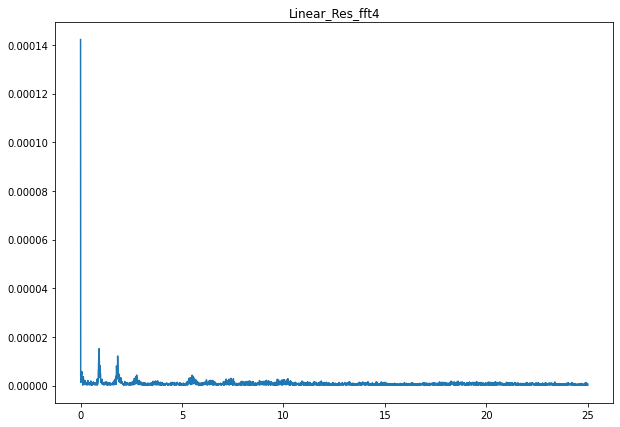

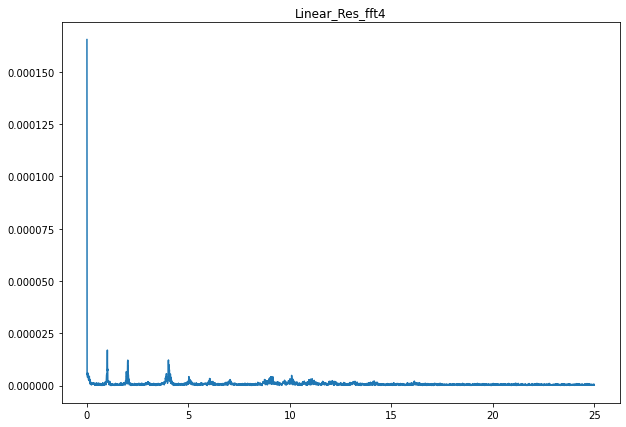

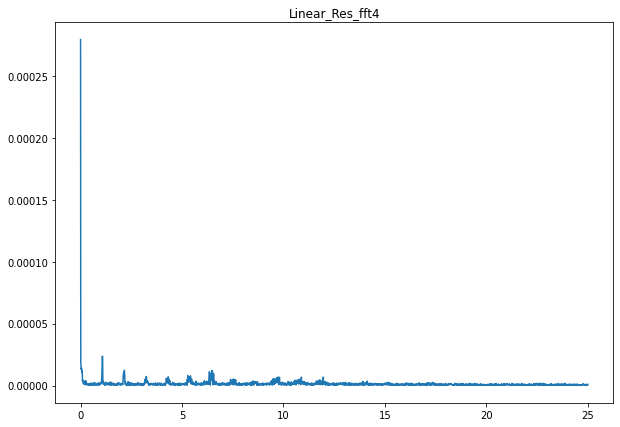

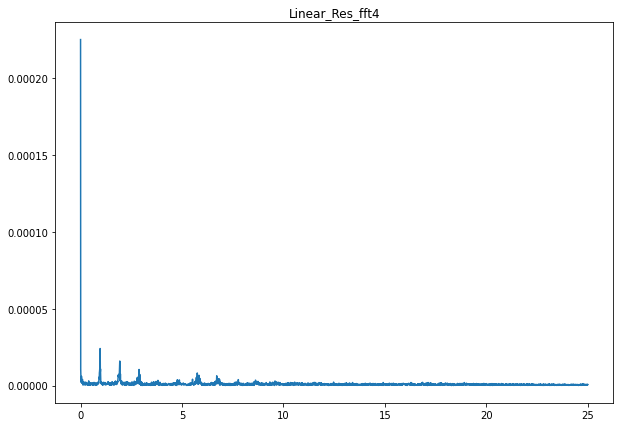

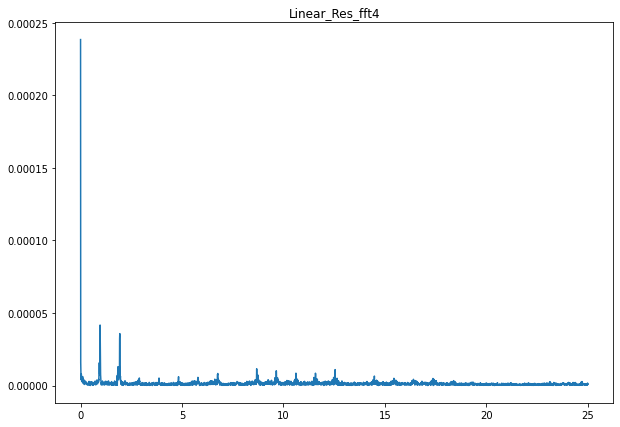

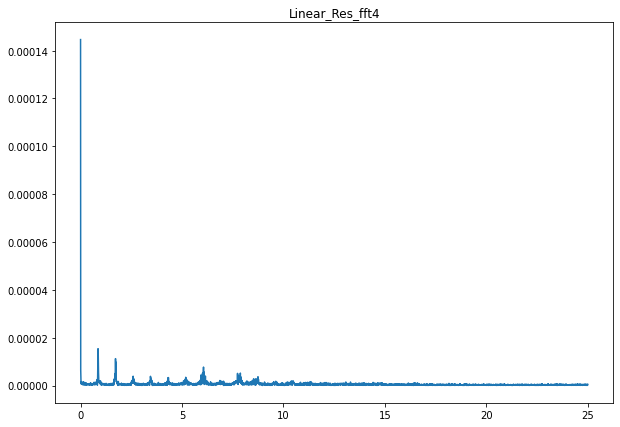

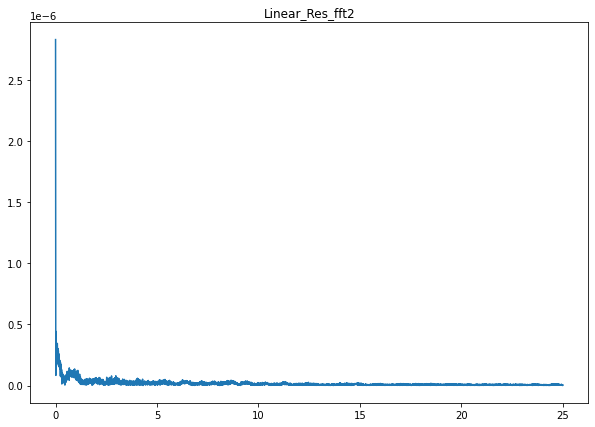

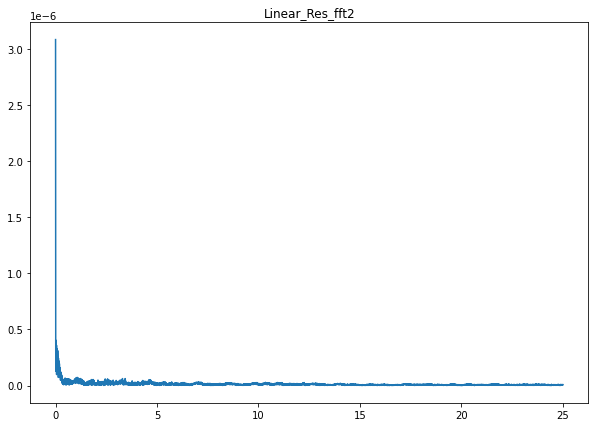

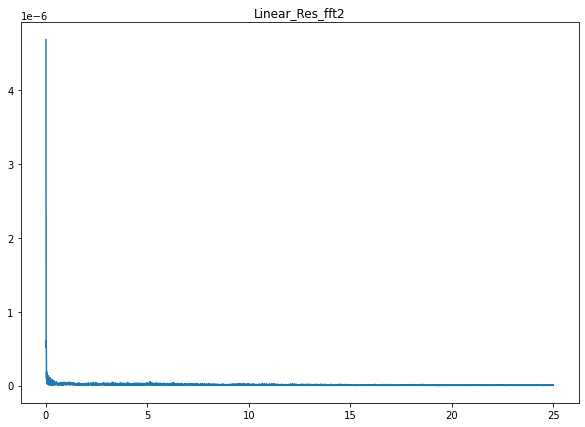

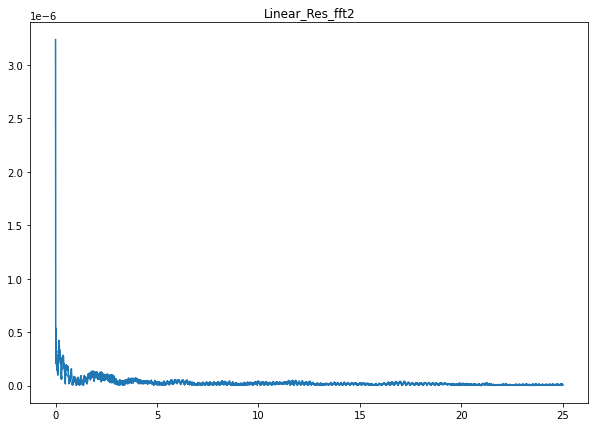

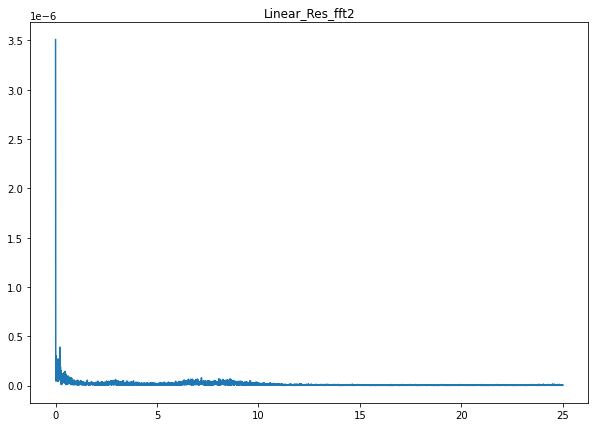

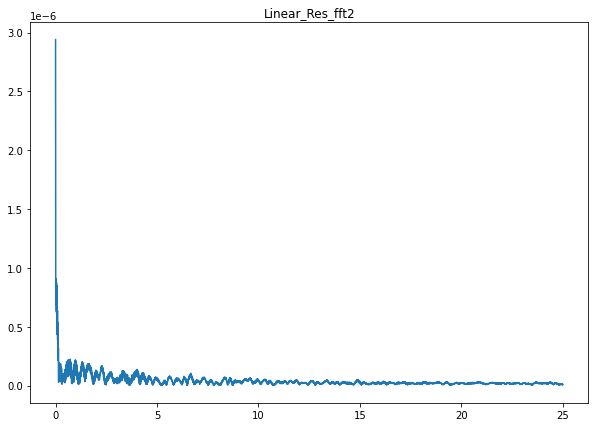

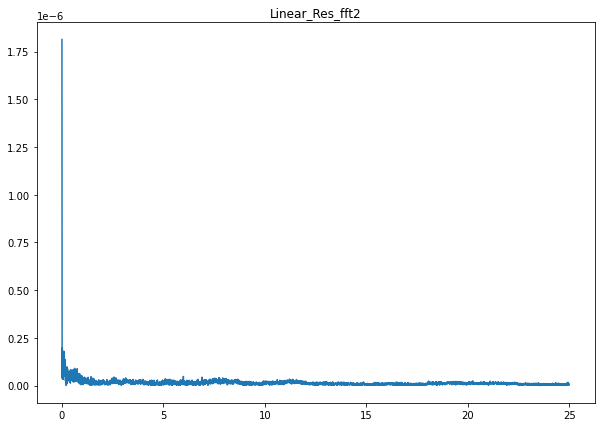

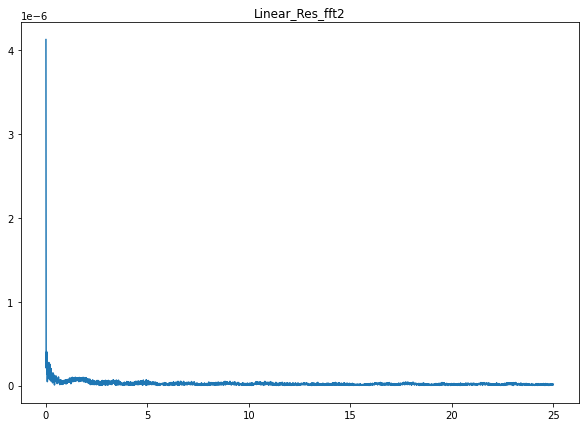

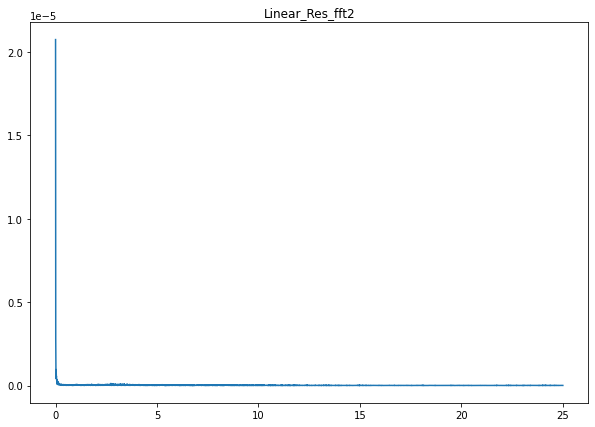

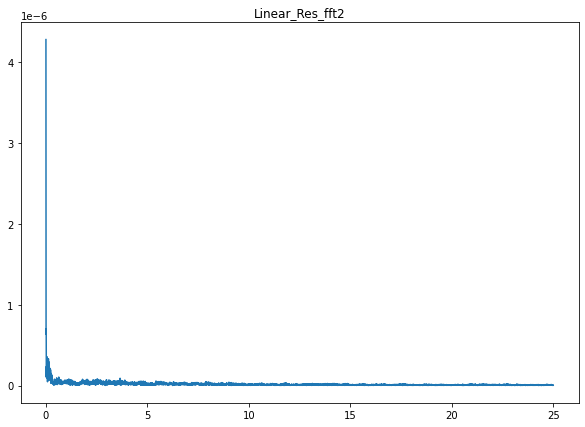

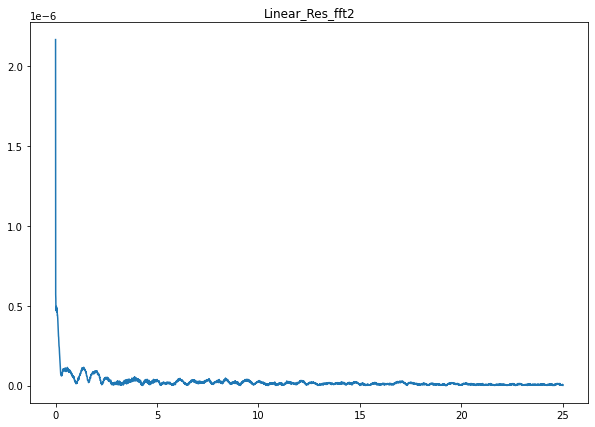

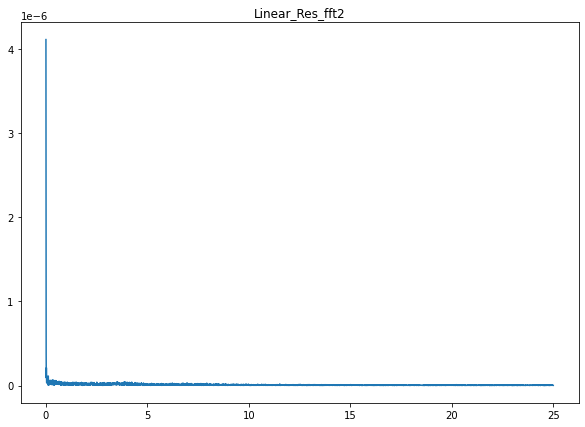

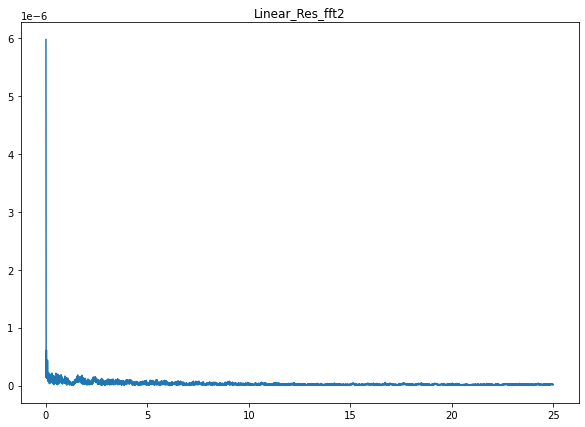

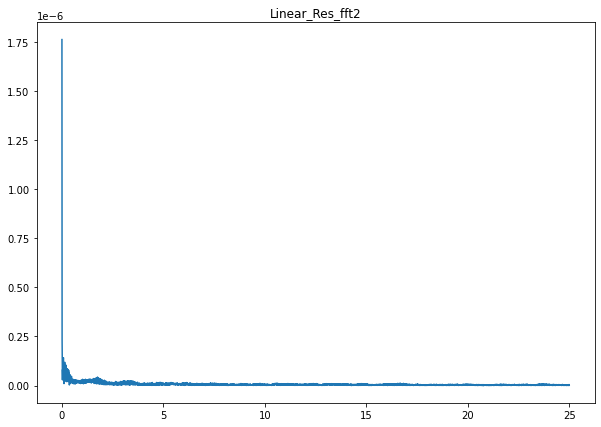

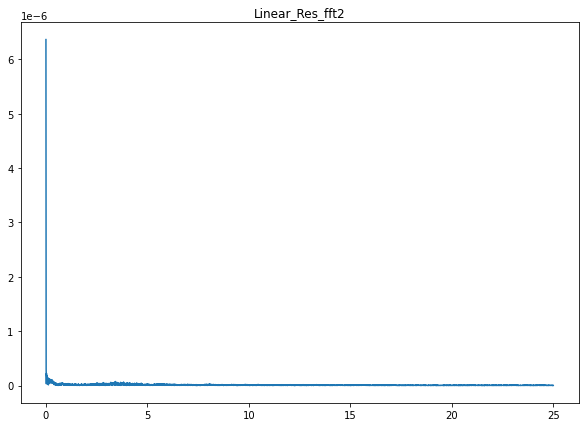

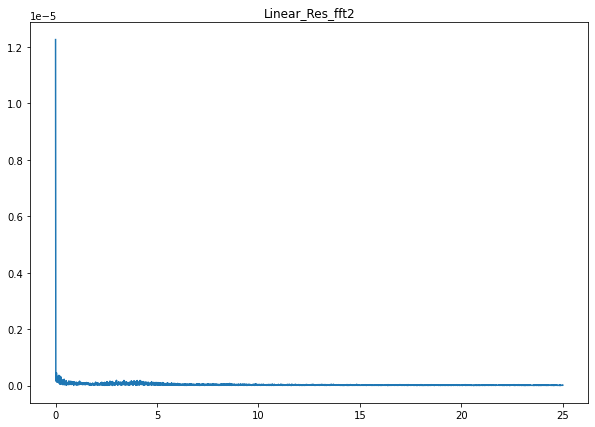

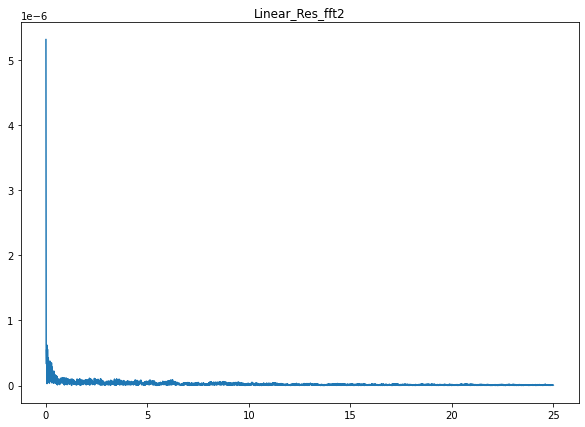

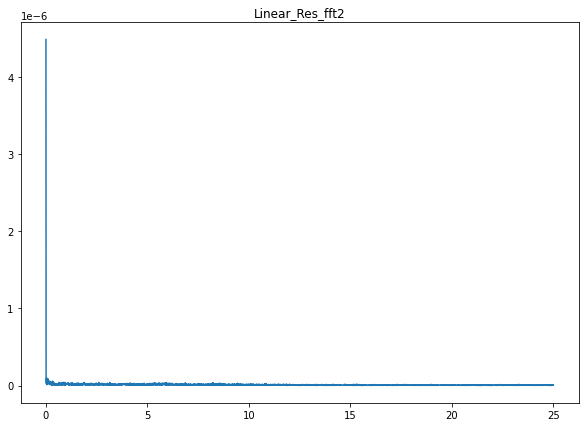

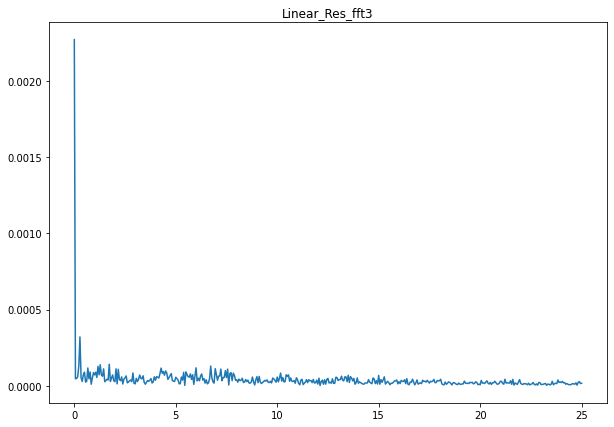

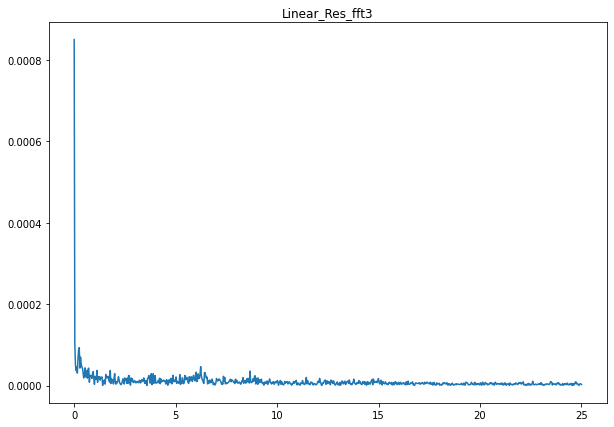

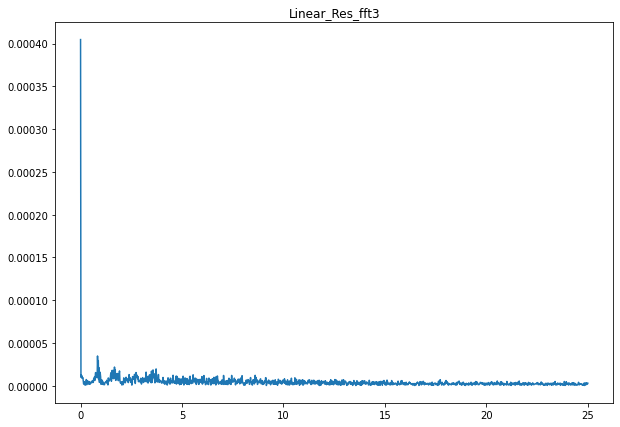

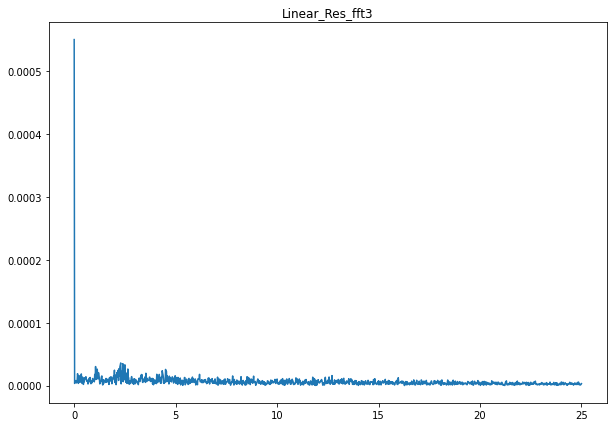

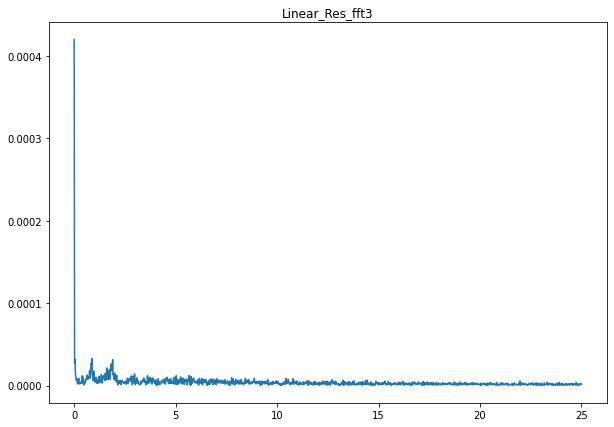

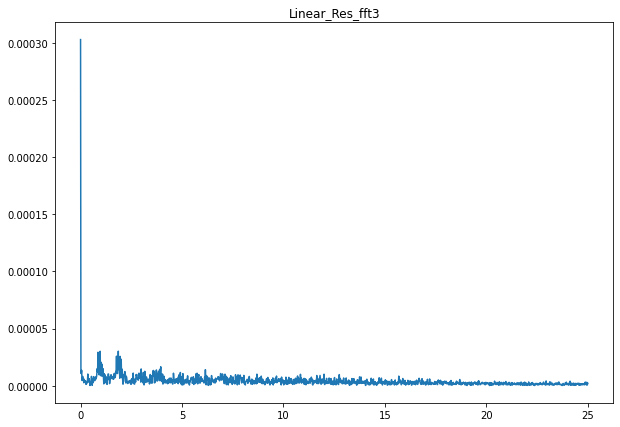

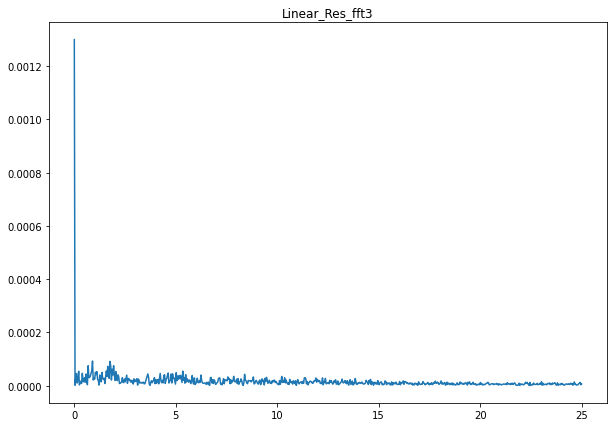

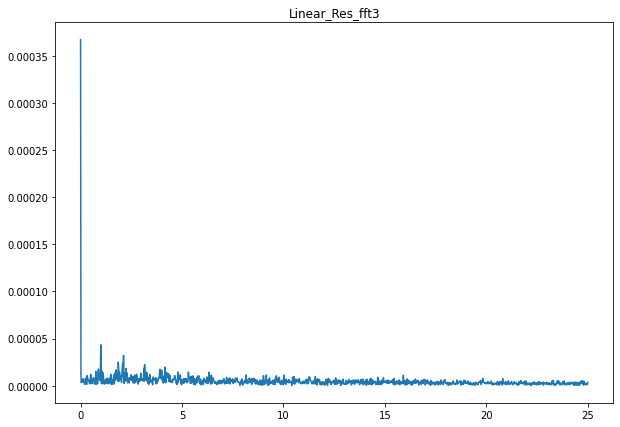

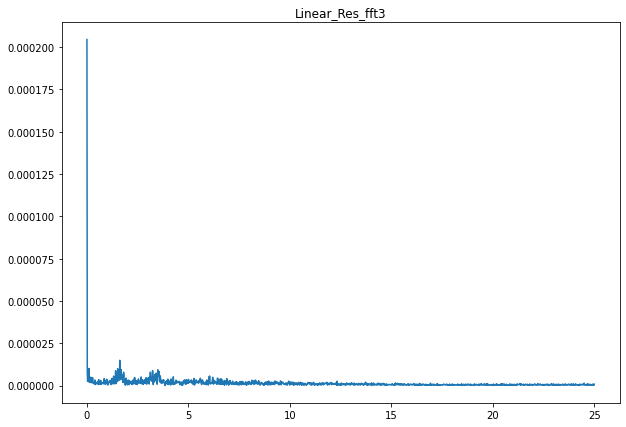

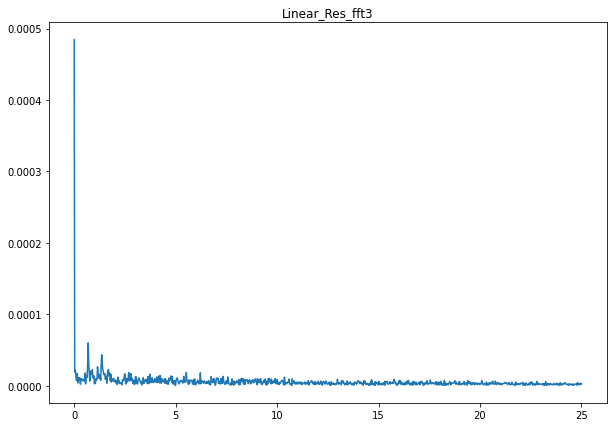

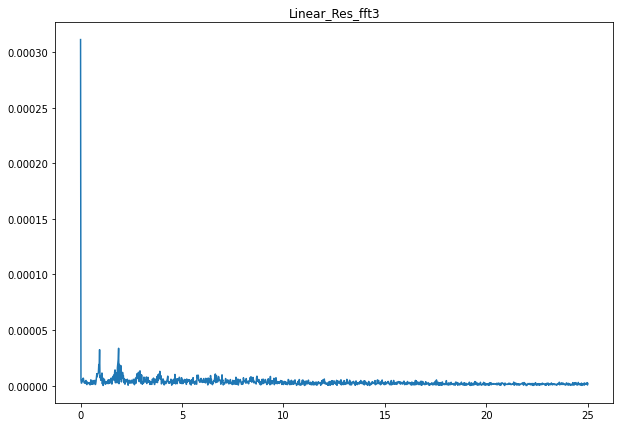

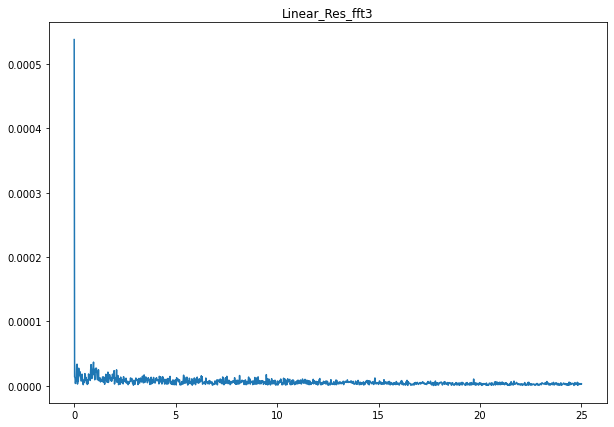

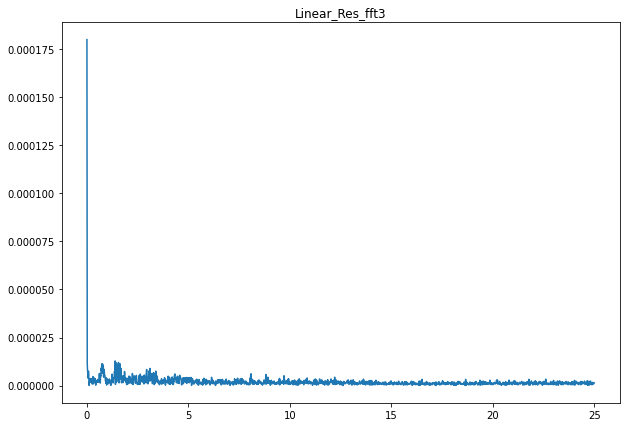

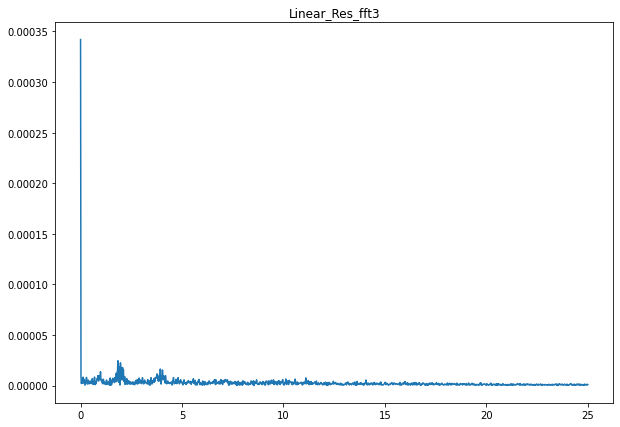

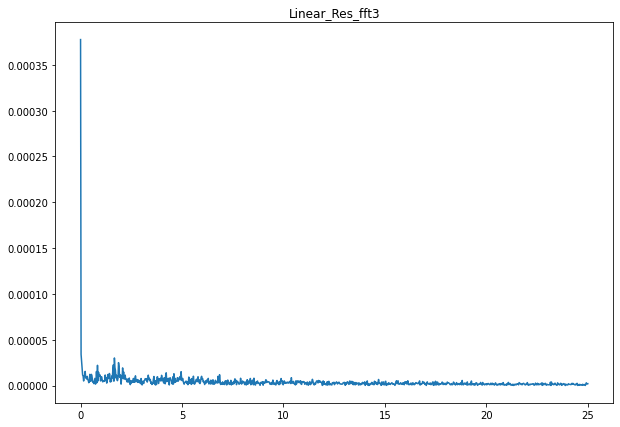

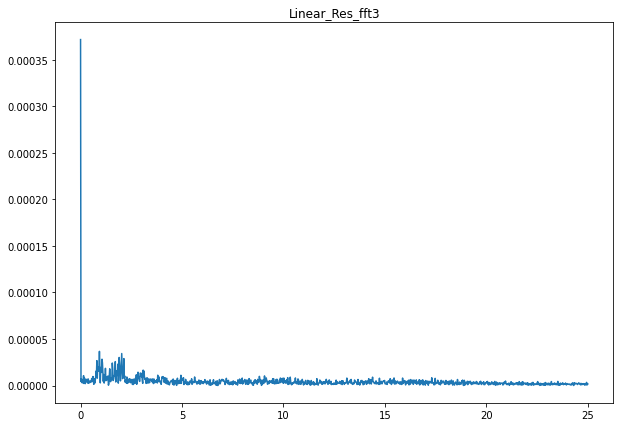

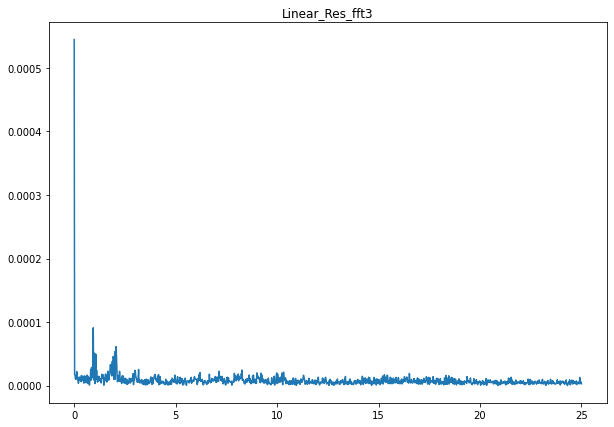

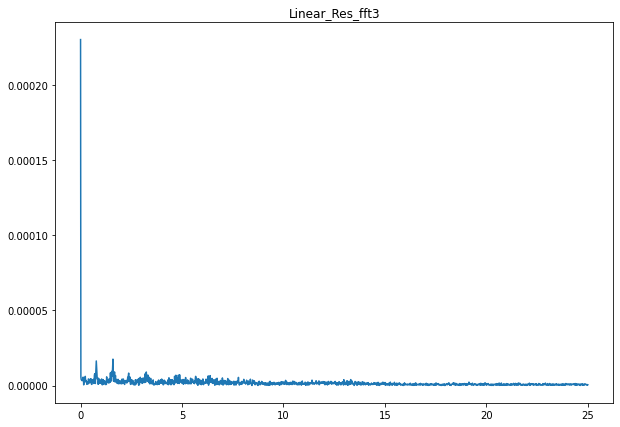

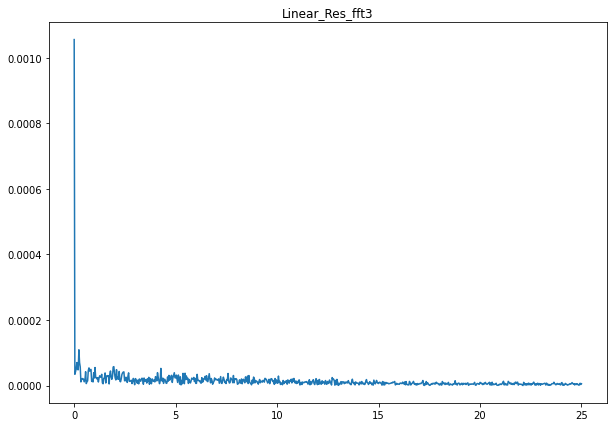

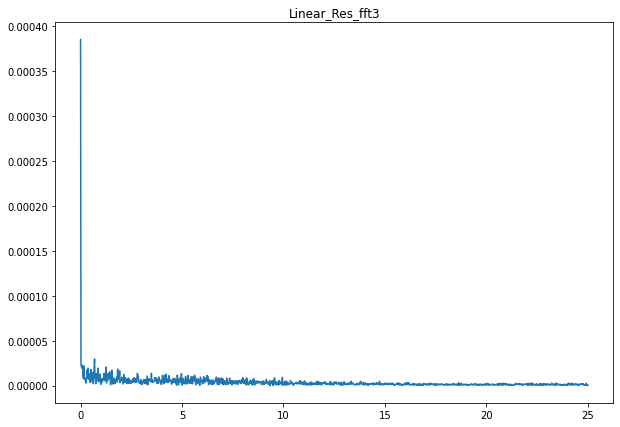

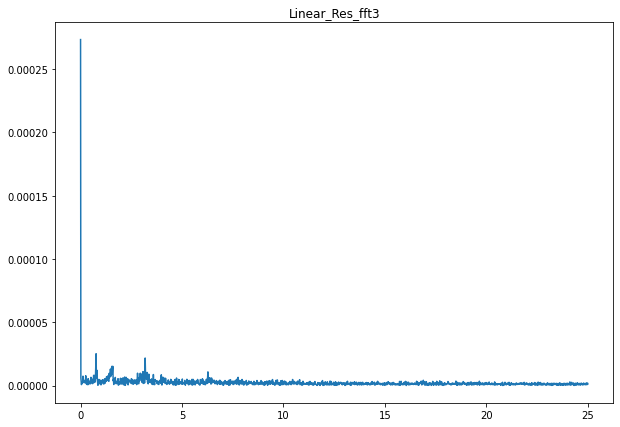

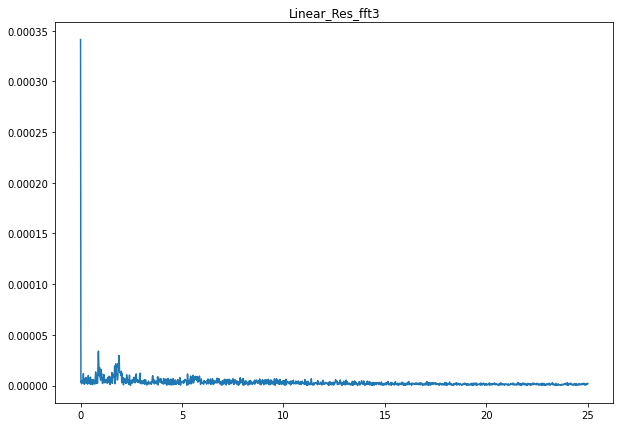

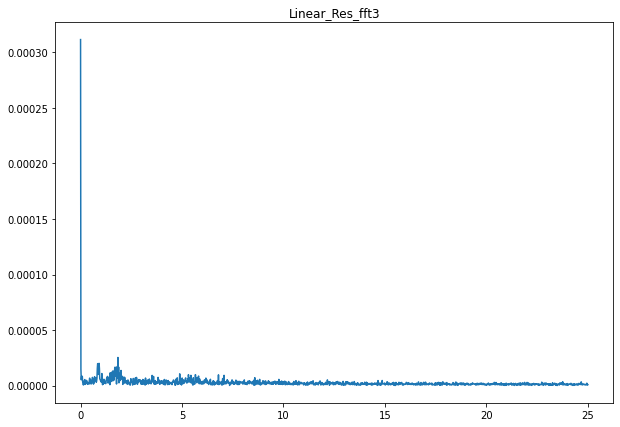

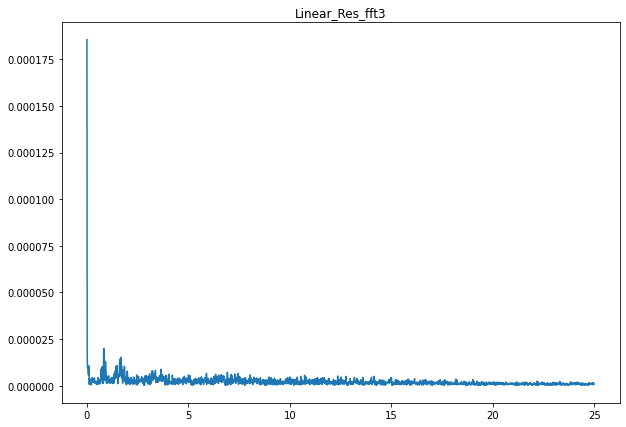

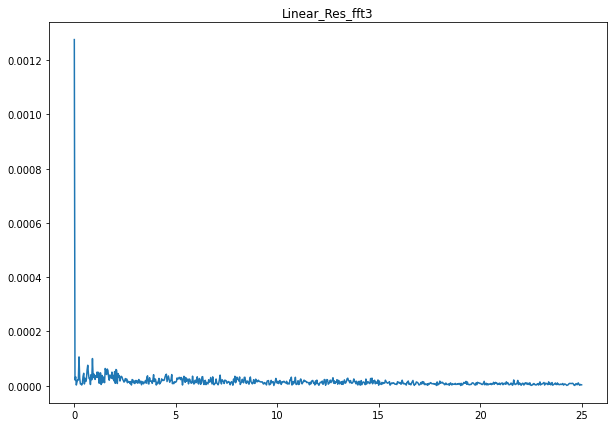

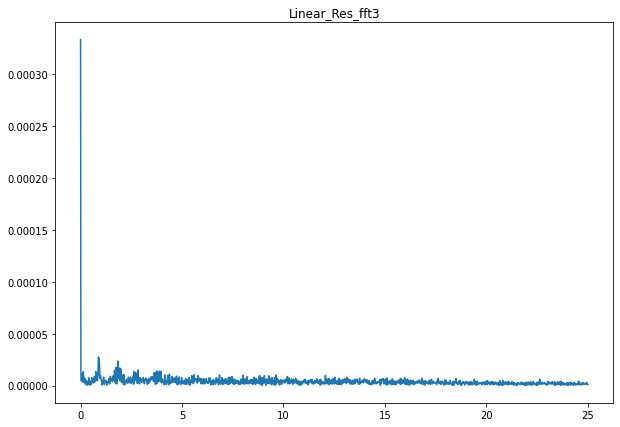

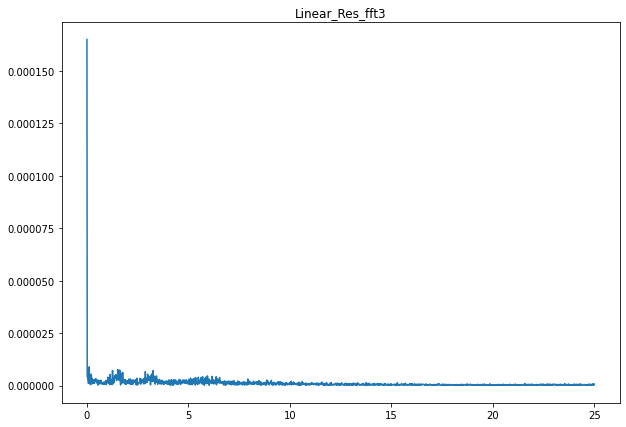

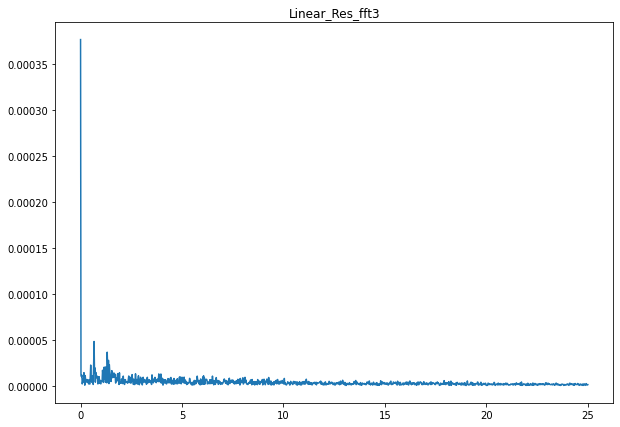

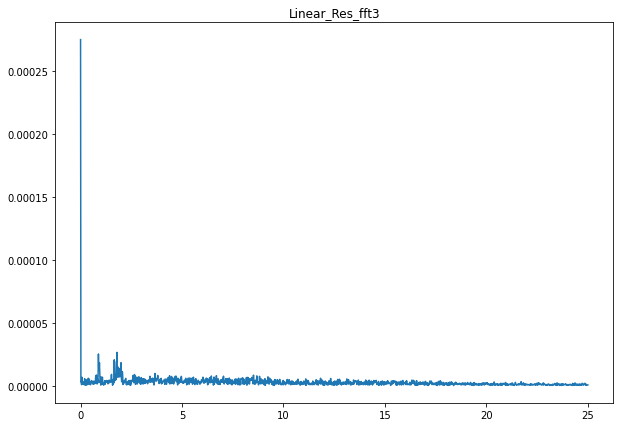

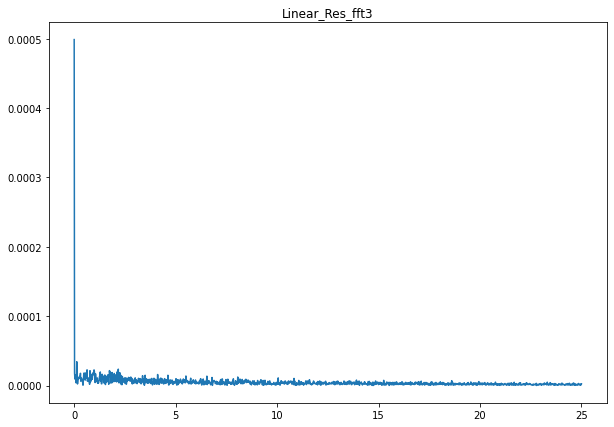

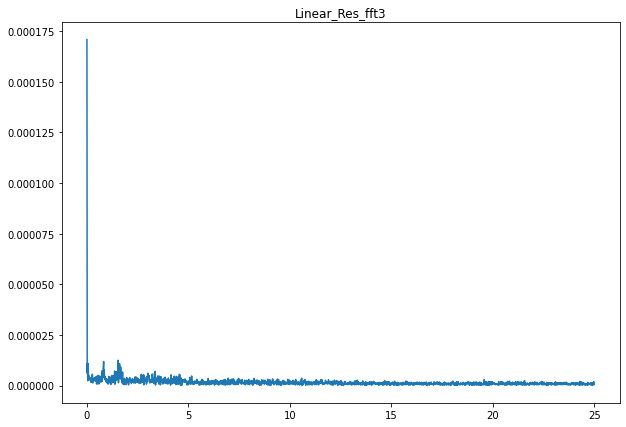

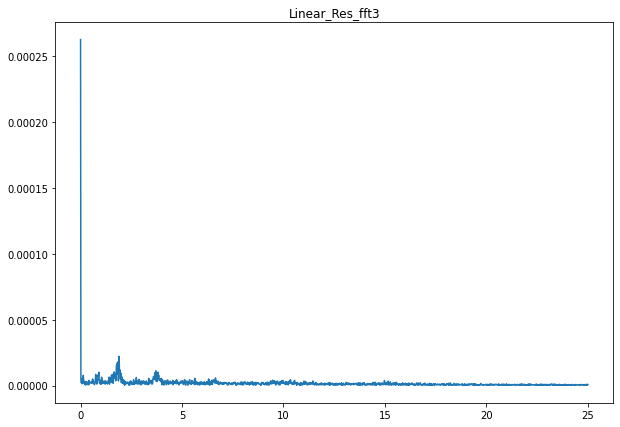

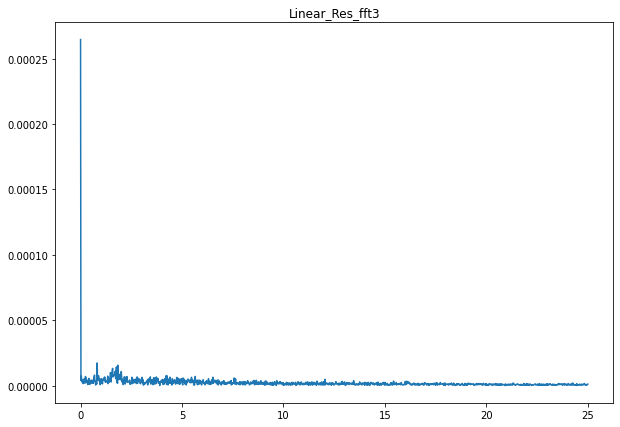

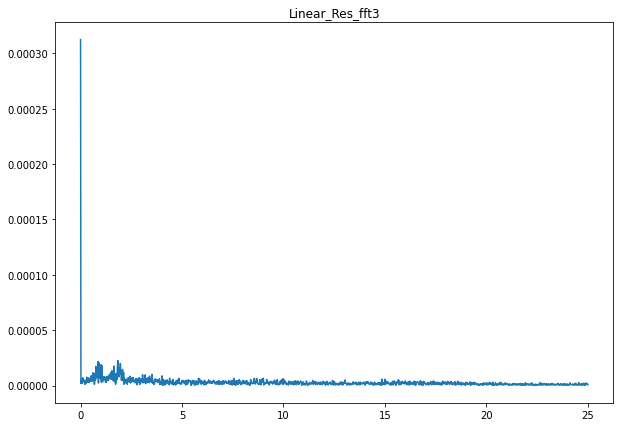

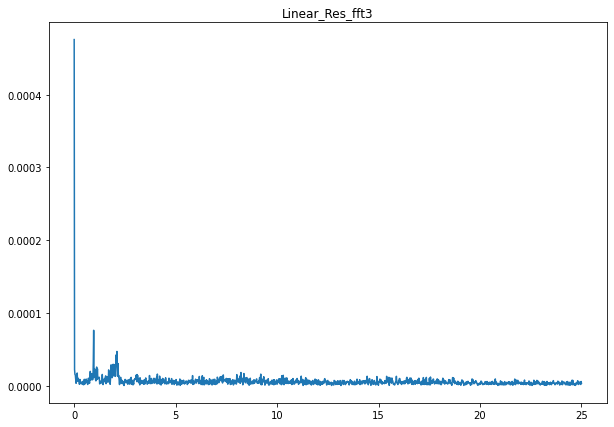

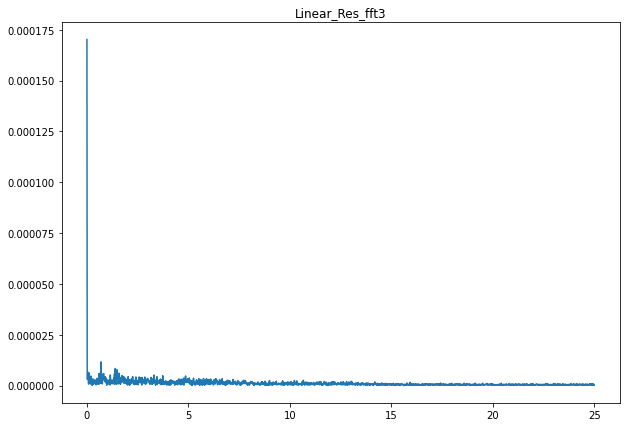

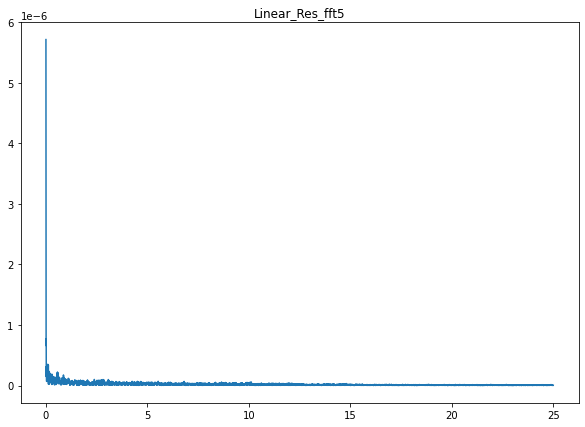

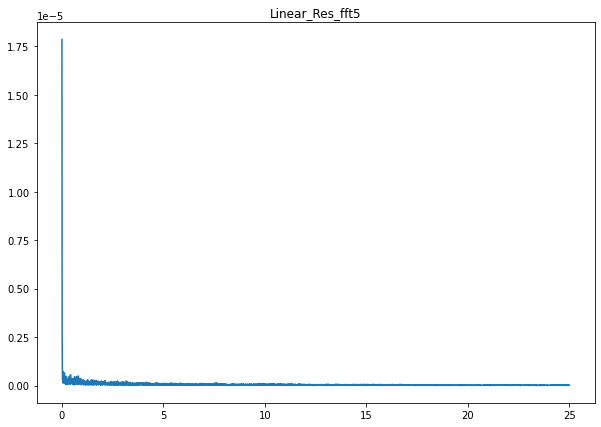

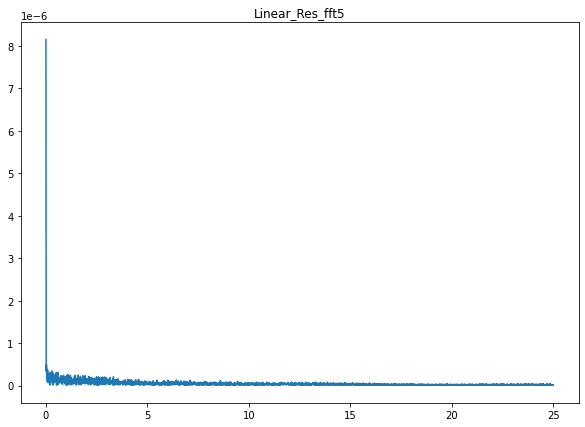

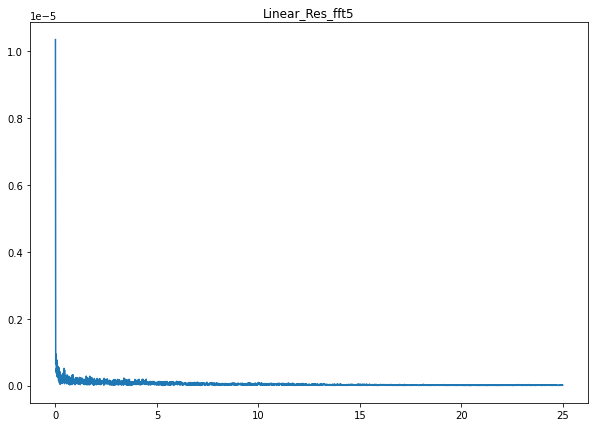

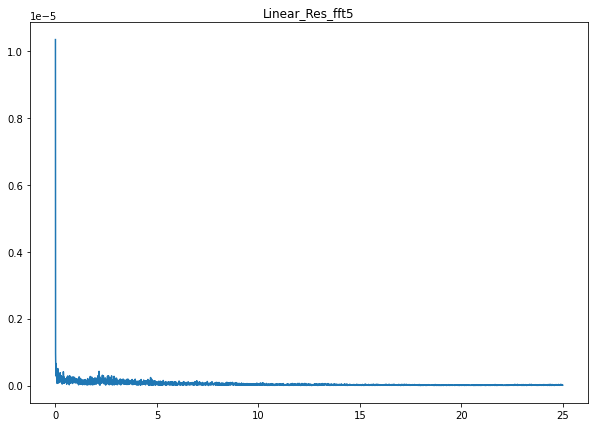

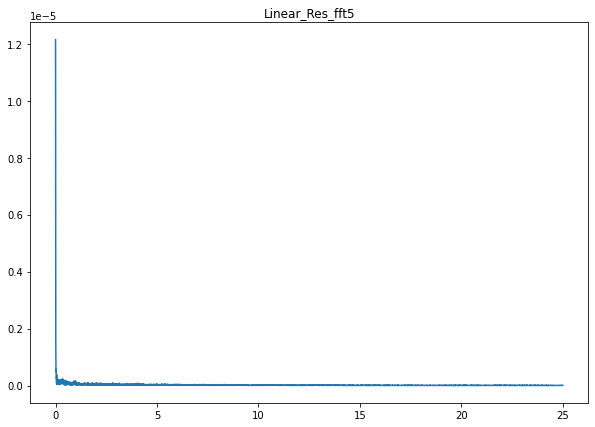

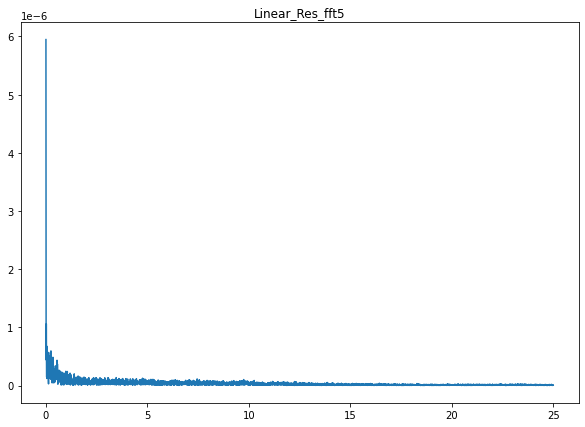

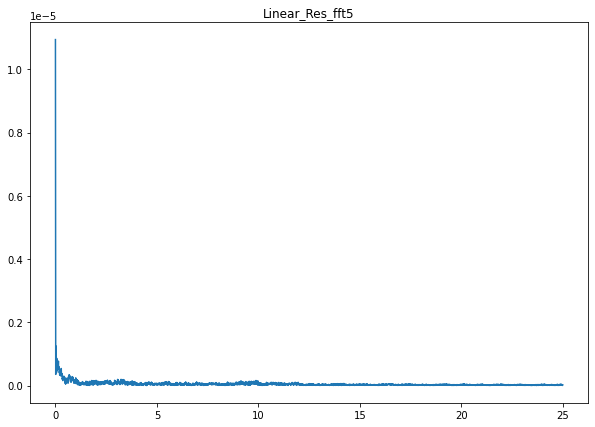

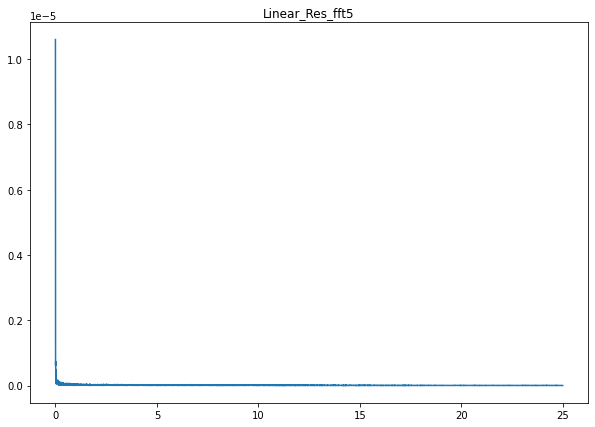

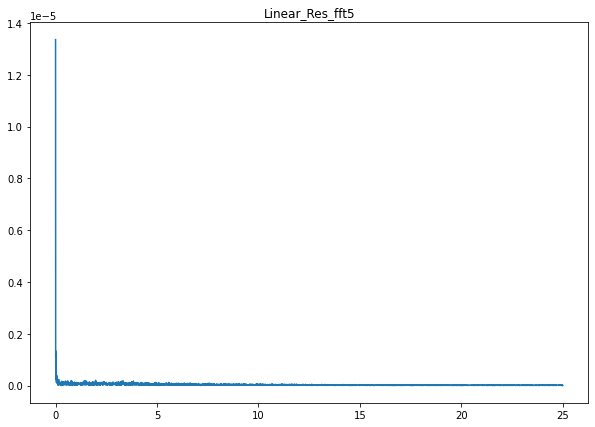

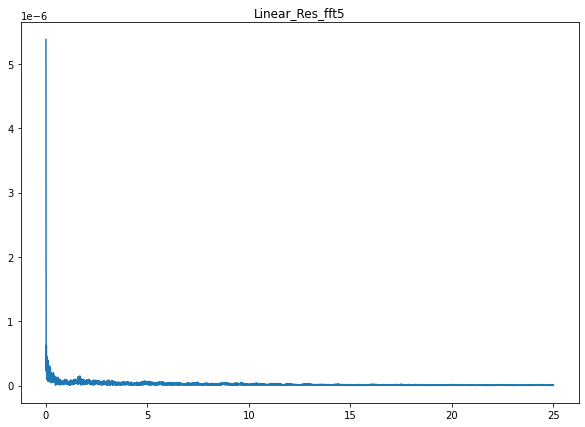

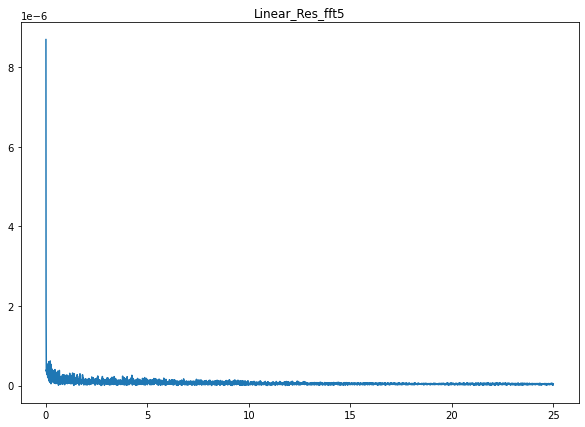

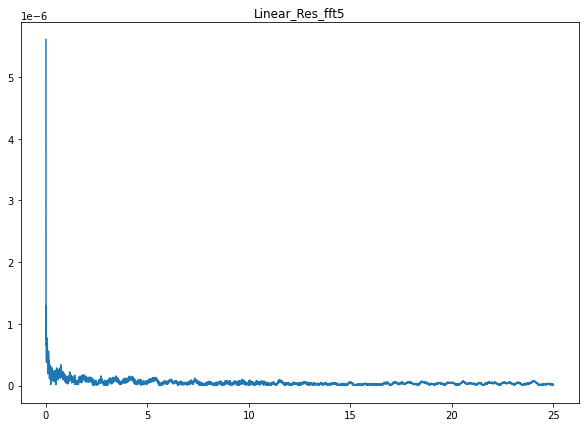

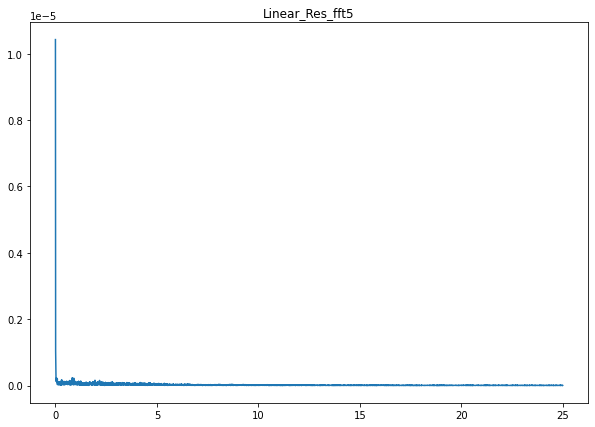

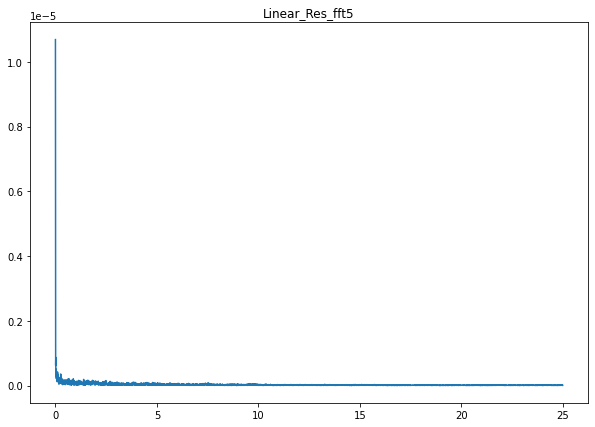

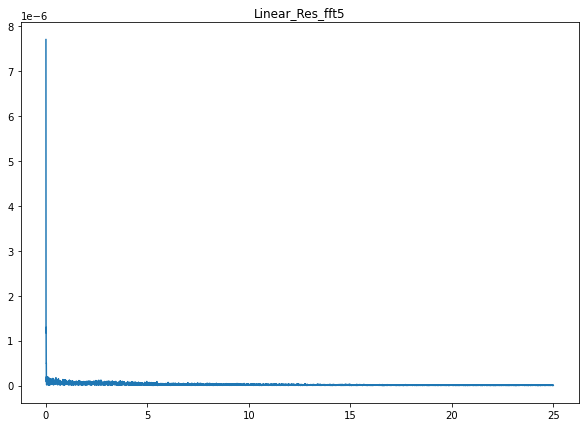

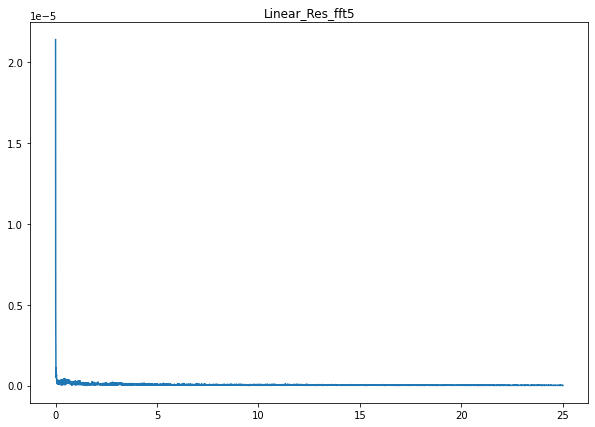

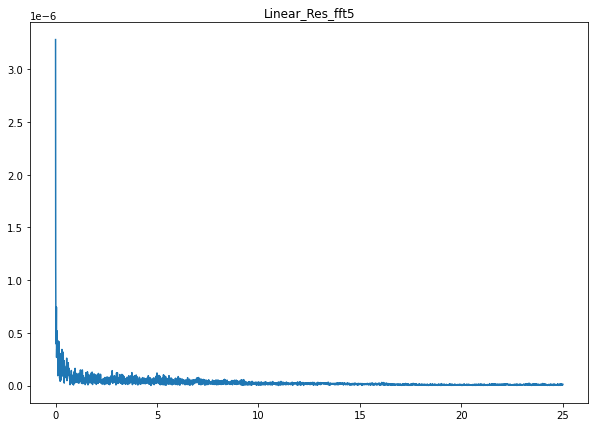

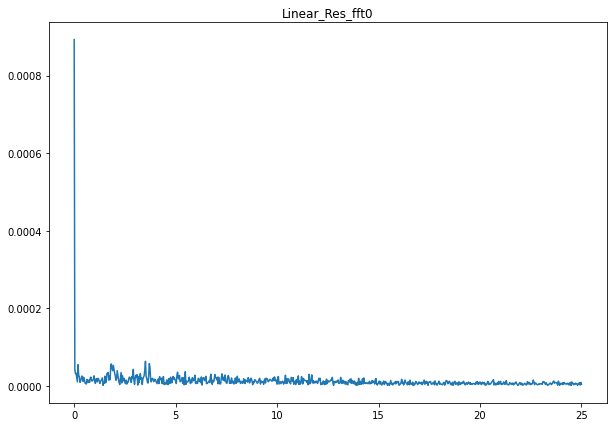

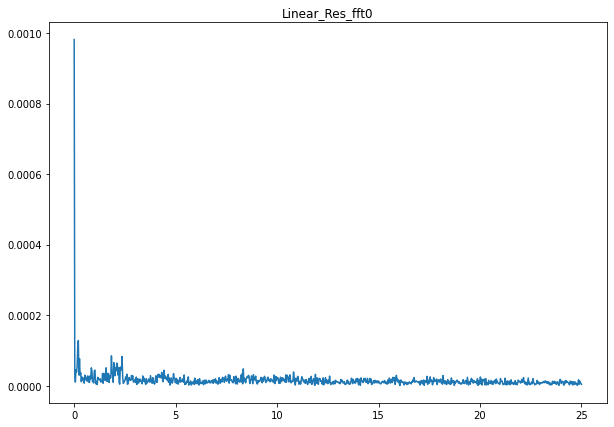

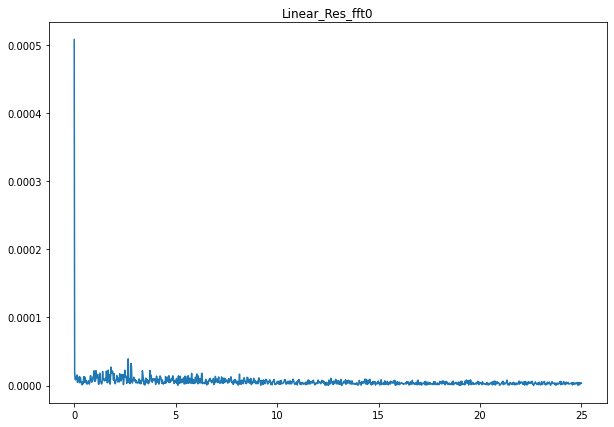

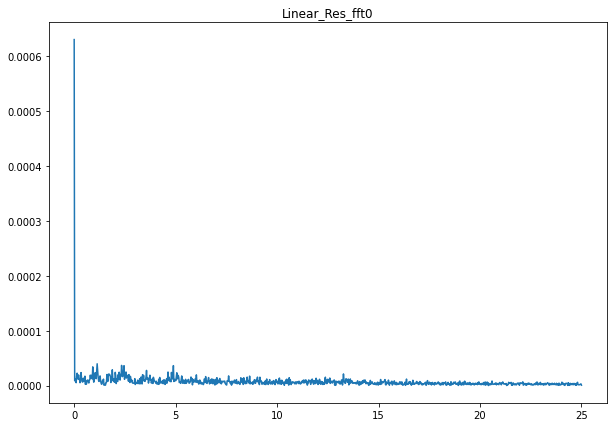

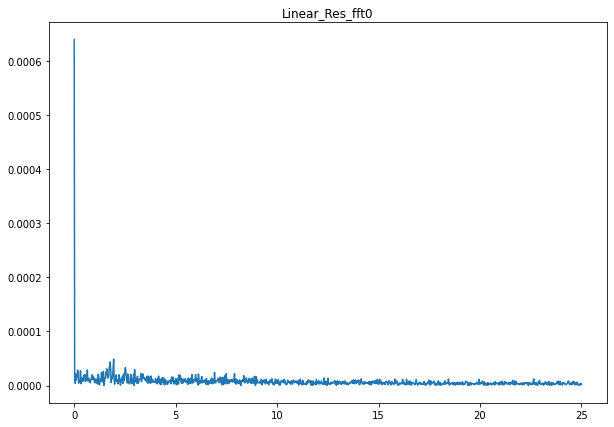

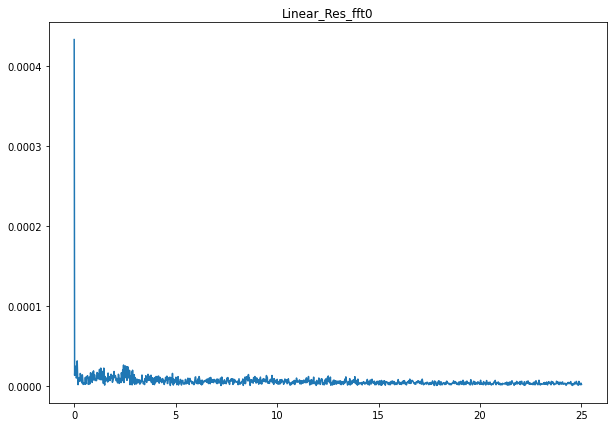

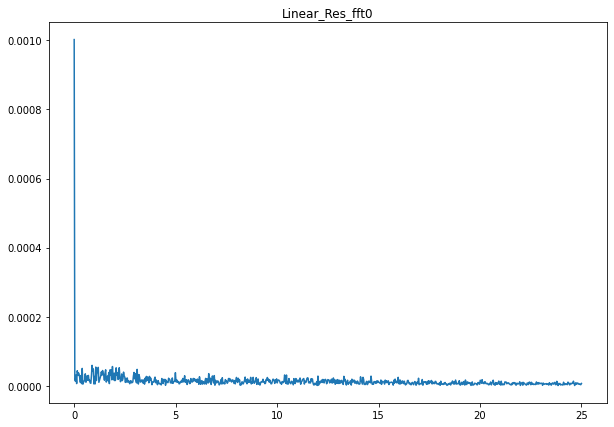

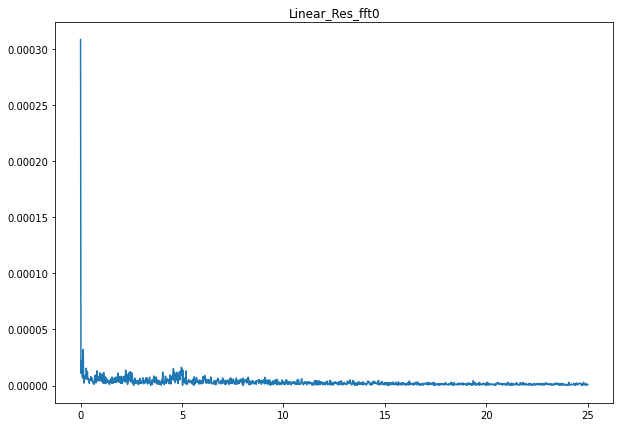

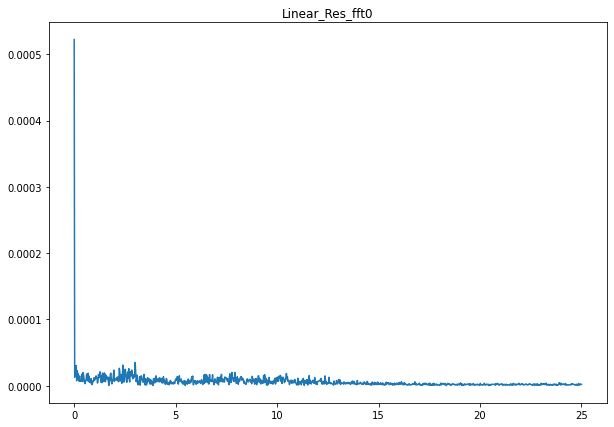

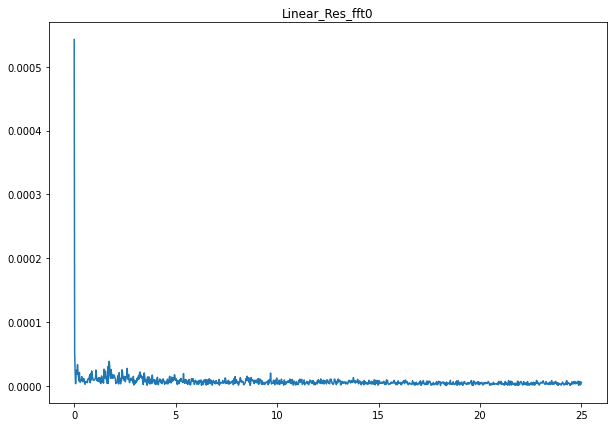

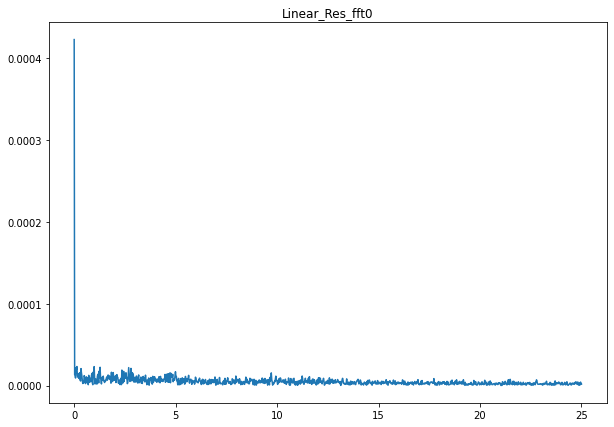

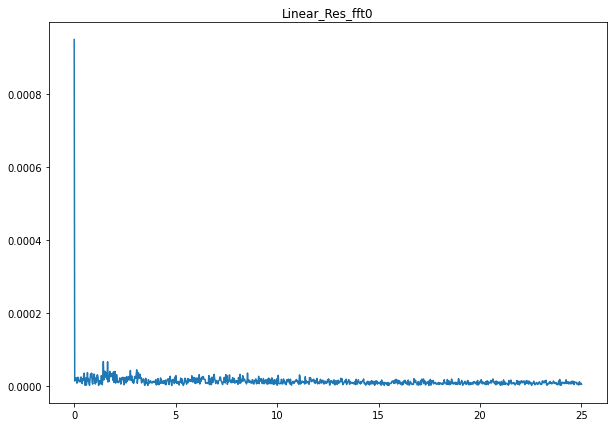

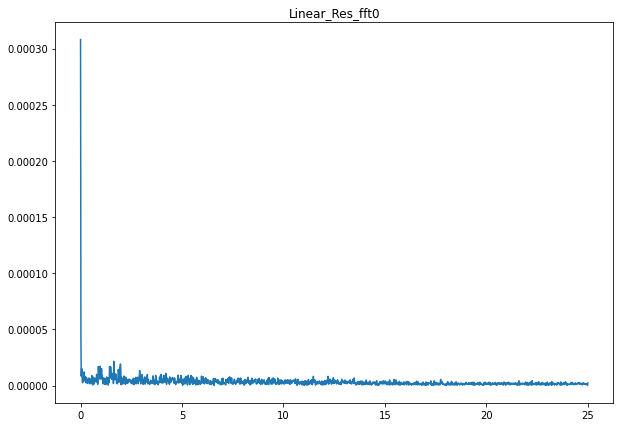

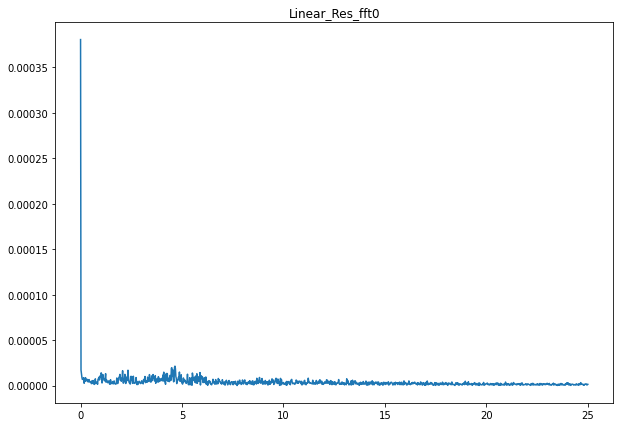

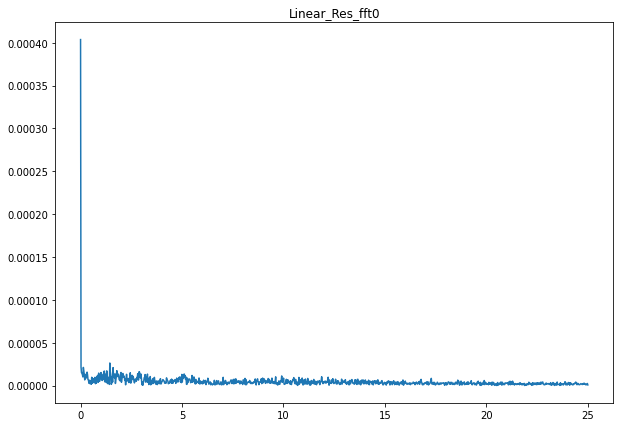

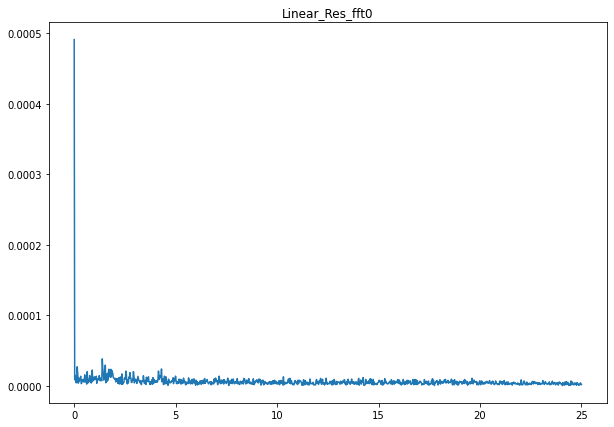

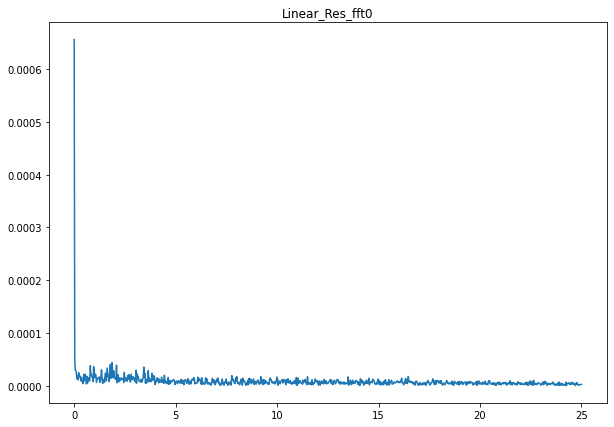

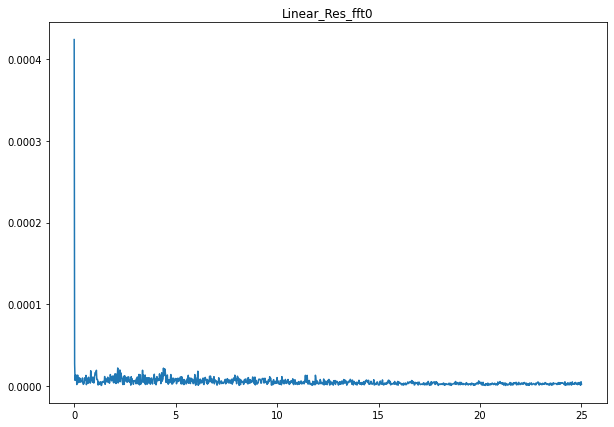

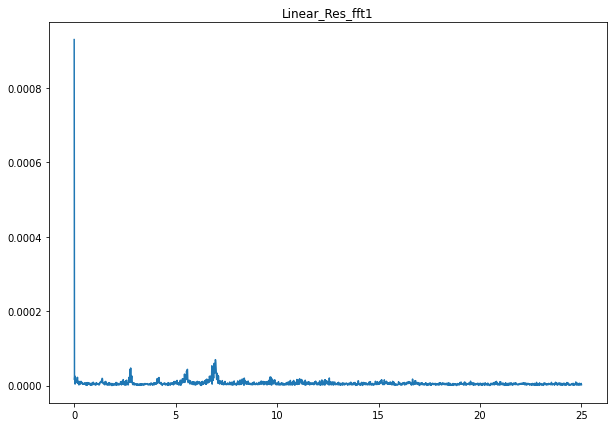

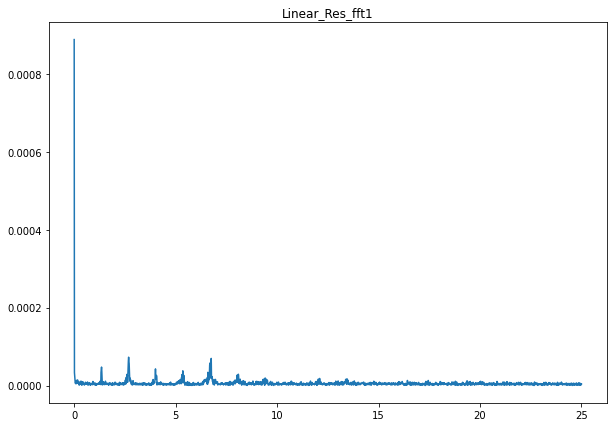

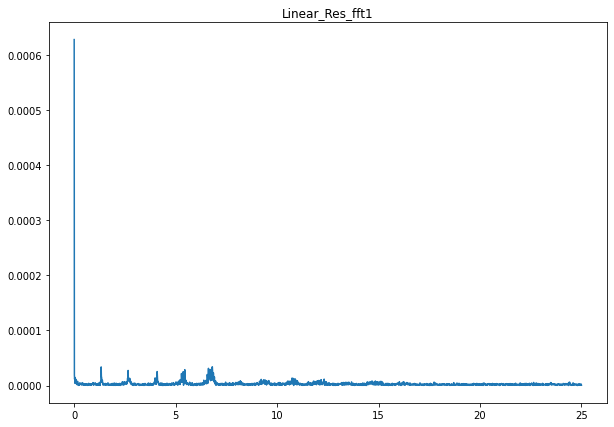

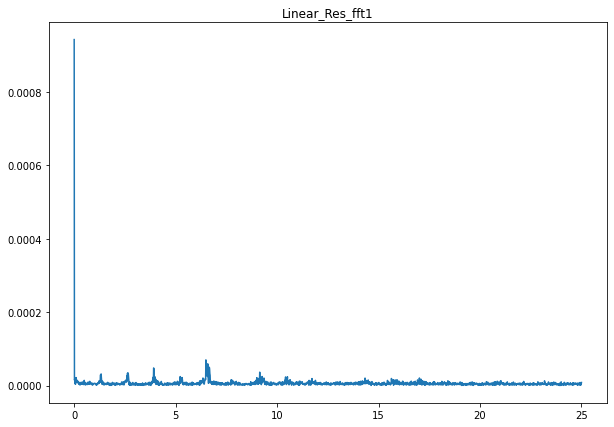

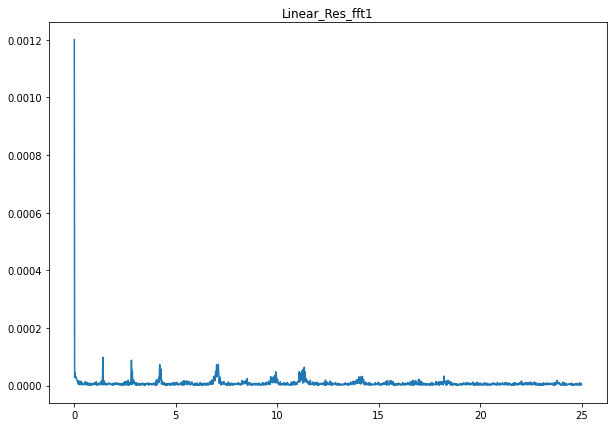

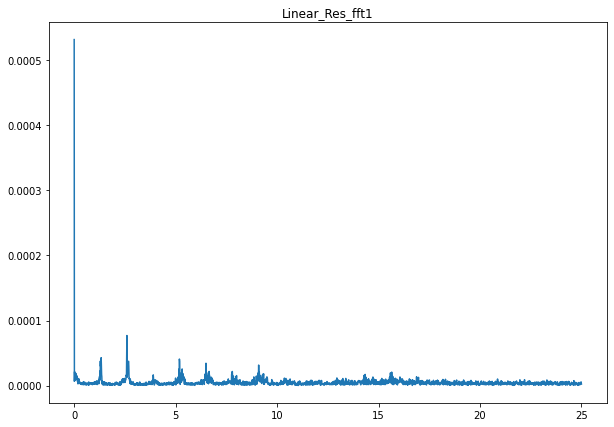

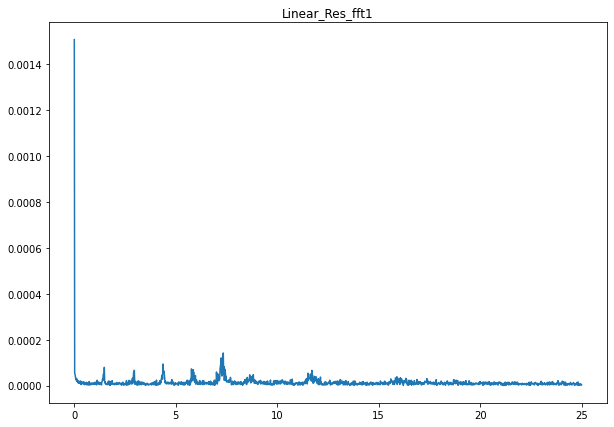

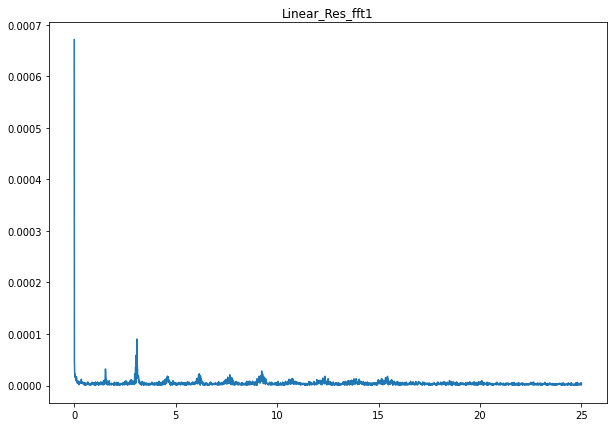

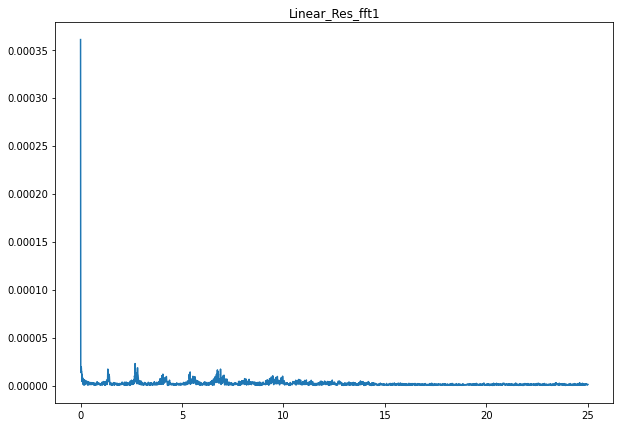

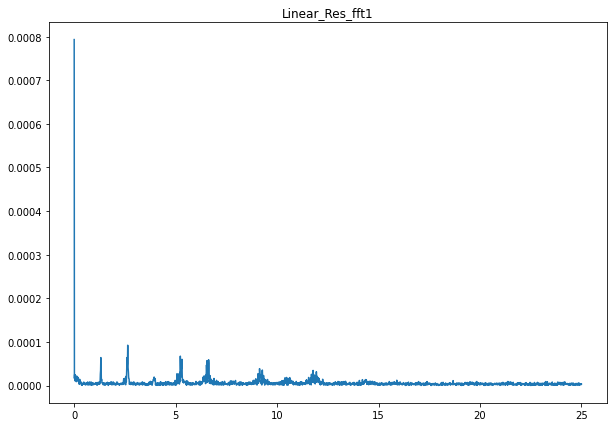

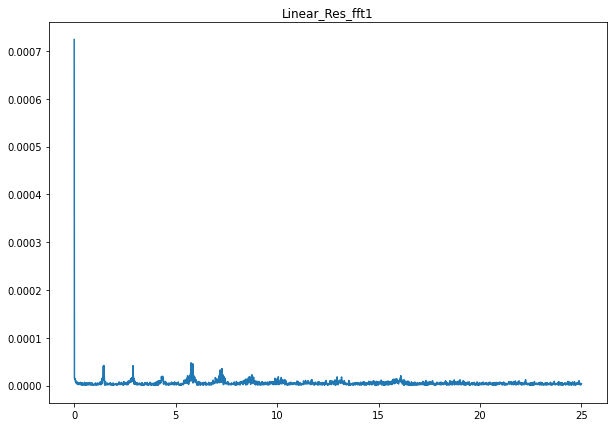

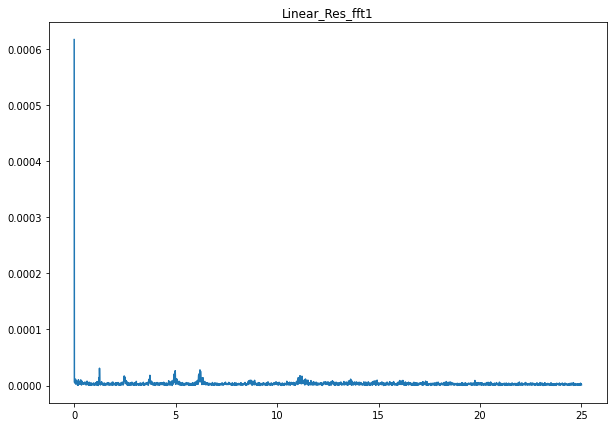

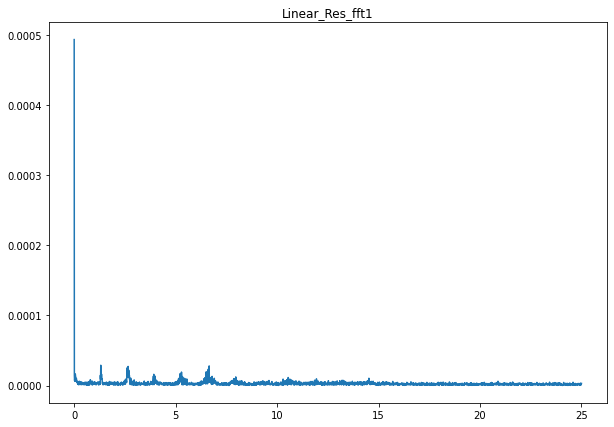

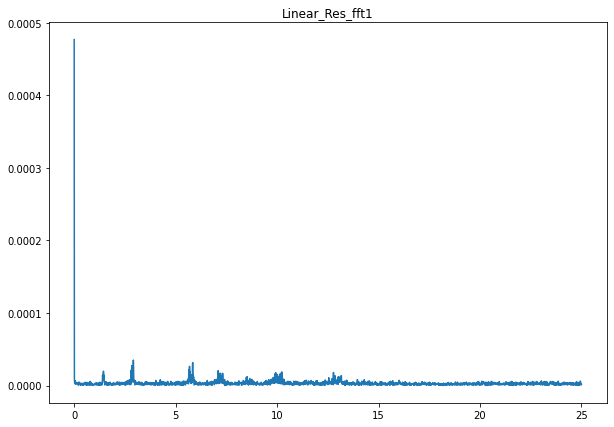

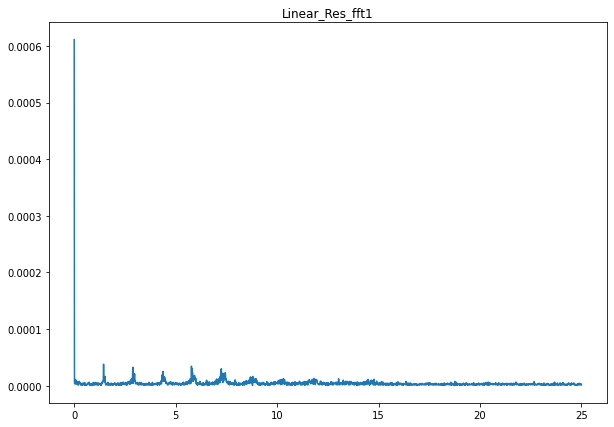

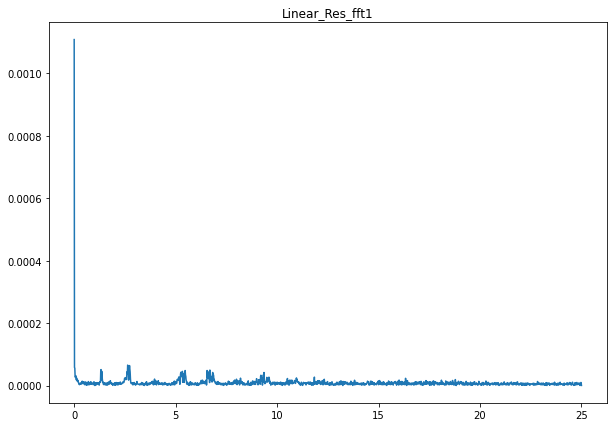

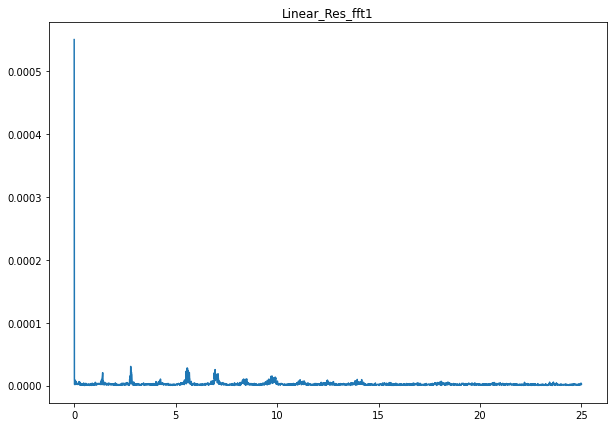

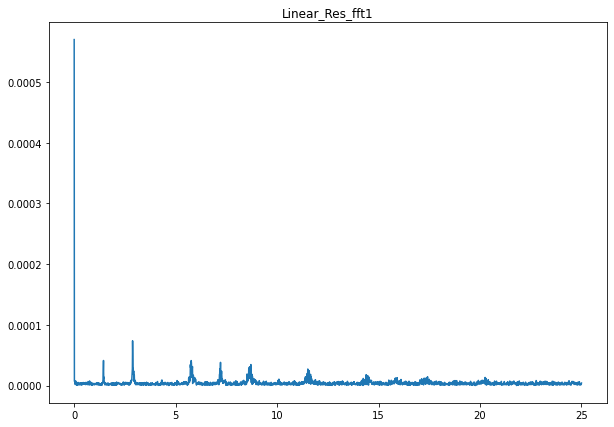

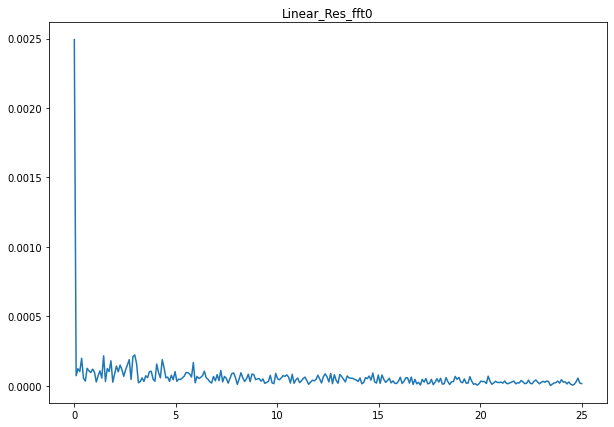

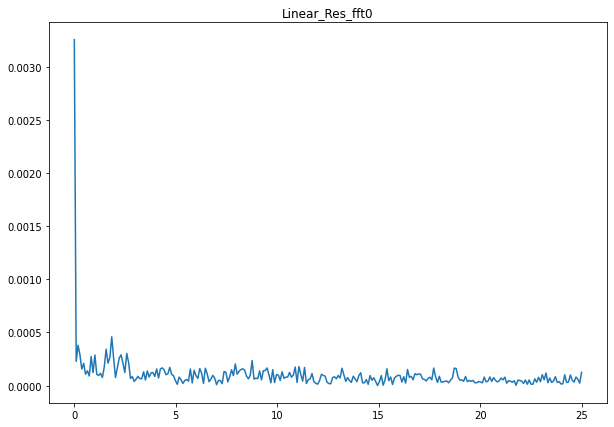

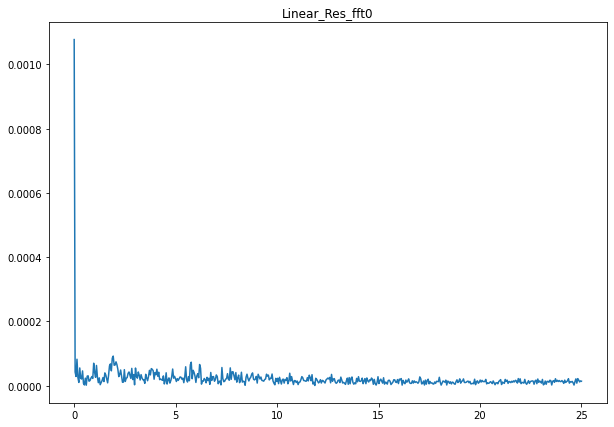

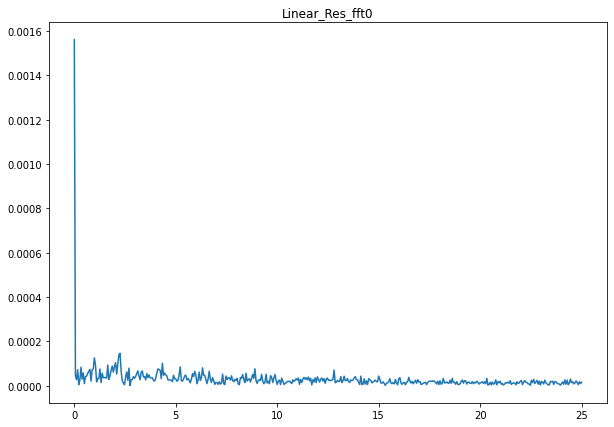

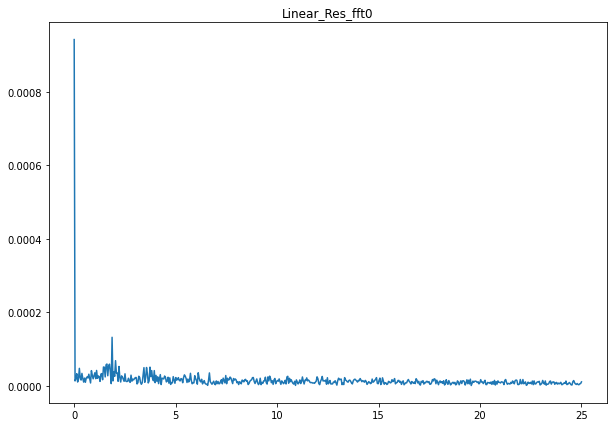

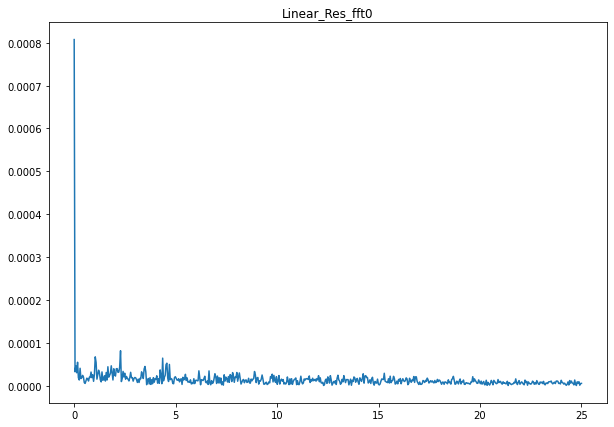

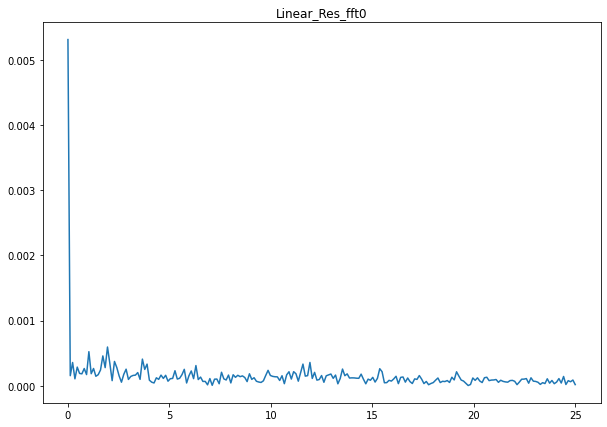

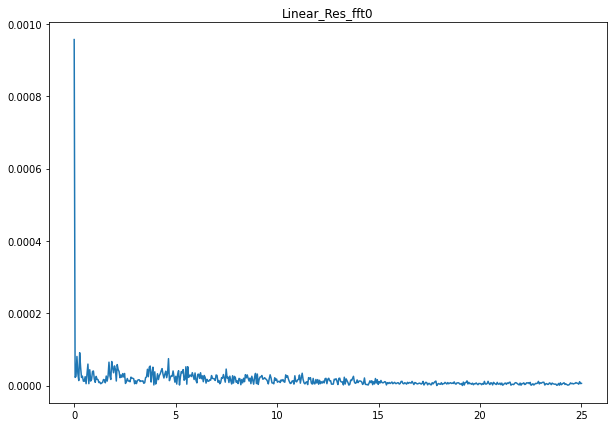

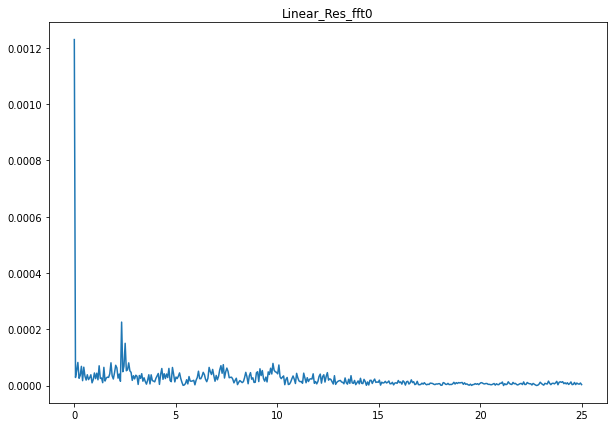

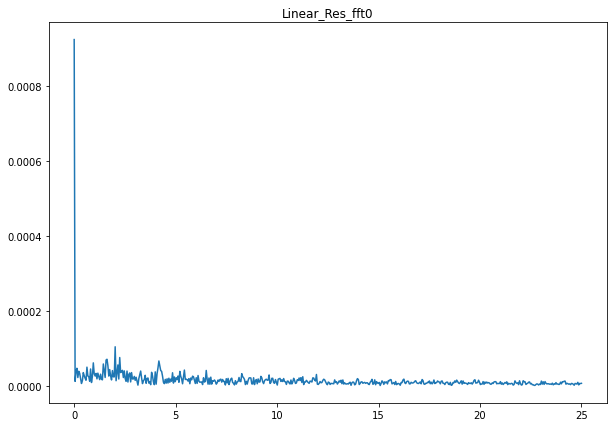

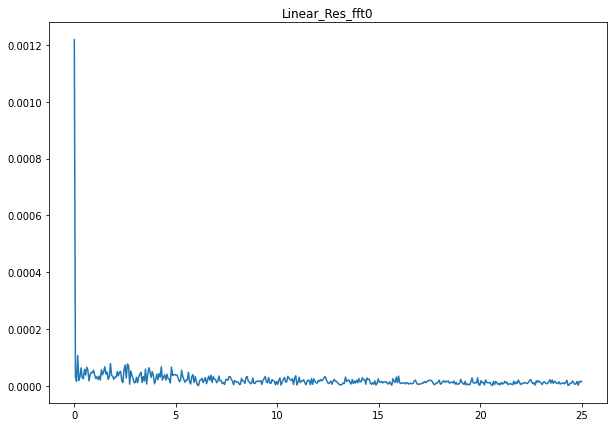

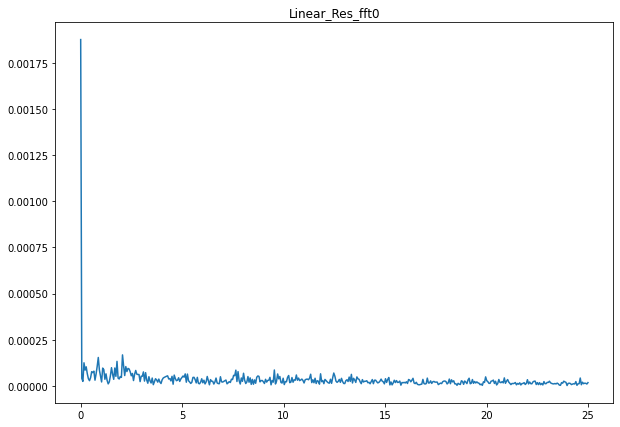

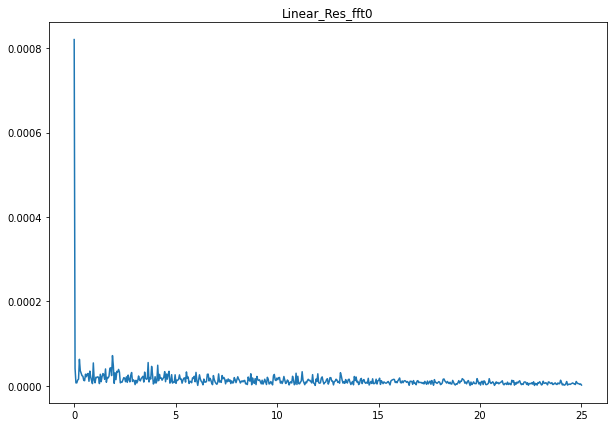

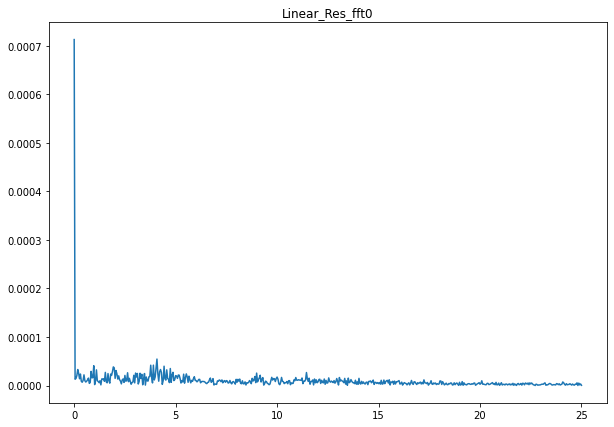

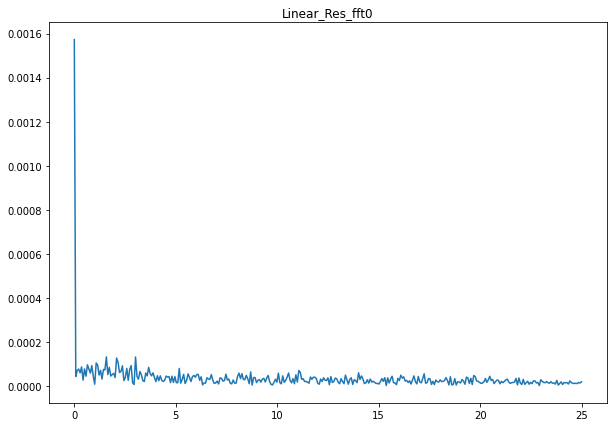

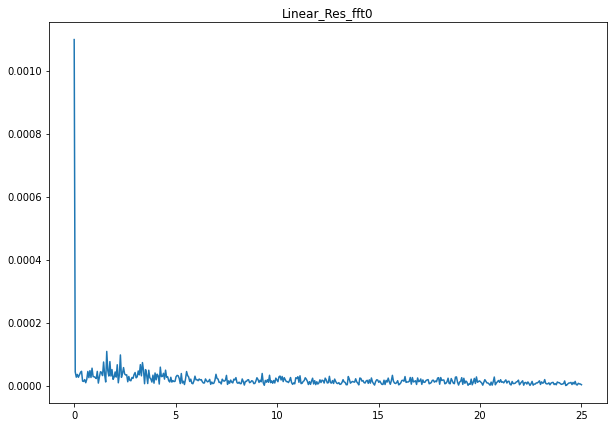

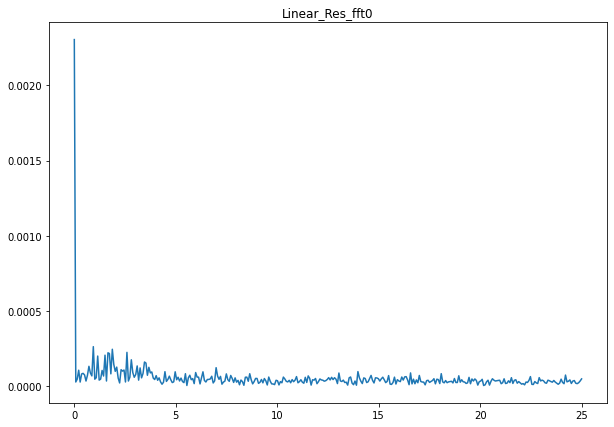

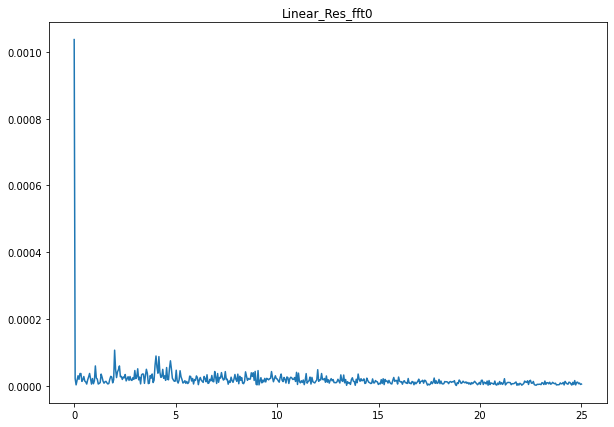

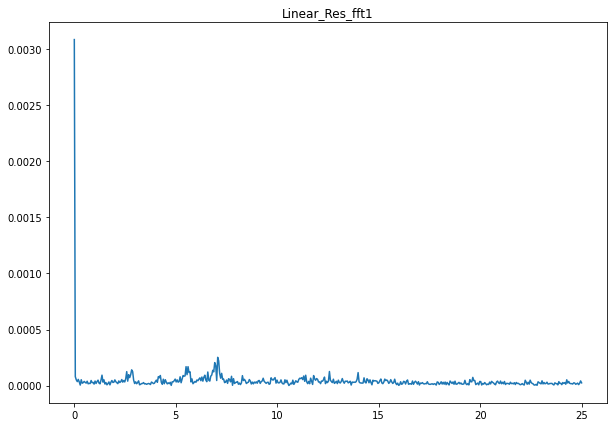

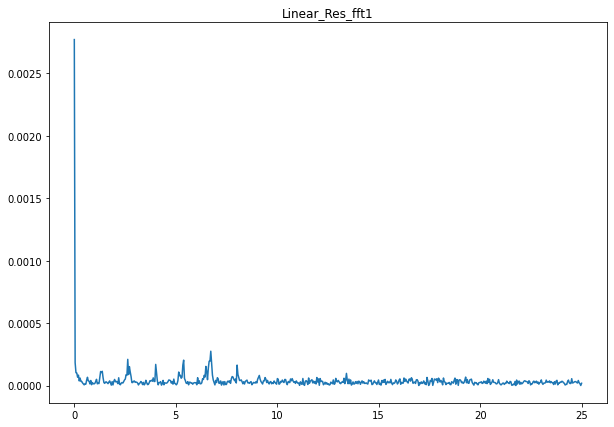

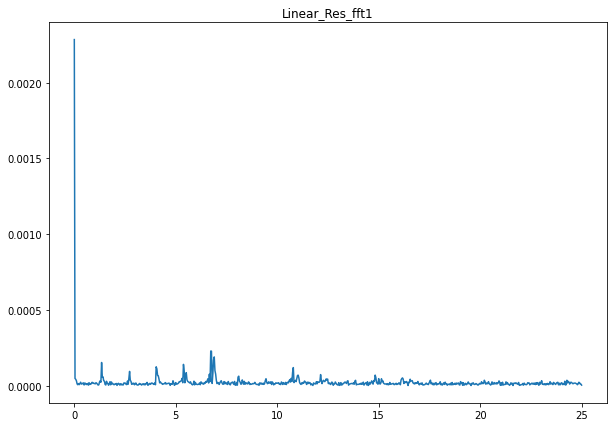

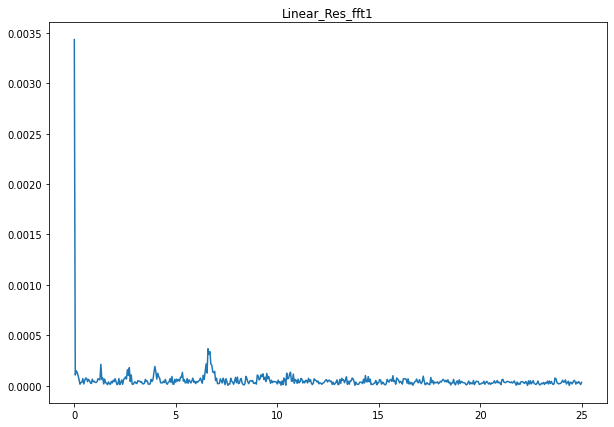

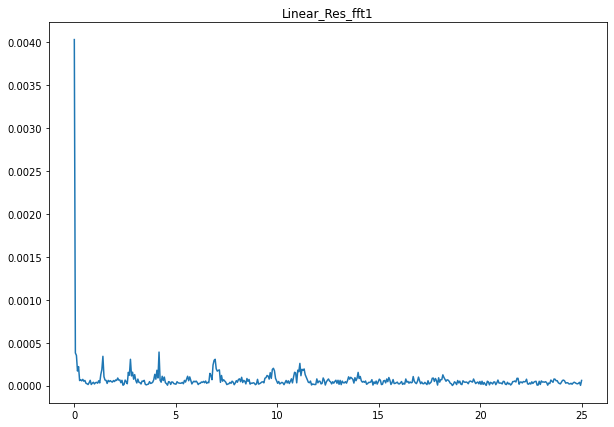

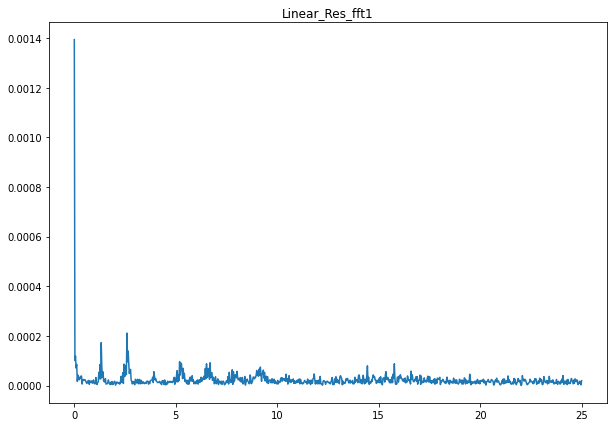

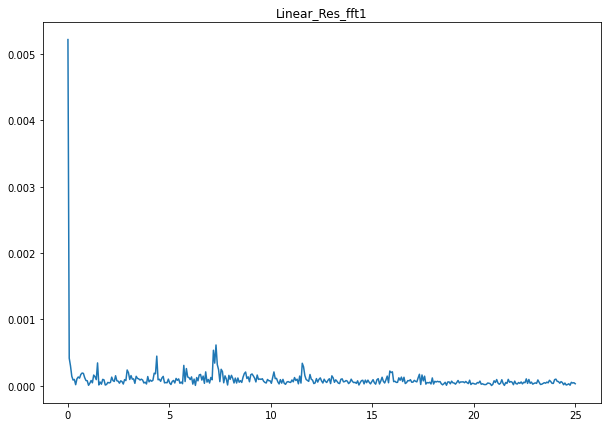

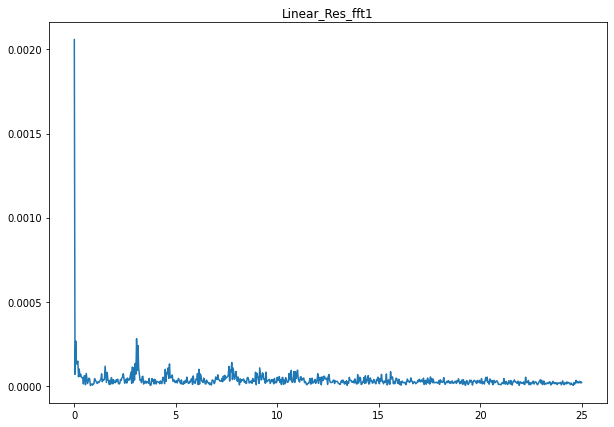

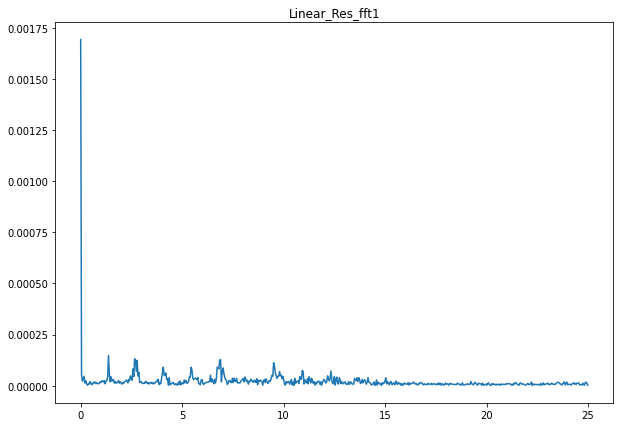

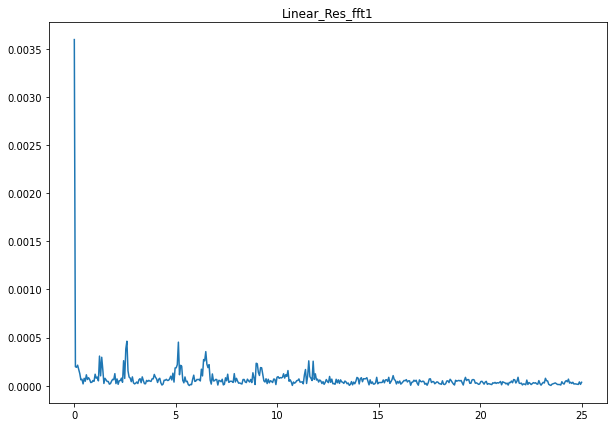

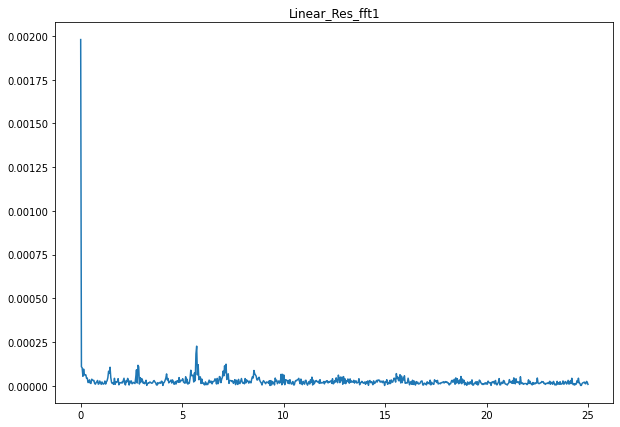

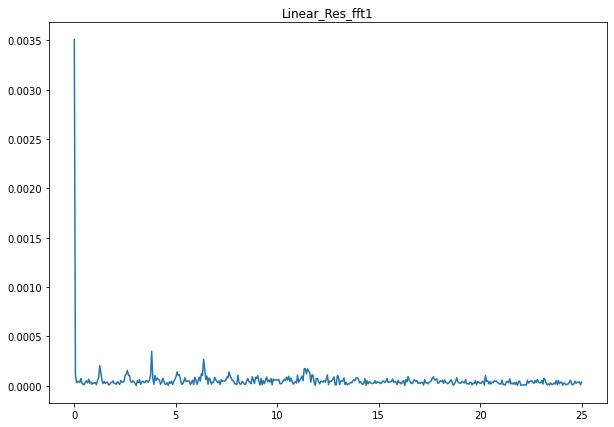

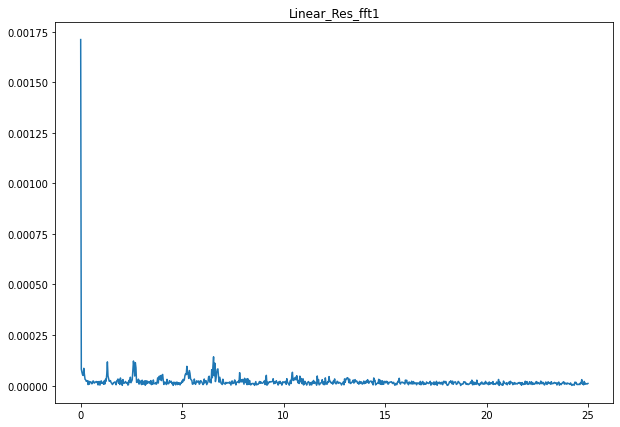

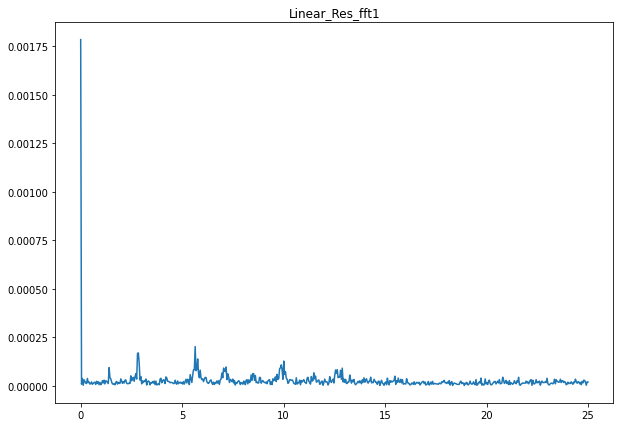

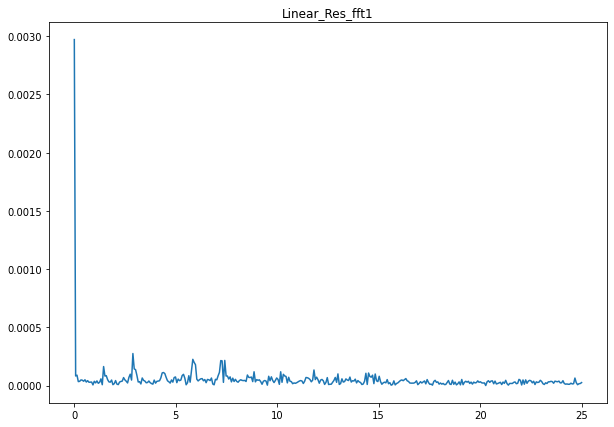

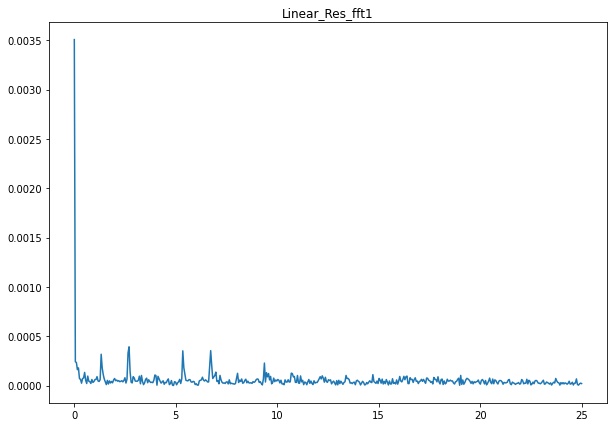

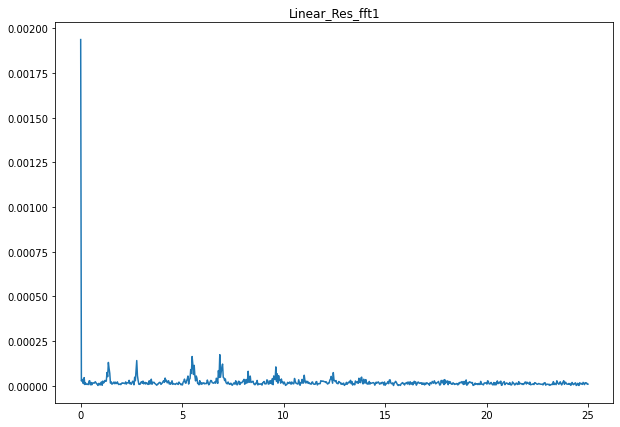

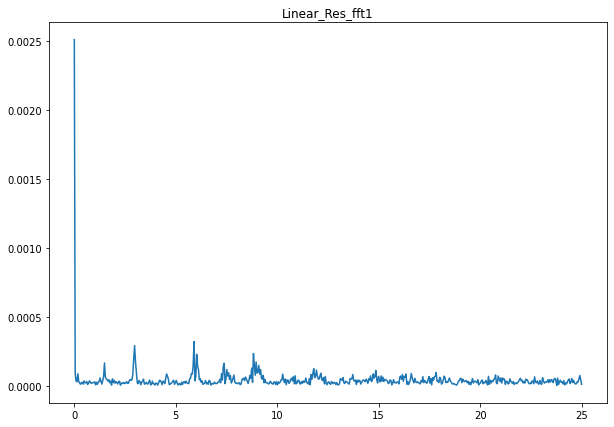

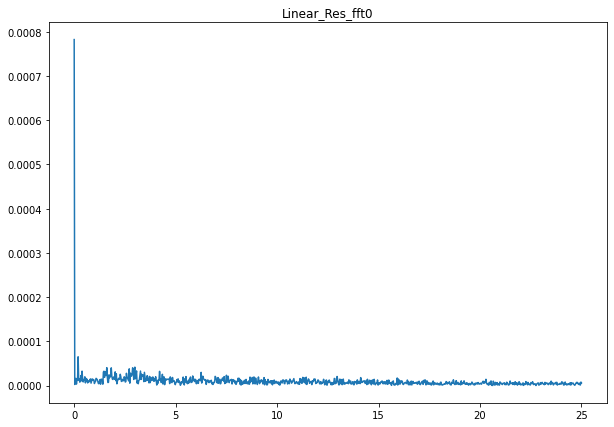

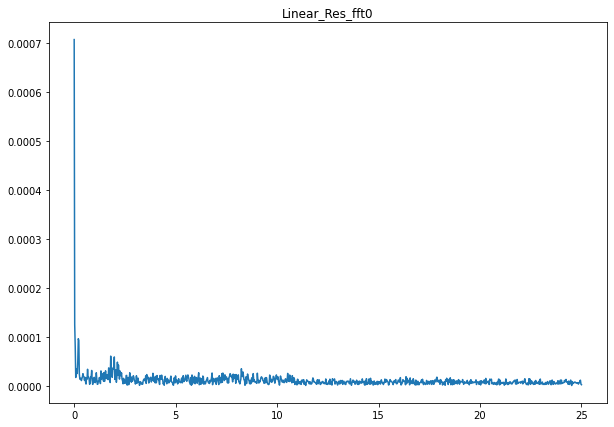

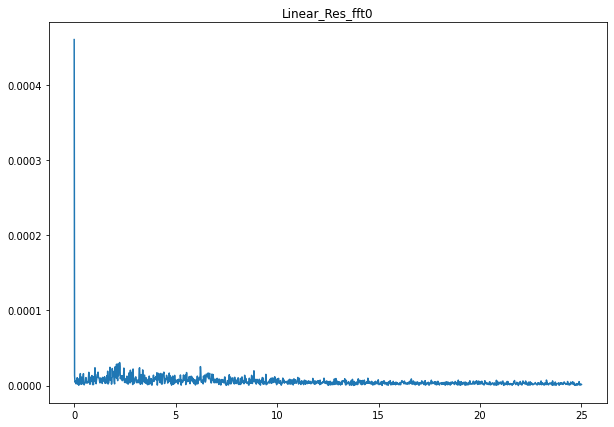

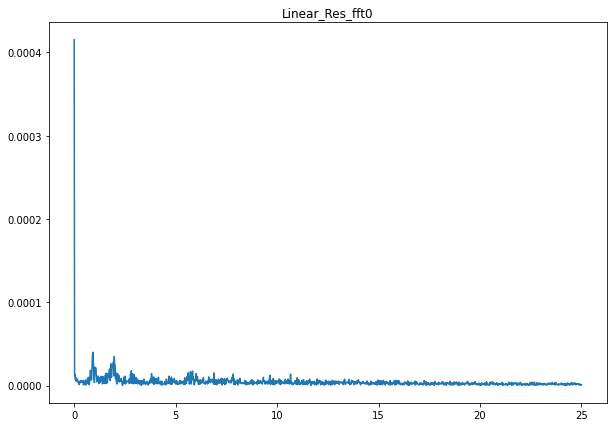

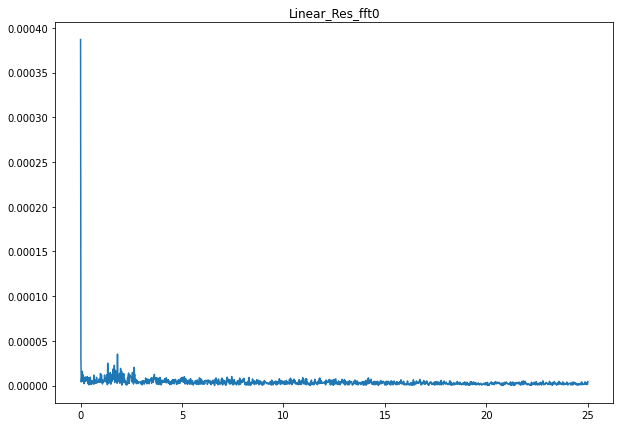

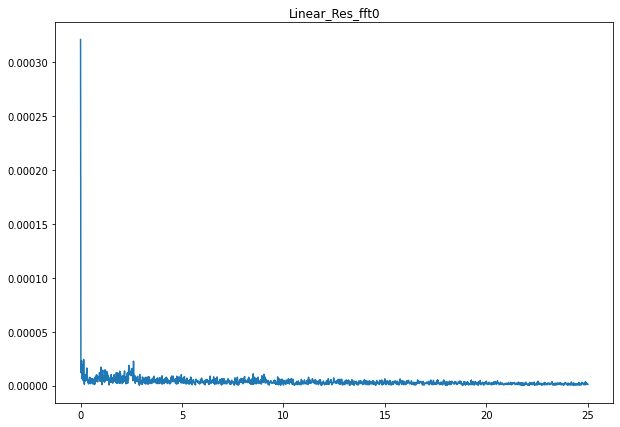

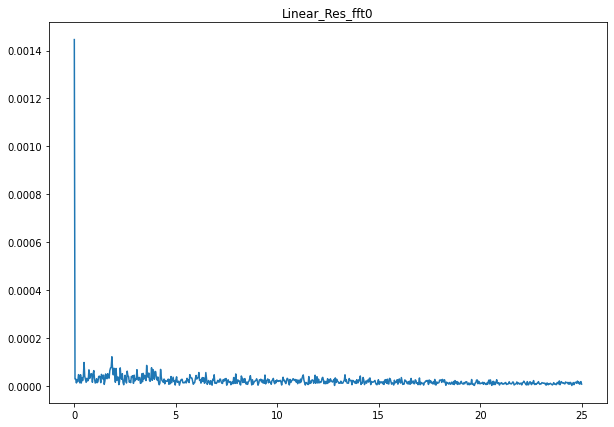

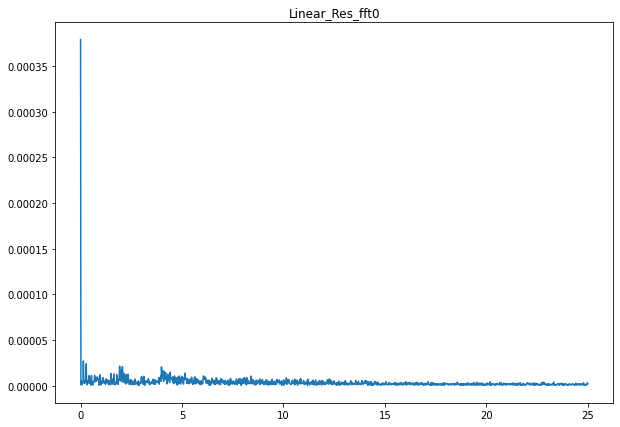

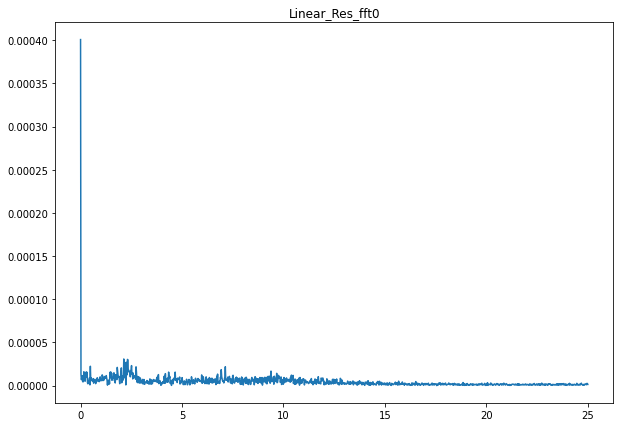

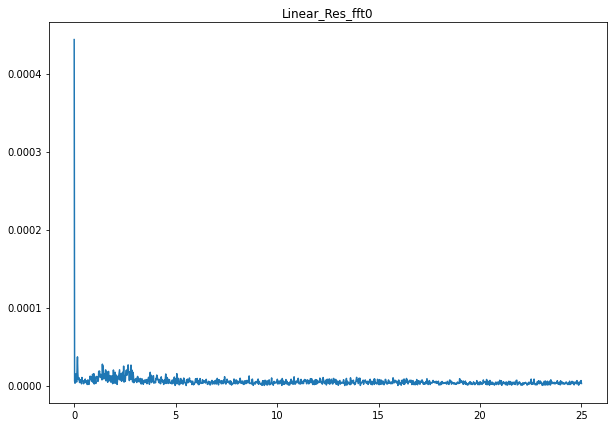

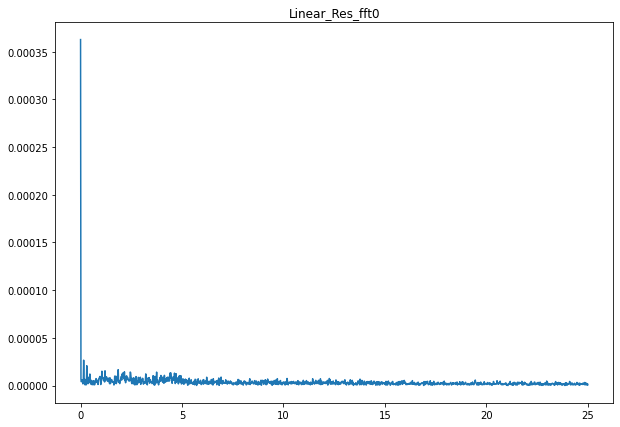

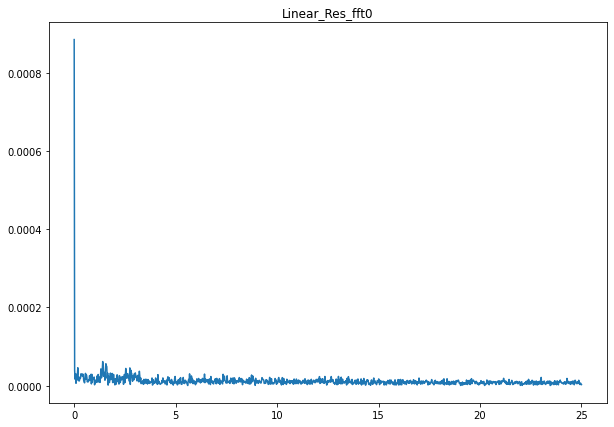

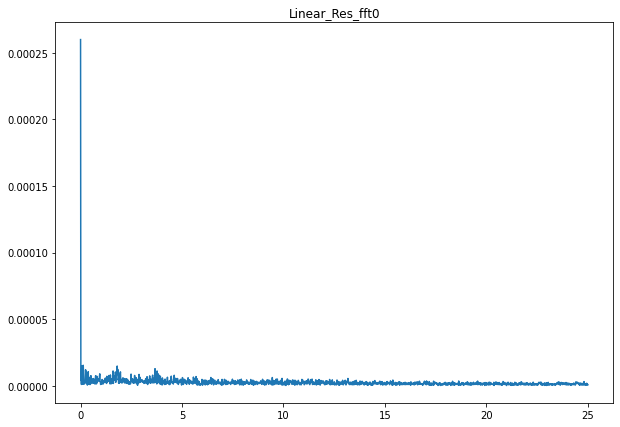

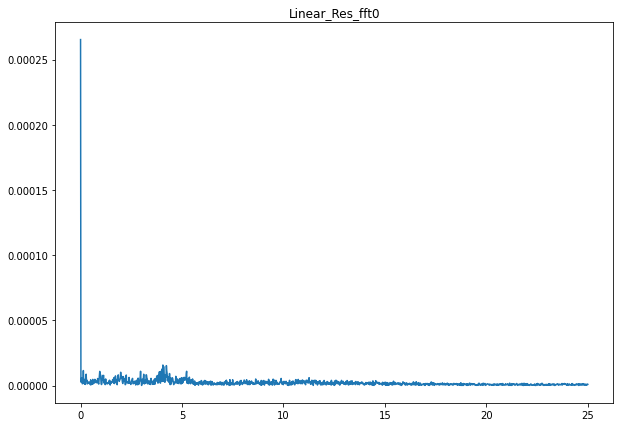

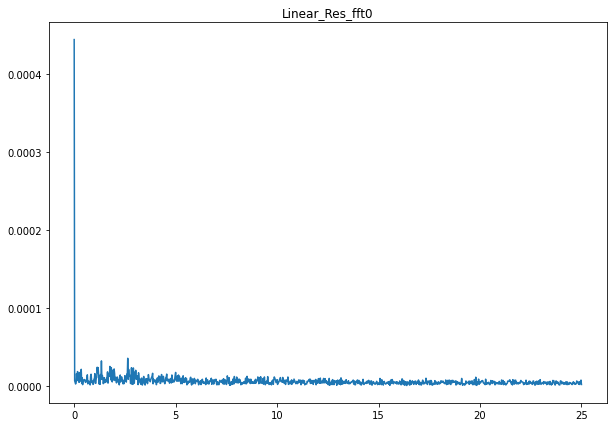

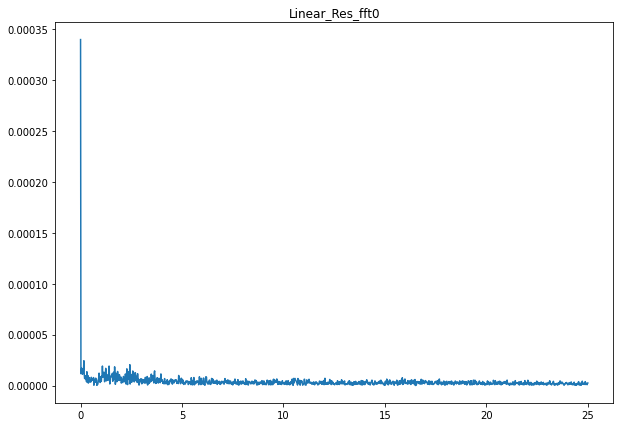

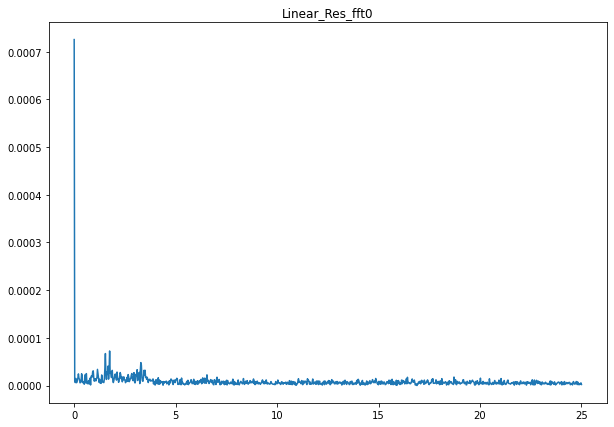

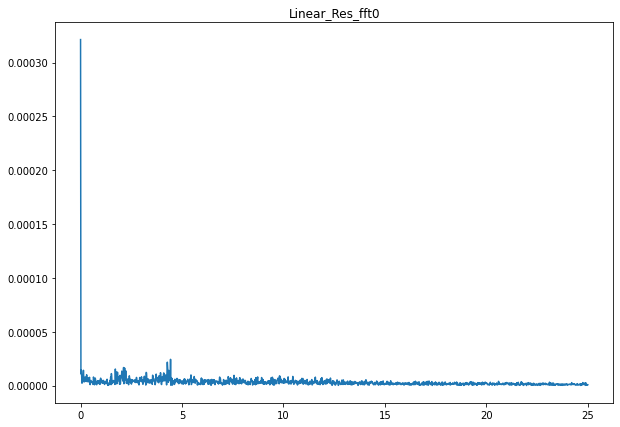

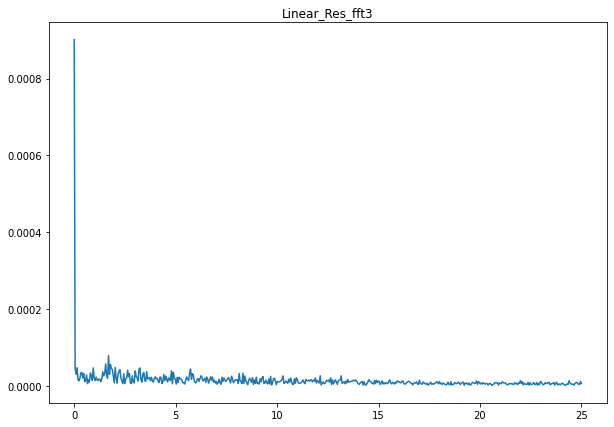

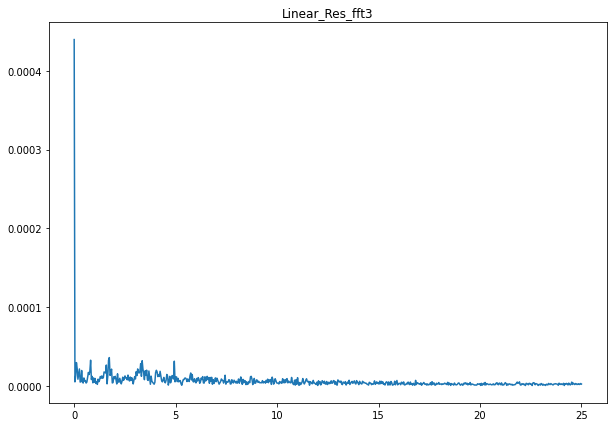

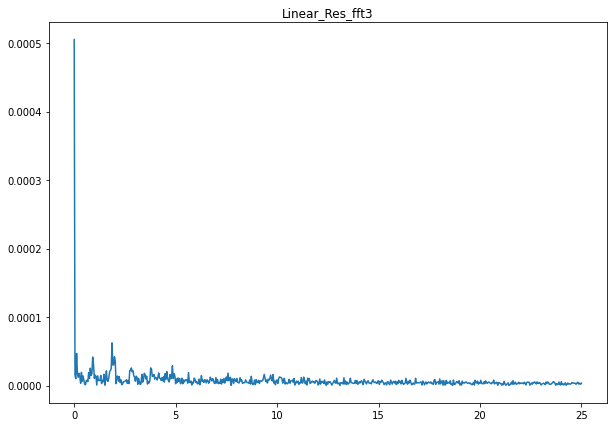

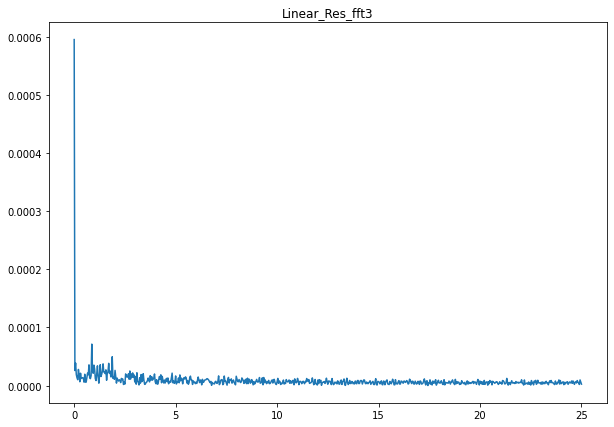

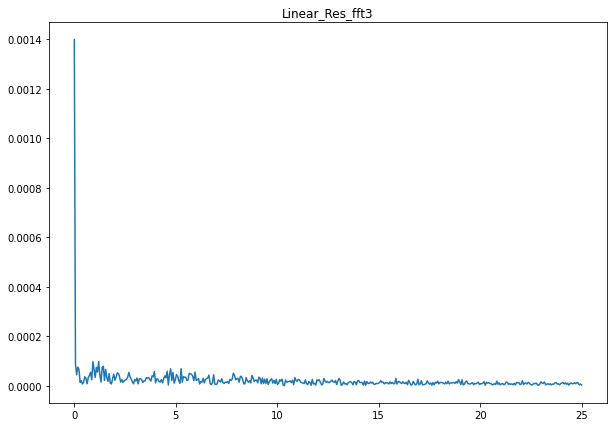

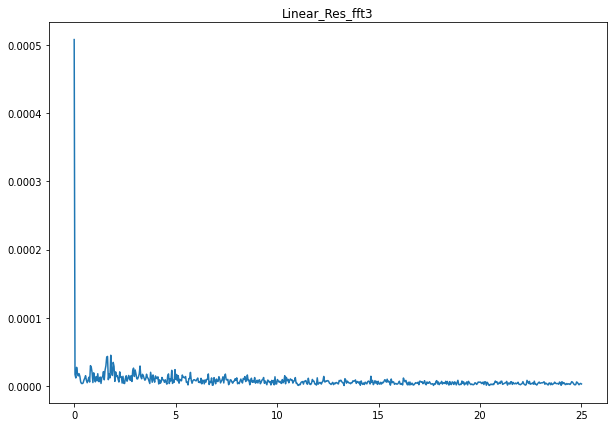

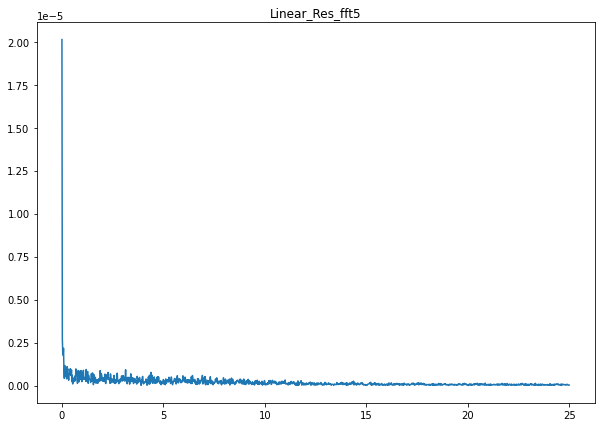

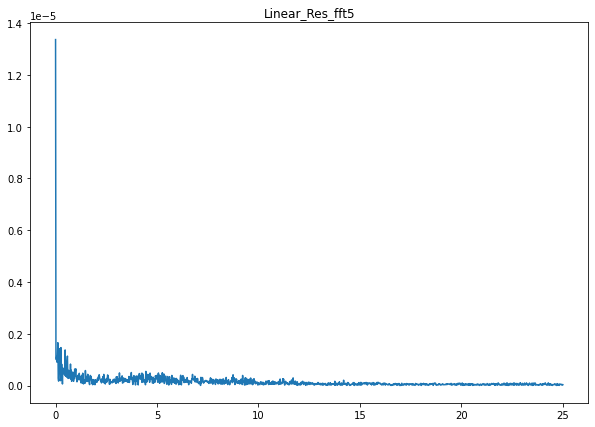

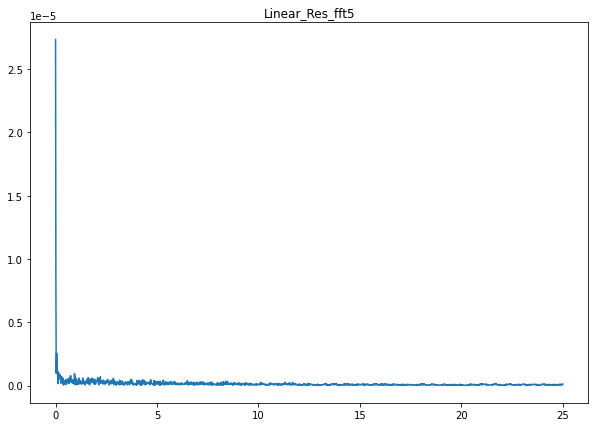

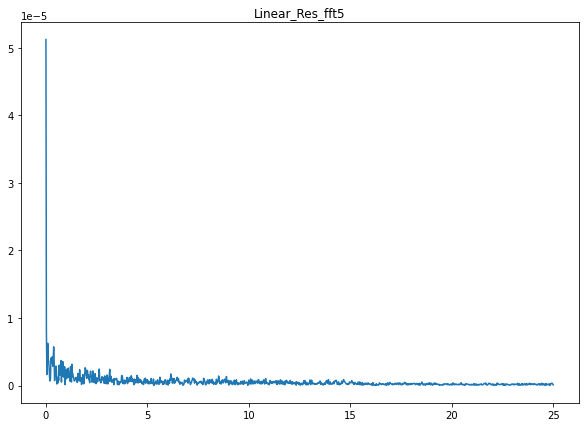

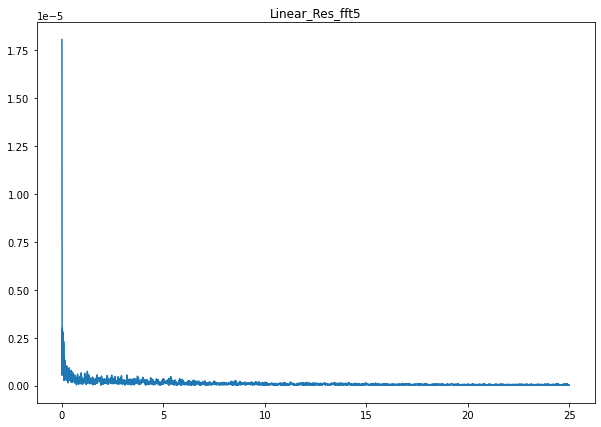

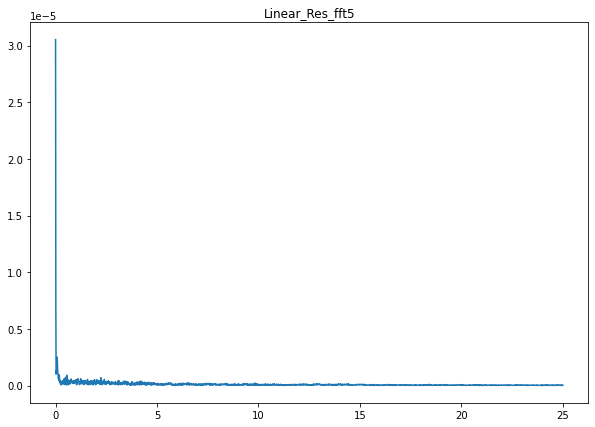

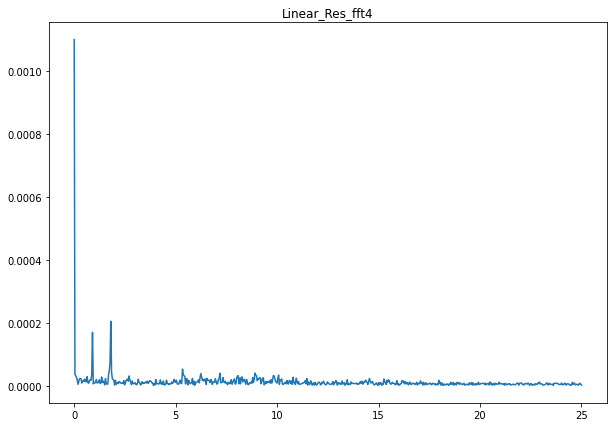

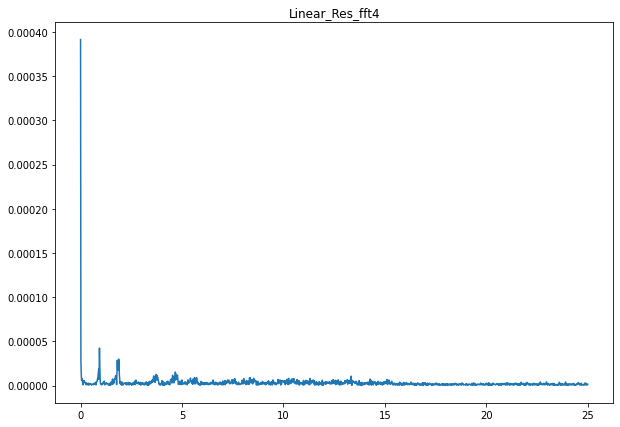

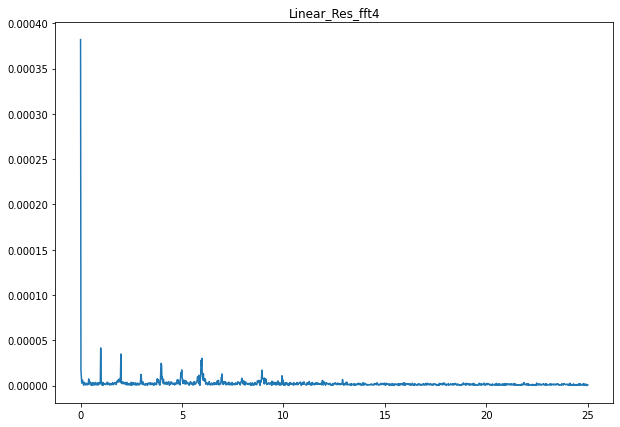

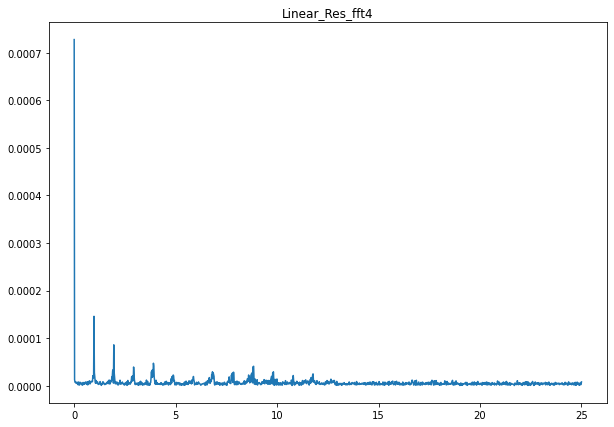

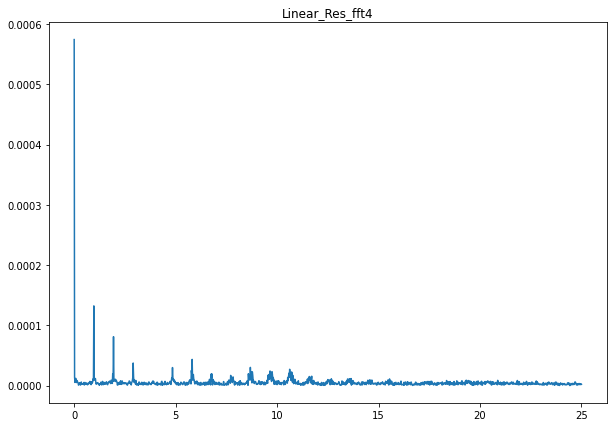

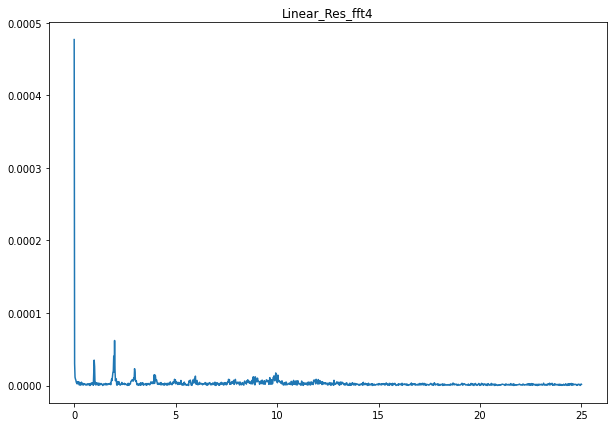

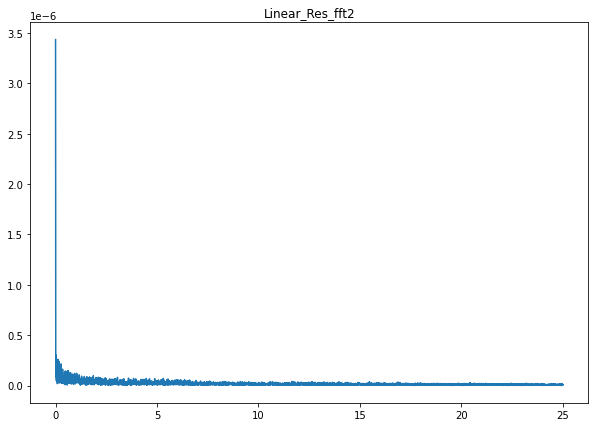

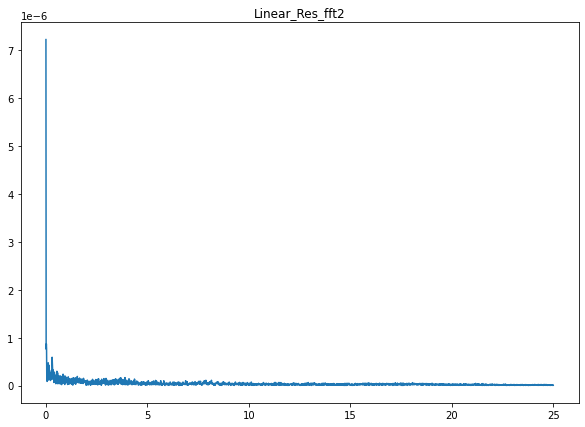

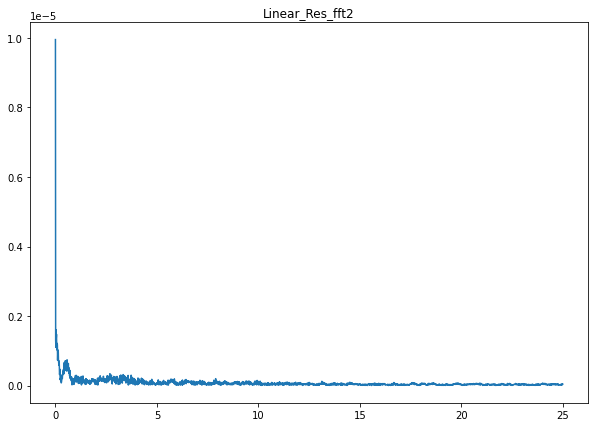

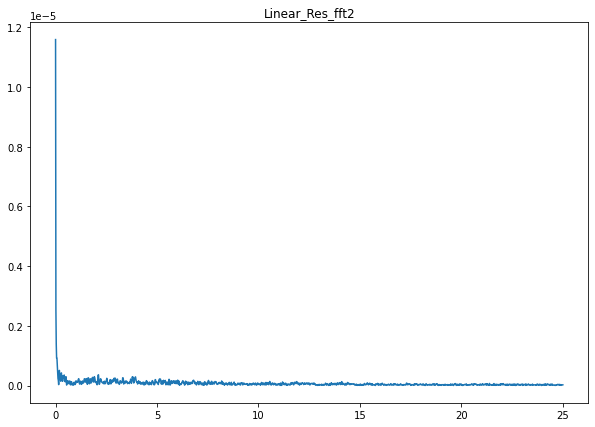

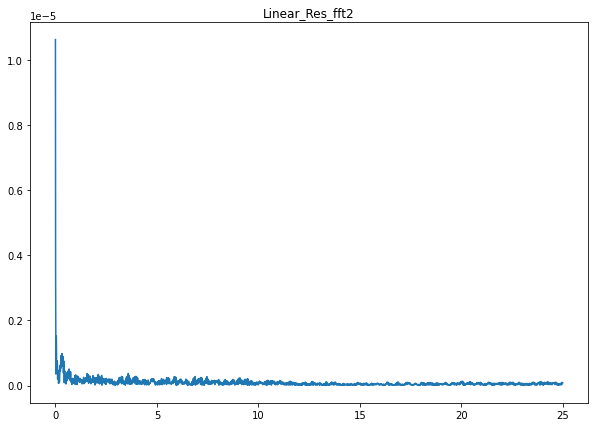

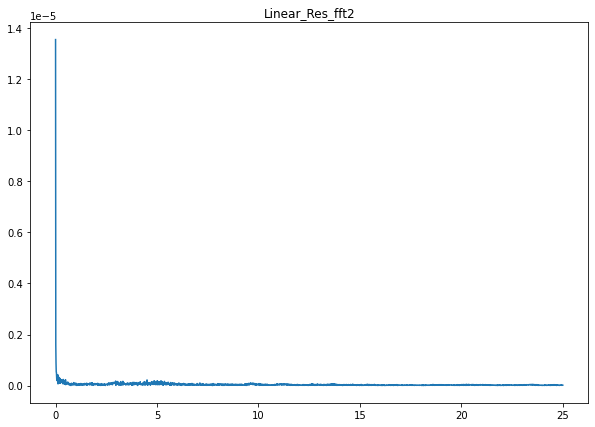

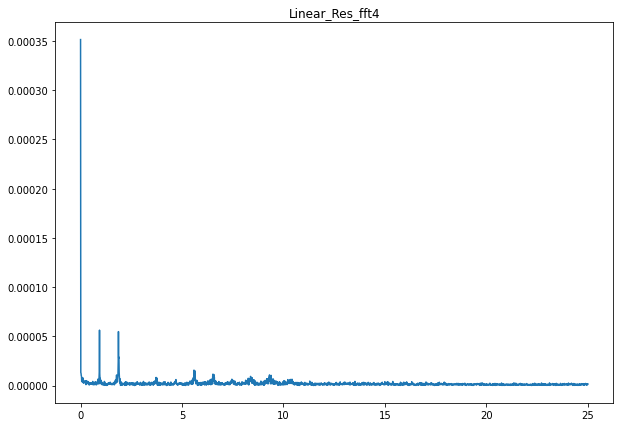

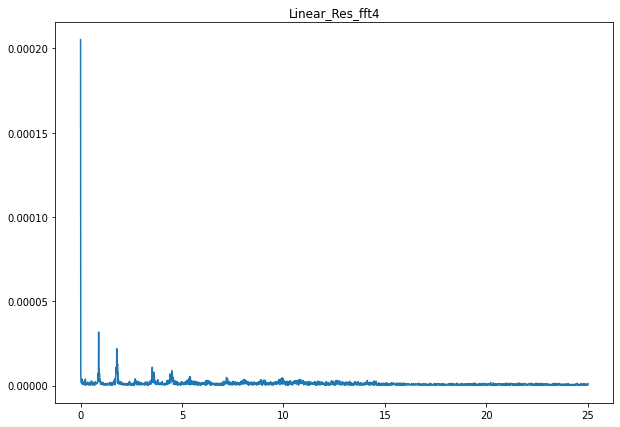

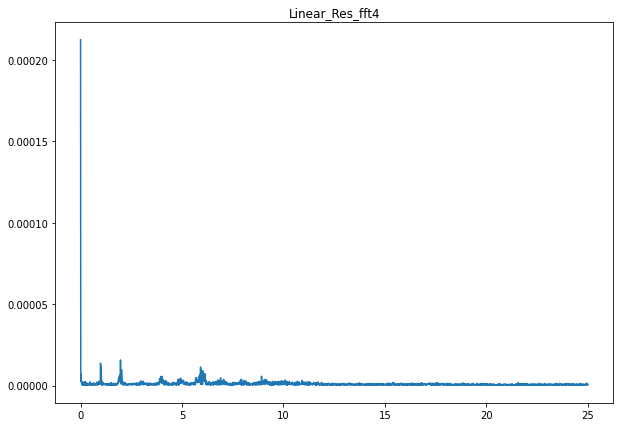

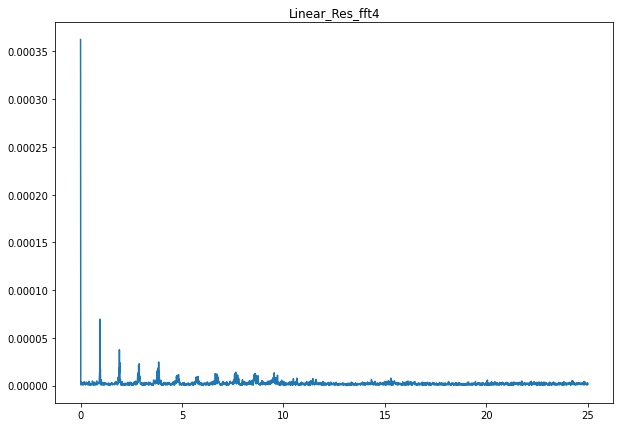

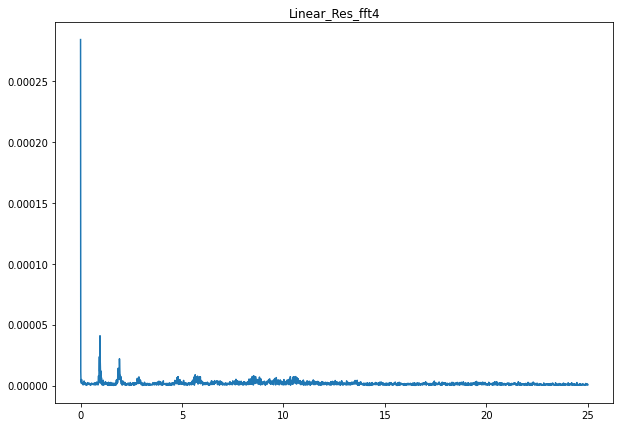

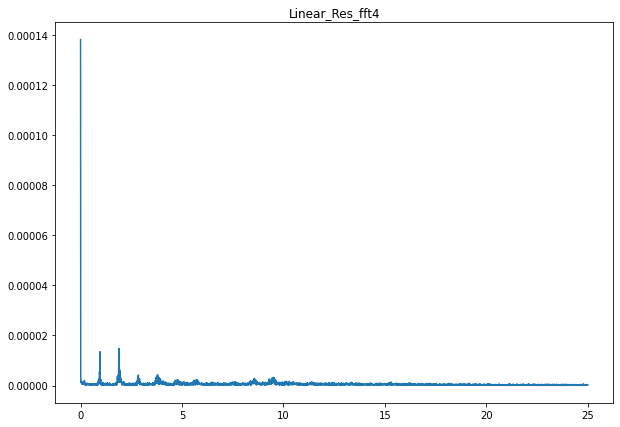

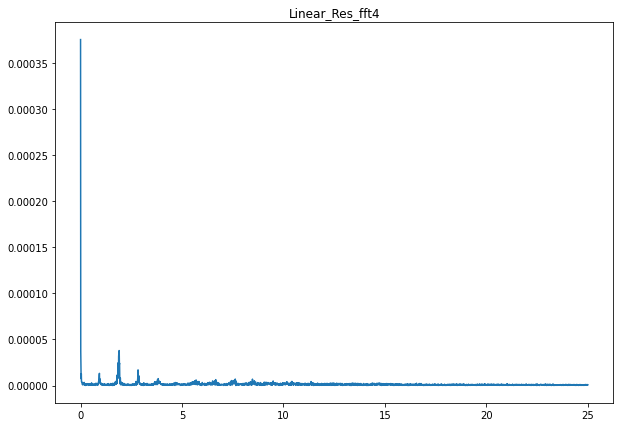

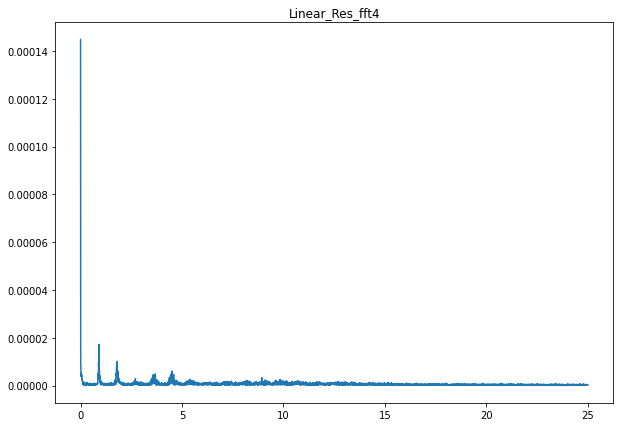

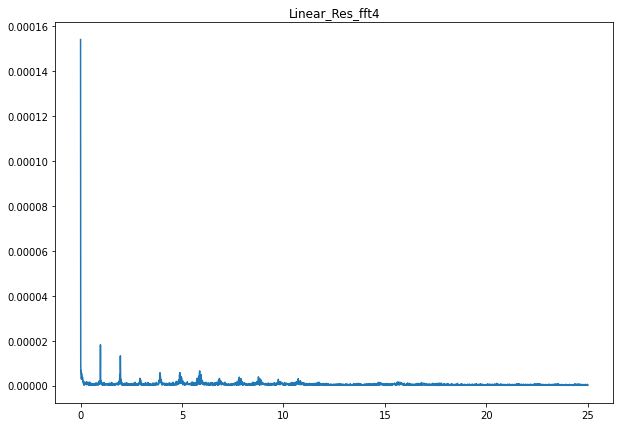

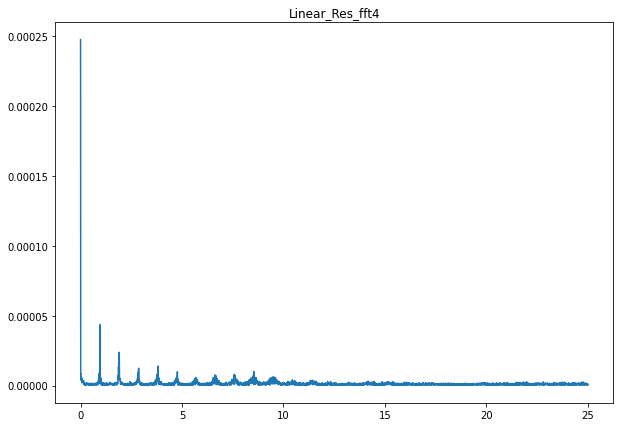

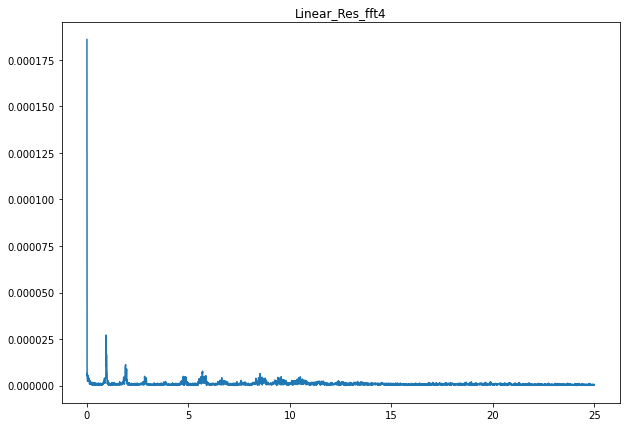

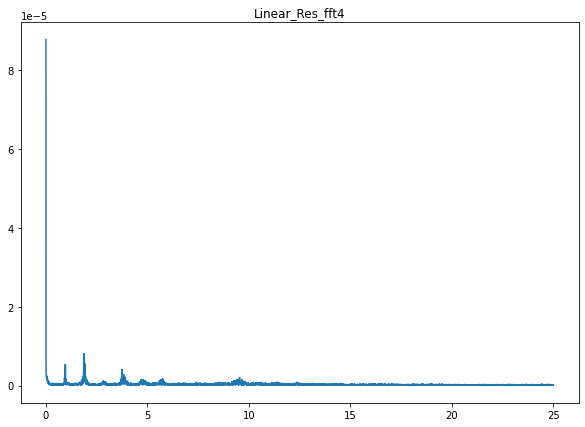

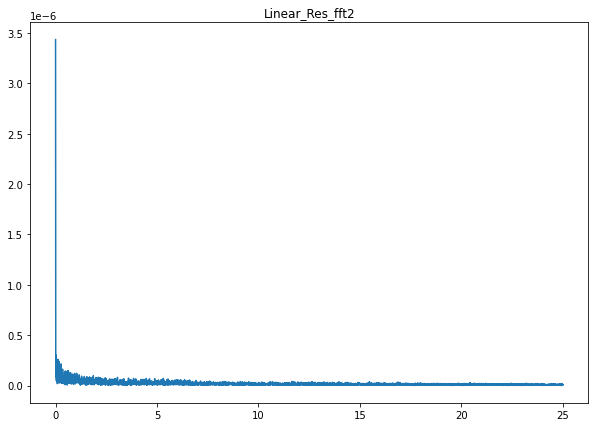

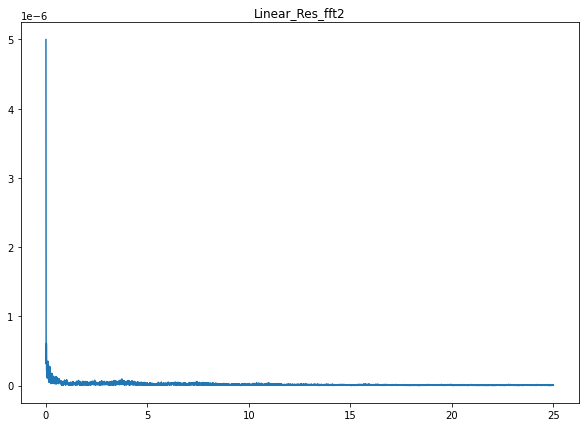

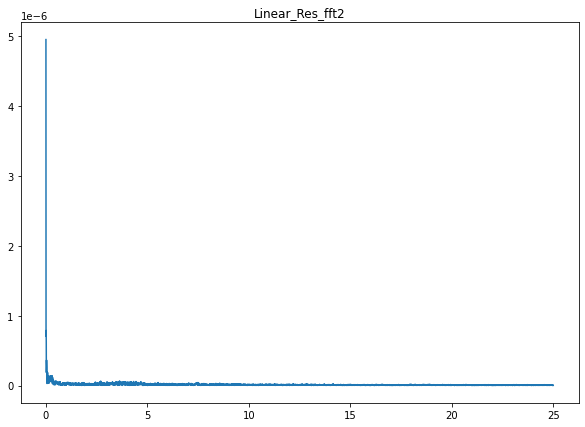

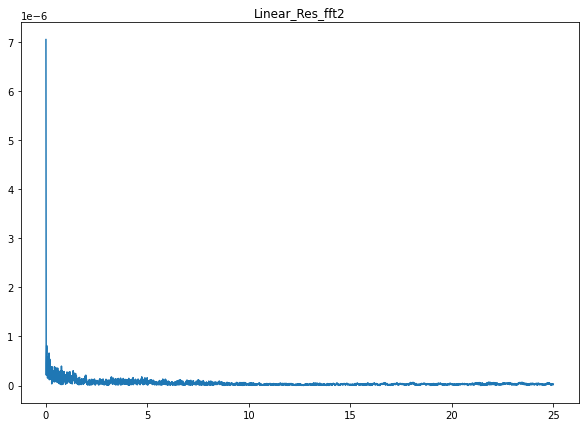

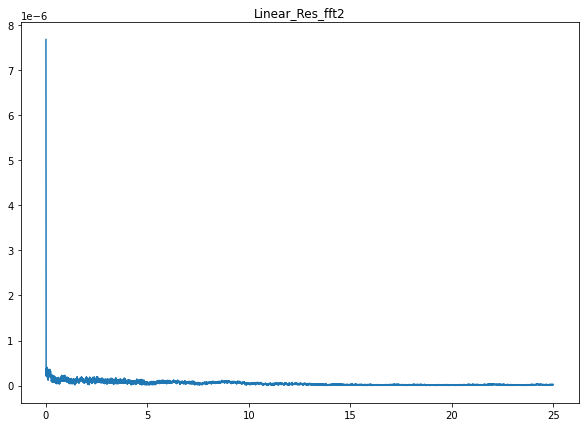

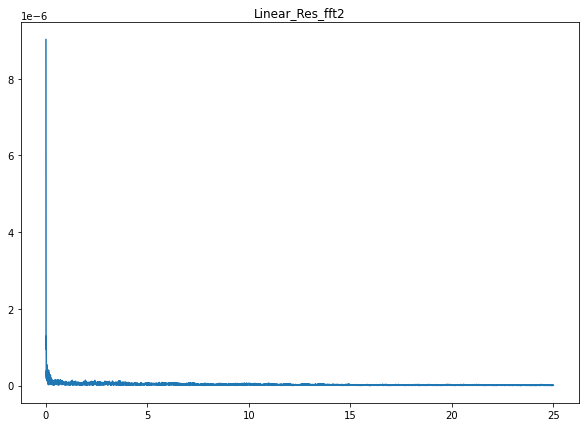

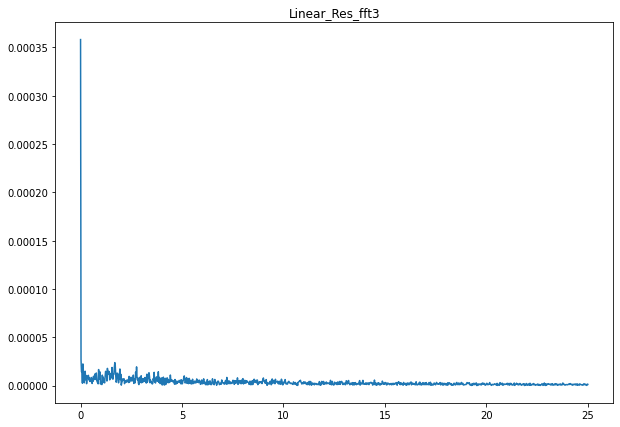

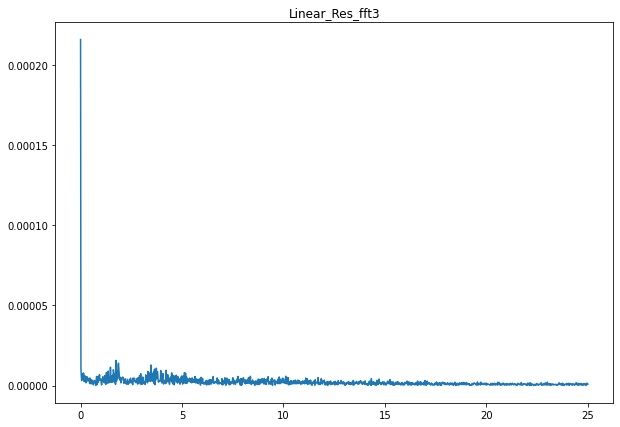

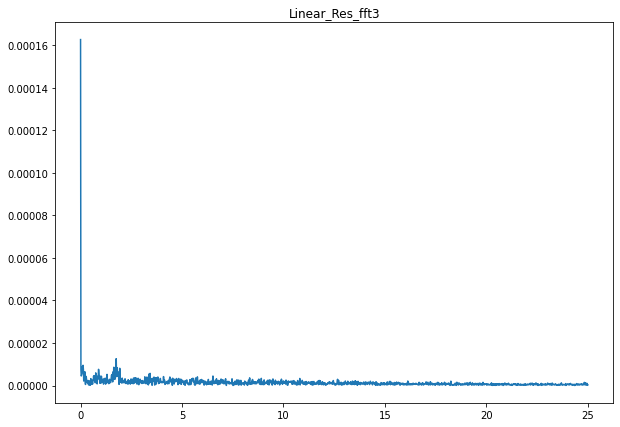

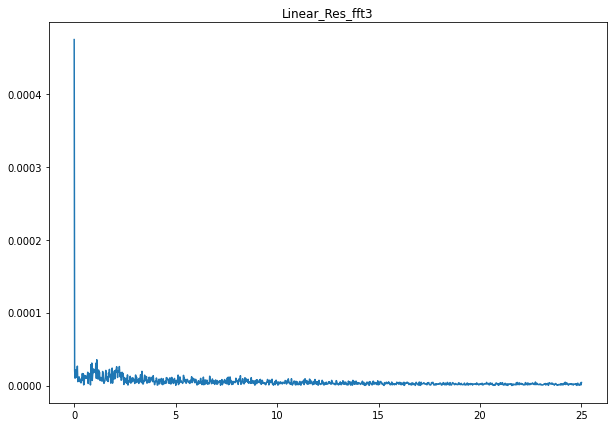

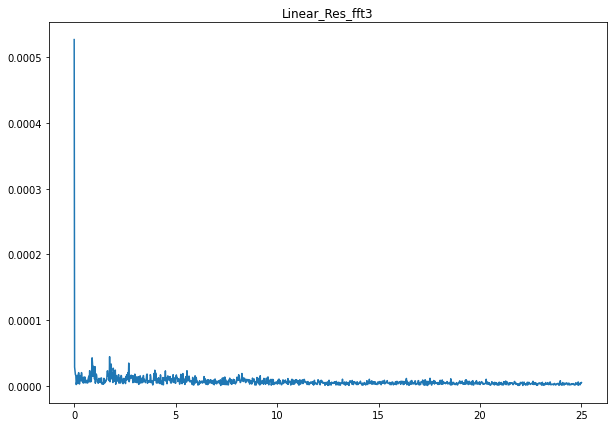

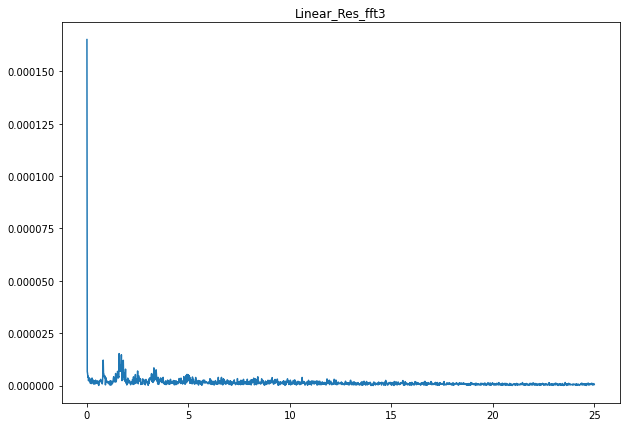

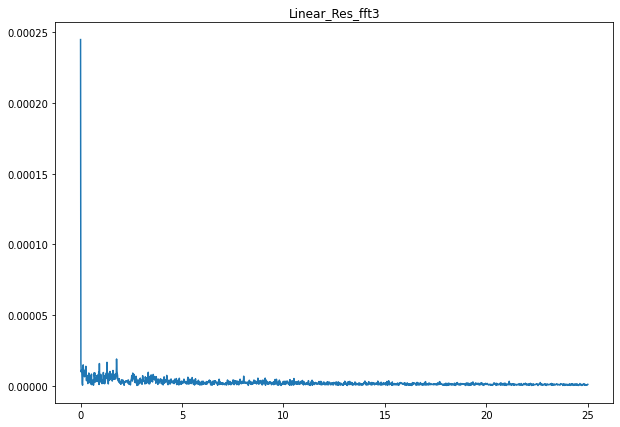

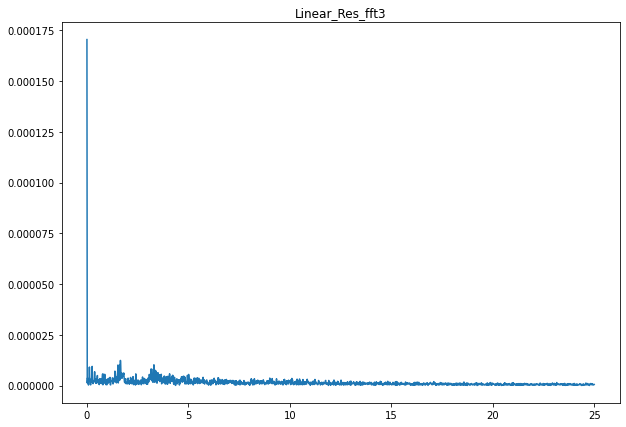

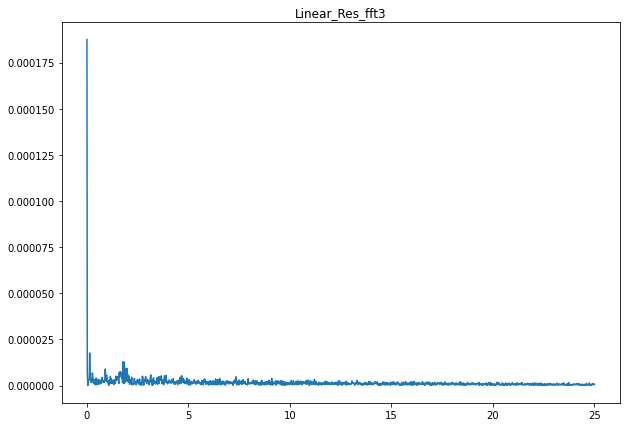

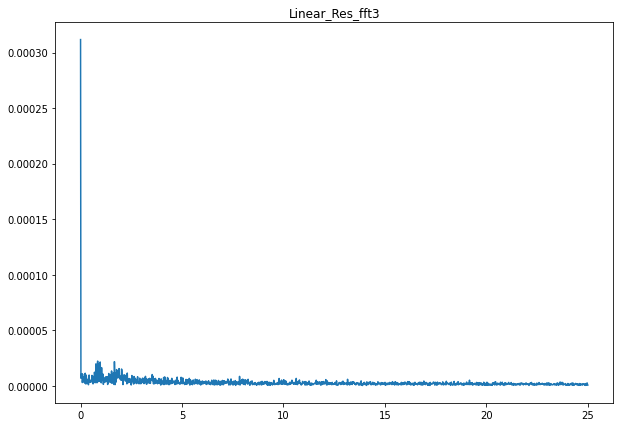

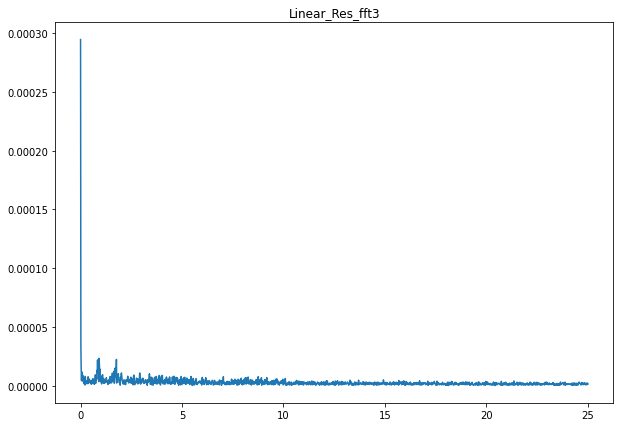

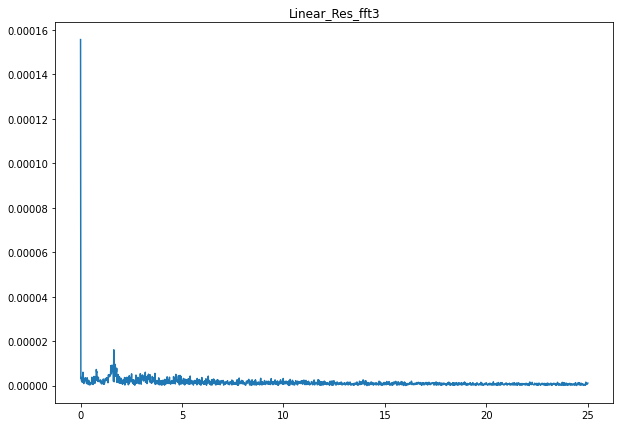

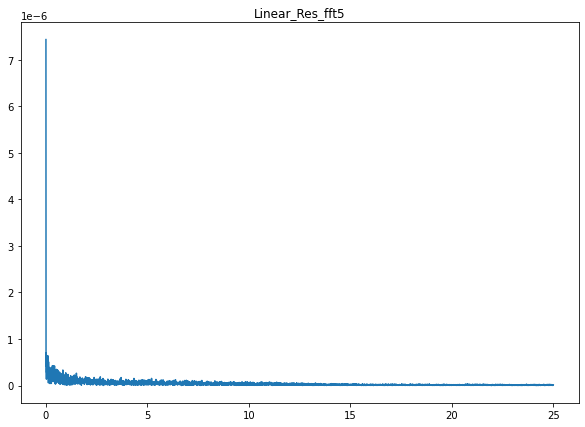

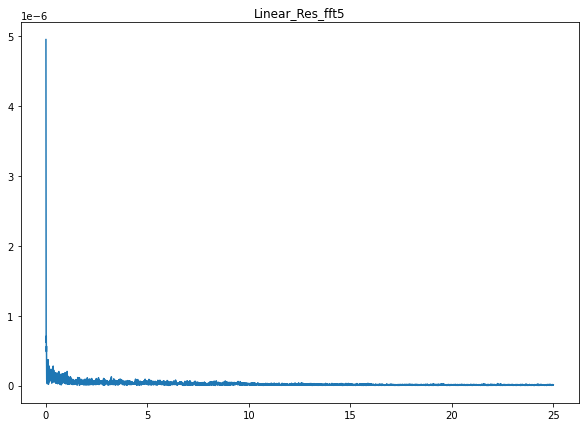

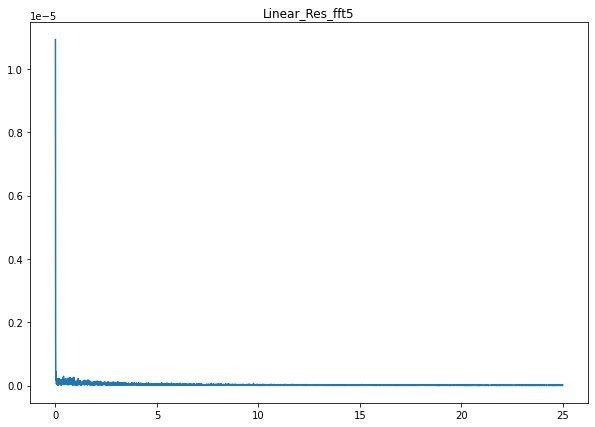

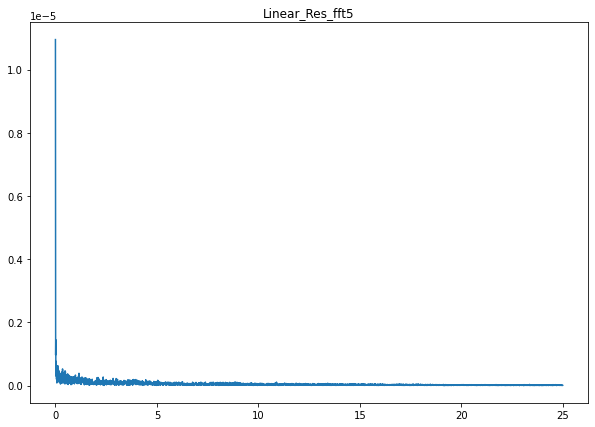

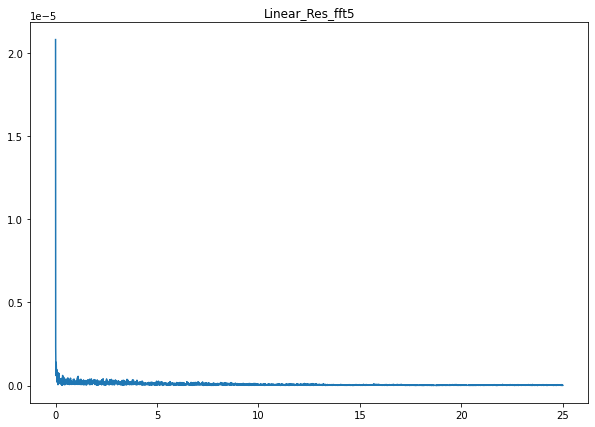

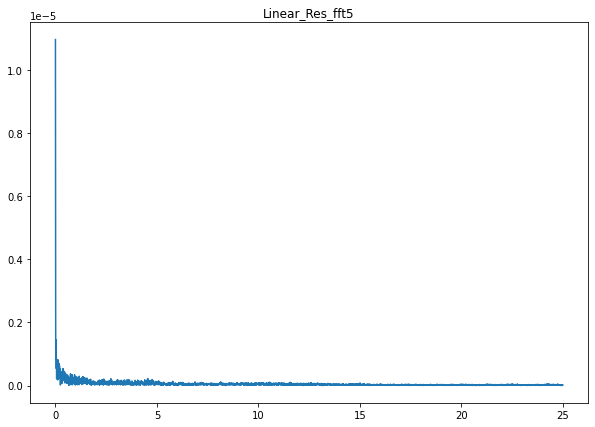

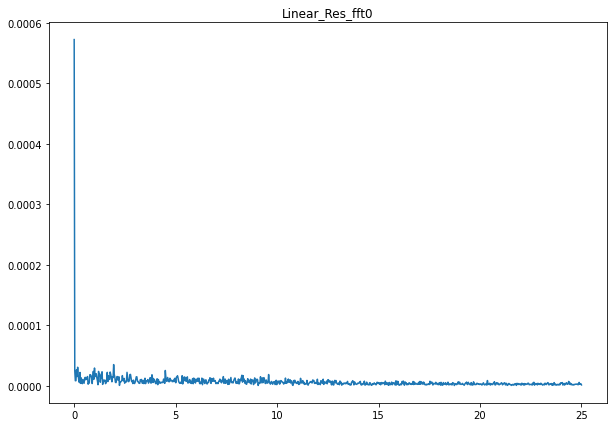

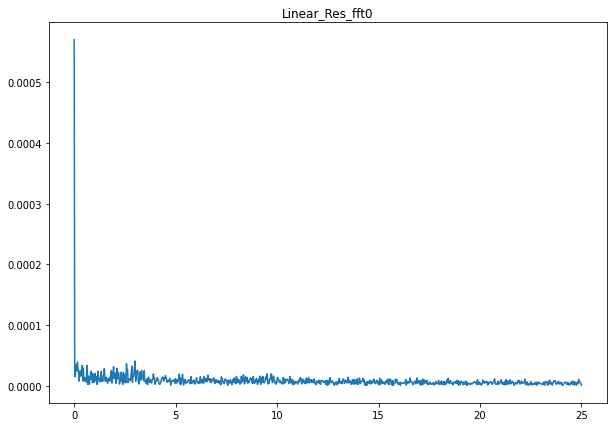

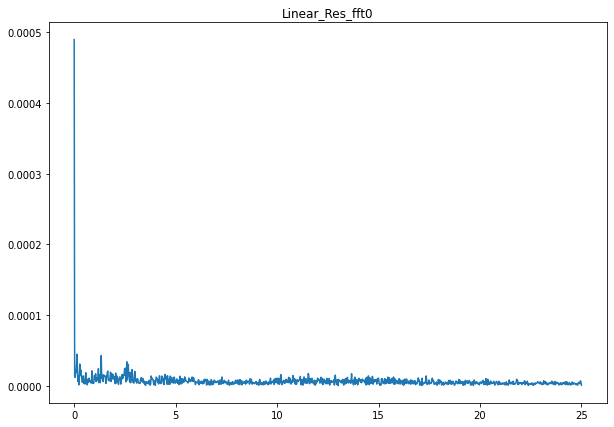

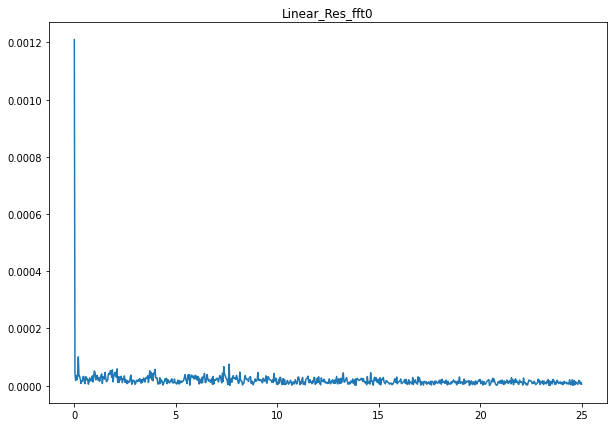

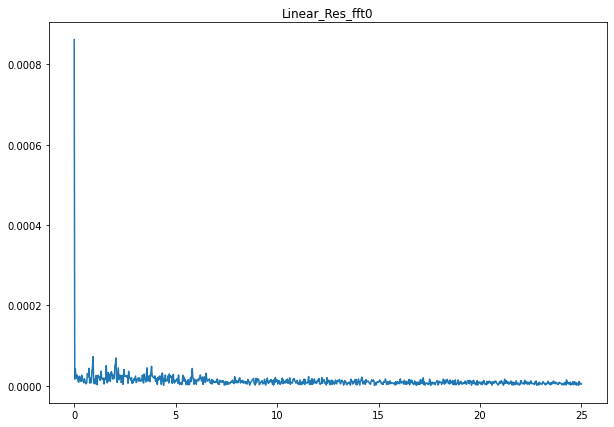

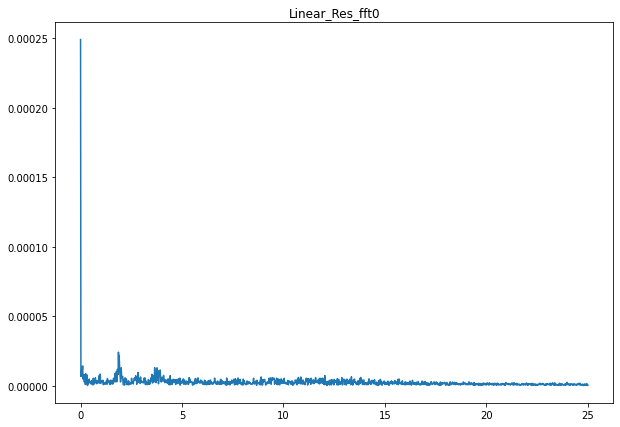

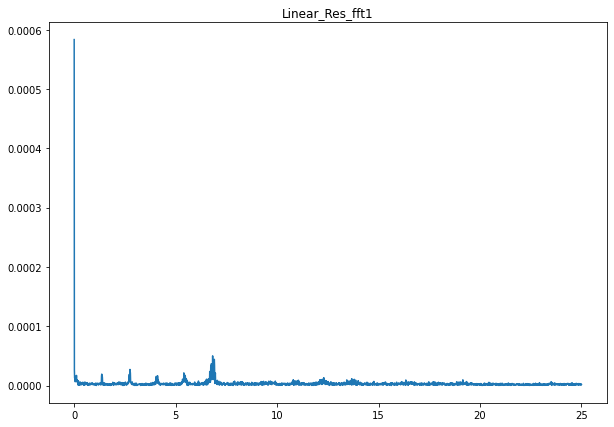

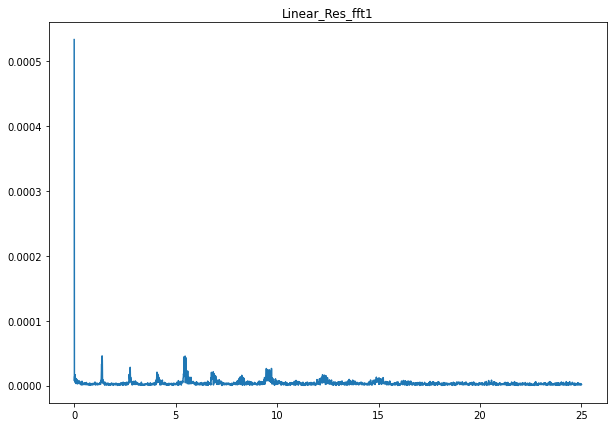

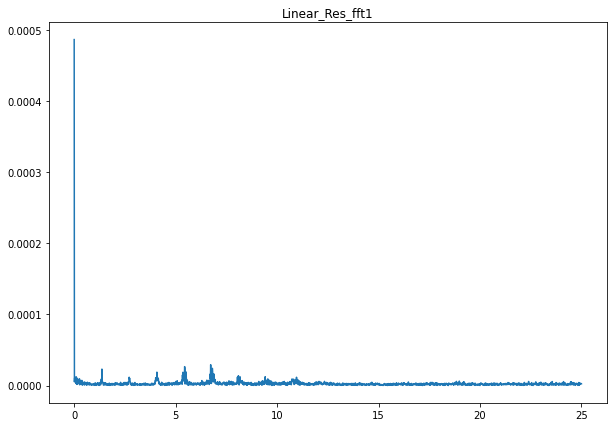

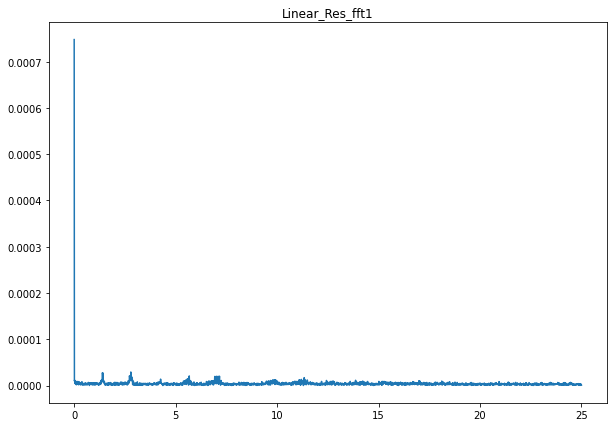

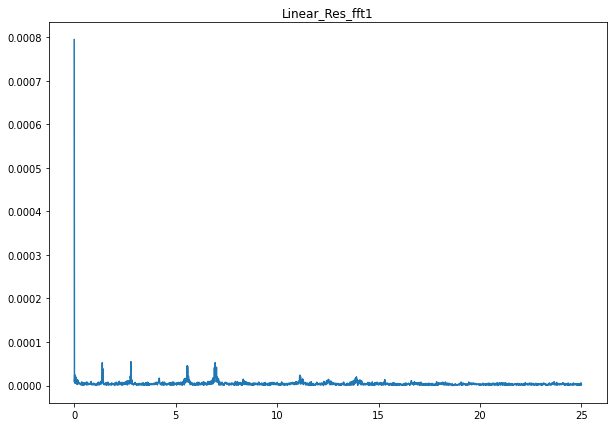

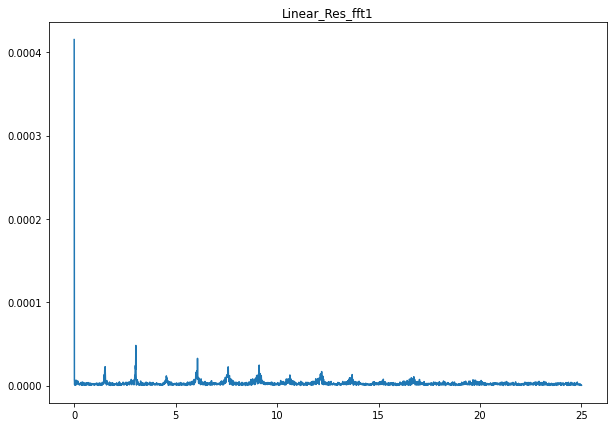

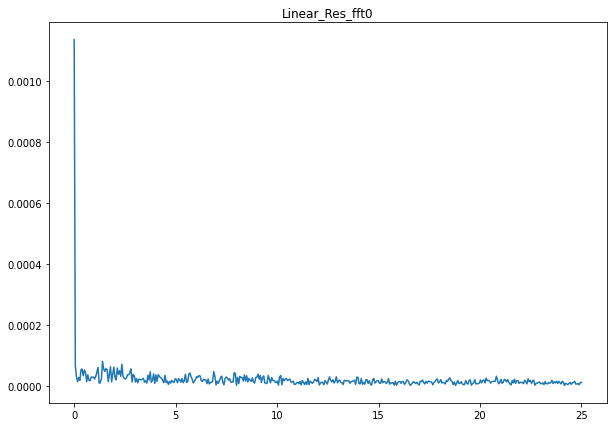

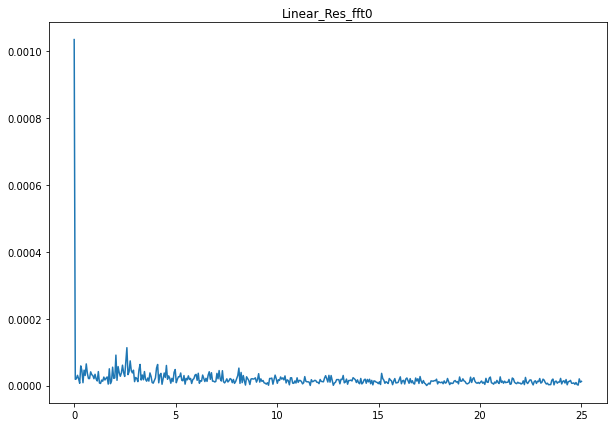

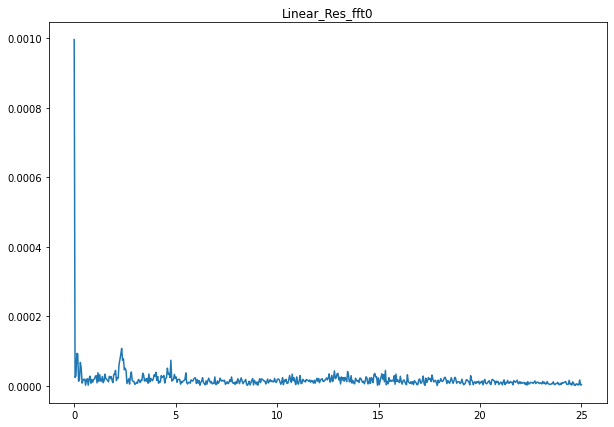

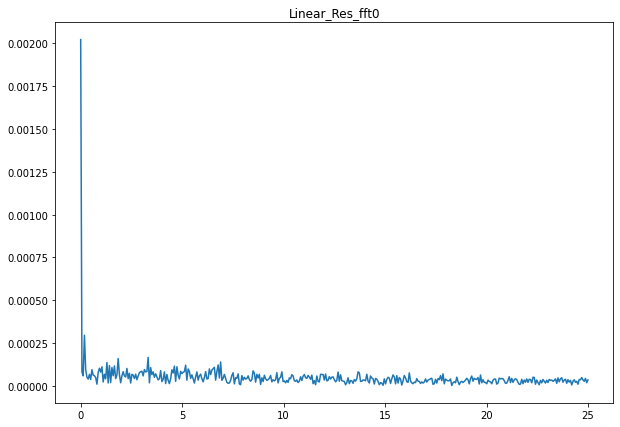

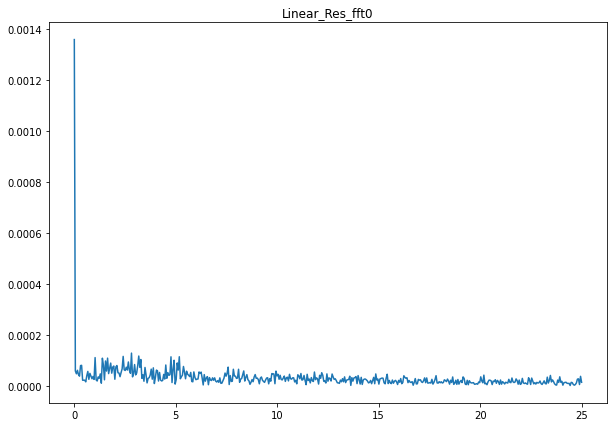

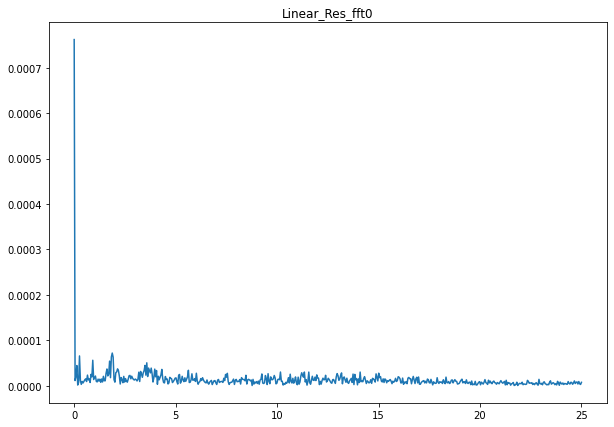

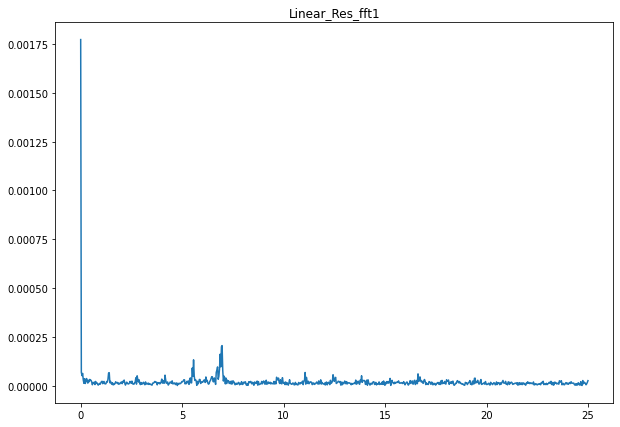

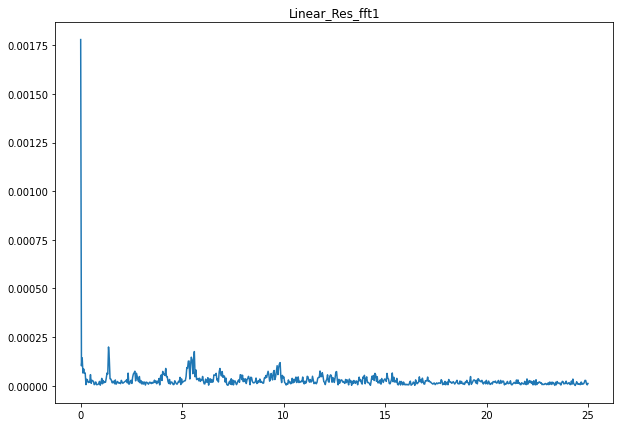

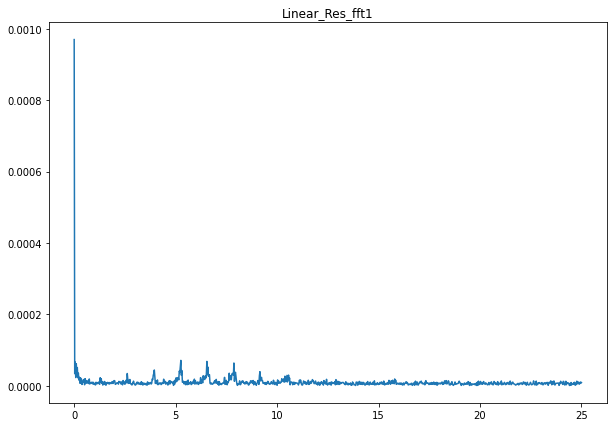

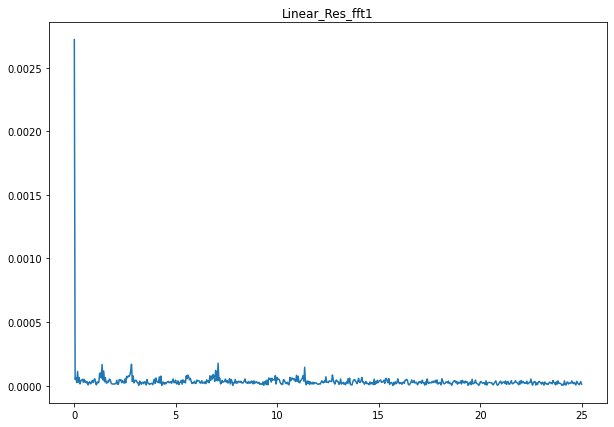

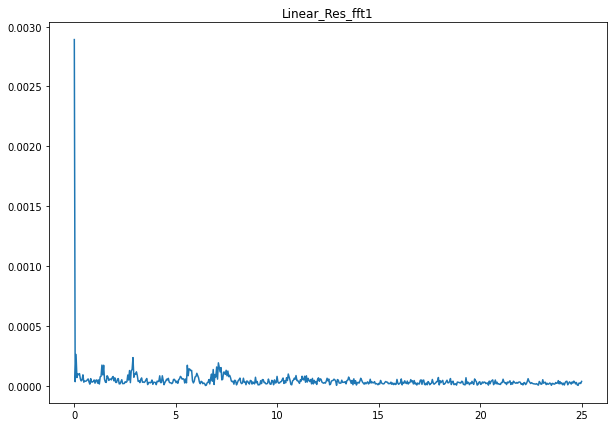

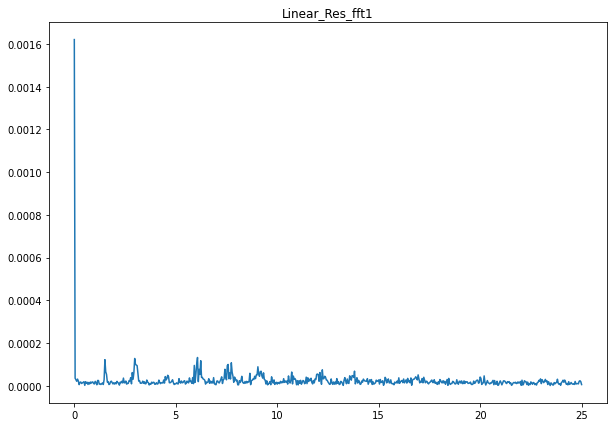

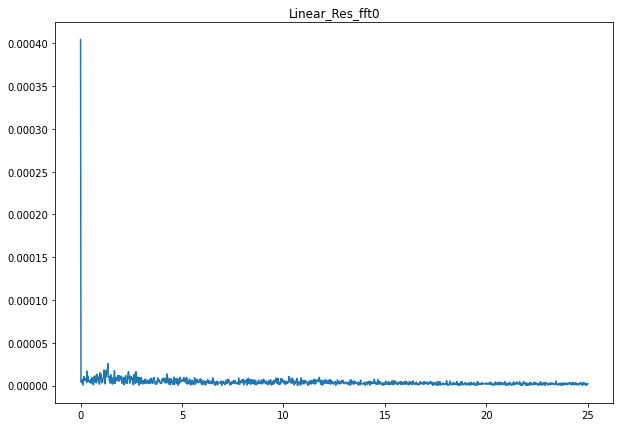

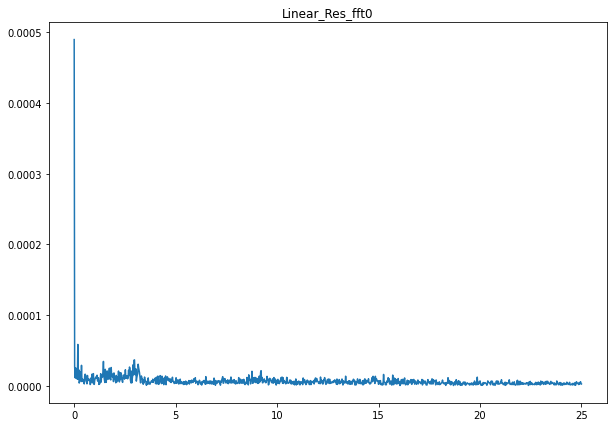

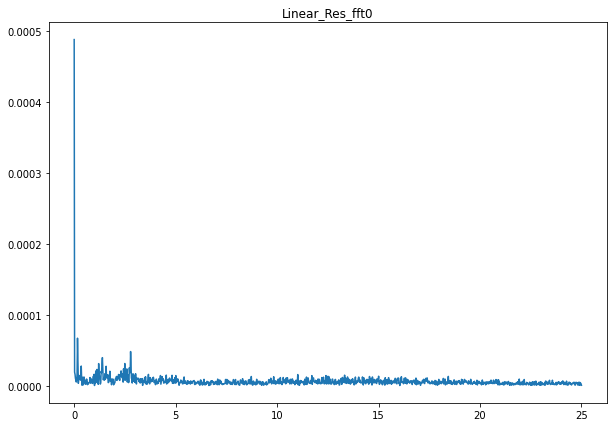

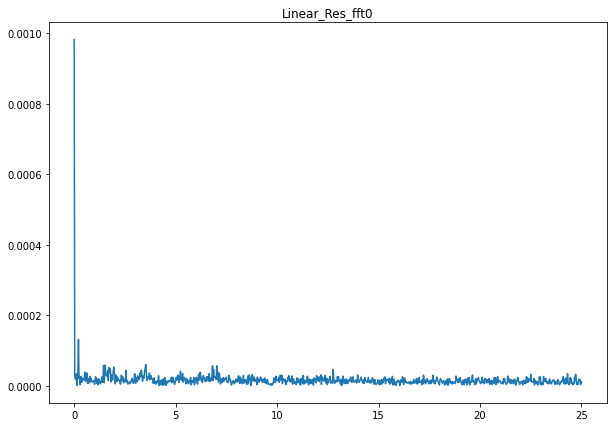

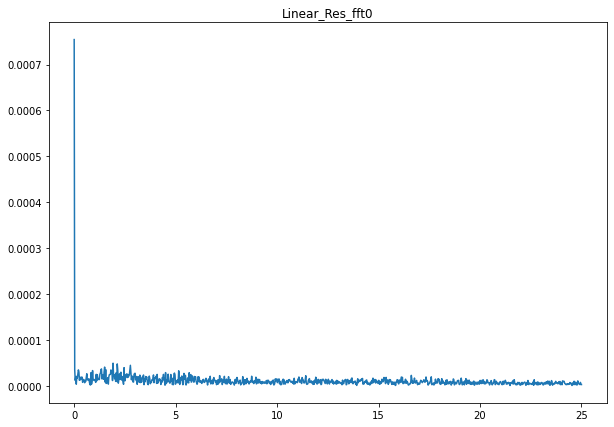

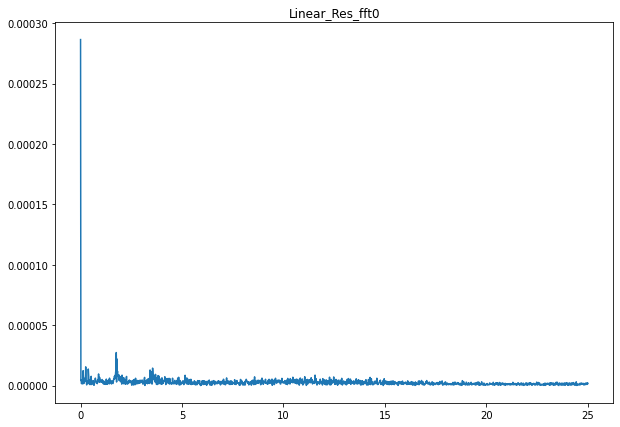

In [ ]:
plotted_fft=[]
for items in array_data_clone_tr:
  #res=items[4][0] not in plotted_fft
  #print(res)
  #print(items[5][0])
  if 1:
    #print('Yes')
    N=items[0].size
    T=0.02
    print(N)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

    #ax[0].set_title('rotationRate.x_fft'+str(items[4][0]))
    #ax[0].plot(xf, 2.0/N * np.abs(items[6][0:N//2]))

    #ax[1].set_title('rotationRate.y_fft'+str(items[4][0]))
    #ax[1].plot(xf, 2.0/N * np.abs(items[7][0:N//2]))

    #ax[2].set_title('rotationRate.z_fft'+str(items[4][0]))
    #ax[2].plot(xf, 2.0/N * np.abs(items[8][0:N//2]))

    ax.set_title('Linear_Res_fft'+str(items[4][0]))
    ax.plot(xf, 2.0/N * np.abs(items[9][0:N//2],))

    plotted_fft.append(items[4][0])


    fig.subplots_adjust(hspace=.5)

NameError: ignored

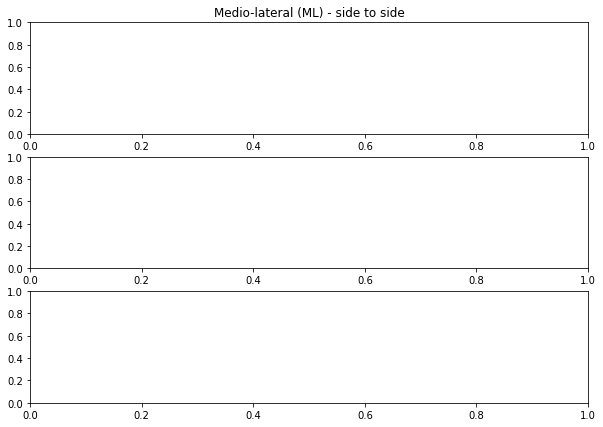

In [ ]:
# Build the filter
b, a = sm.signal.build_filter(10, 50, 'low', filter_order=4)

for items in range(0,len(array_data_clone_tr)):
  for i in range(0,4):
    y=array_data_clone_tr[items][i] 
    array_data_clone_tr[items][i]=sm.signal.filter_signal(b, a, y)
